# ML Zoomcamp Midterm Term Project

####  Emre Ozturk

 # Status Prediction on Water Pumps
 
## Can you predict the faulty water pumps?
 ![alt text](pumping.jpg "Water Pump Challenge")
 
Using data (**`WP_fulldataset.csv`**) provided from Taarifa and the Tanzanian Ministry of Water, can you predict which pumps are **functional**, which are functional but need some repairs (**functional needs repair**), and which don't work at all (**non functional**)? Predict one of these three classes based on a number of variables about what kind of pump is operating, when it was installed, and how it is managed. A smart understanding of which waterpoints will fail can improve maintenance operations and ensure that clean, potable water is available to communities across Tanzania.

## Features (attributes) in the dataset:

Our goal is to predict the operating condition of a waterpoint for each record in the dataset. We are provided the following set of information about the waterpoints:

            
|Feature|Explanation|
|-------|-----------|
|amount_tsh | Total static head (amount water available to waterpoint)|
|gps_height | Altitude of the well|
|longitude | GPS coordinate|
|latitude | GPS coordinate|
|basin | Geographic water basin|
|population | Population around the well|
|public_meeting | True/False|
|scheme_management | Who operates the waterpoint|
|permit | If the waterpoint is permitted|
|construction_year | Year the waterpoint was constructed|
|extraction_type | The kind of extraction the waterpoint uses|
|management_group | How the waterpoint is managed|
|payment | What the water costs|
|payment_type | What the water costs|
|water_quality | The quality of the water|
|quantity | The quantity of water|
|quantity_group | The quantity of water|
|source | The source of the water|
|source_class | The source of the water|
|waterpoint_type | The kind of waterpoint|


## Distribution of labels
The labels in this dataset are simple. There are three possible values:
 
|Label|Explanation|
|-----|-----------|
|`functional` | the waterpoint is operational and there are no repairs needed|
|`functional needs repair` | the waterpoint is operational, but needs repairs|
|`non functional` | the waterpoint is not operational|
 

## Data files
**`WP_fulldataset.csv`** : This is the data file that contains all the data about the water pump problem. 



## Evaulation metric

Evaulation metric of the model will be accuracy

In [536]:

import time
import numpy as np
import pandas as pd
from IPython.display import display 
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
from sklearn.utils.multiclass import type_of_target
from sklearn import metrics  
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mutual_info_score
import warnings
warnings.filterwarnings("ignore")

#  Data preparation

    Load the data, read it with pandas
    Look at the data
    Make column names and values look uniform
    Check if all the columns read correctly

In [537]:
df_orig = pd.read_csv('/Users/kadkoy/Desktop/midtermproject_2022/wp_dataset/WP_fulldataset.csv')
df = df_orig.copy()

col_names = df.columns.tolist()

print('\n')
print('Data dimensions:',df.shape,'\n')
print("Sample data:")
df.head().T



Data dimensions: (44550, 21) 

Sample data:


,0,1,2,3,4
amount_tsh,200.0,0.0,0.0,0.0,400.0
gps_height,1743,0,0,0,531
longitude,38.213814,33.68551,33.60126,33.100029,37.418773
latitude,-4.556877,-9.492351,-2.948101,-8.973678,-10.915576
basin,Pangani,Lake Nyasa,Lake Victoria,Lake Rukwa,Ruvuma / Southern Coast
population,1,0,0,0,1
public_meeting,True,True,True,True,False
scheme_management,VWC,VWC,WUG,VWC,VWC
permit,True,True,False,False,False
construction_year,2002,0,0,0,2009


In [538]:
df.columns = df.columns.str.lower().str.replace(' ','_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

list(categorical_columns)

df[categorical_columns].dtypes
df[categorical_columns].head().T



,0,1,2,3,4
basin,Pangani,Lake Nyasa,Lake Victoria,Lake Rukwa,Ruvuma / Southern Coast
public_meeting,True,True,True,True,False
scheme_management,VWC,VWC,WUG,VWC,VWC
permit,True,True,False,False,False
extraction_type,gravity,gravity,gravity,nira/tanira,other - swn 81
extraction_type_class,gravity,gravity,gravity,handpump,handpump
management_group,user-group,user-group,unknown,user-group,user-group
payment_type,monthly,monthly,unknown,on failure,monthly
water_quality,soft,soft,soft,soft,soft
quality_group,good,good,good,good,good


# EDA 

    Deep dive in and analys the data
    Checking missing values
    Look at the target variable  
    Look at numerical and categorical variables


#####  Data Type , Any Missing Values ?

In [539]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44550 entries, 0 to 44549
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             44550 non-null  float64
 1   gps_height             44550 non-null  int64  
 2   longitude              44550 non-null  float64
 3   latitude               44550 non-null  float64
 4   basin                  44550 non-null  object 
 5   population             44550 non-null  int64  
 6   public_meeting         42053 non-null  object 
 7   scheme_management      41613 non-null  object 
 8   permit                 42241 non-null  object 
 9   construction_year      44550 non-null  int64  
 10  extraction_type        44550 non-null  object 
 11  extraction_type_class  44550 non-null  object 
 12  management_group       44550 non-null  object 
 13  payment_type           44550 non-null  object 
 14  water_quality          44550 non-null  object 
 15  qu

Tells us which features are continuous and which ones are categorical. 

In [540]:
df.isnull().sum()

amount_tsh                  0
gps_height                  0
longitude                   0
latitude                    0
basin                       0
population                  0
public_meeting           2497
scheme_management        2937
permit                   2309
construction_year           0
extraction_type             0
extraction_type_class       0
management_group            0
payment_type                0
water_quality               0
quality_group               0
quantity                    0
source                      0
source_class                0
waterpoint_type             0
status_group                0
dtype: int64

##### Any anomally, duplicate rows..?

In [541]:
#Dropped duplicate rows, keep last duplicate
df = df.drop_duplicates(keep='last')

##### How many unique value for each feature?

In [542]:
df.nunique()

amount_tsh                  91
gps_height                2399
longitude                43155
latitude                 43154
basin                        9
population                 940
public_meeting               2
scheme_management           12
permit                       2
construction_year           55
extraction_type             18
extraction_type_class        7
management_group             5
payment_type                 7
water_quality                8
quality_group                6
quantity                     5
source                      10
source_class                 3
waterpoint_type              7
status_group                 3
dtype: int64

In [543]:
#Looking for numeric features specs
df.describe().T

,count,mean,std,min,25%,50%,75%,max
amount_tsh,43593.0,325.478939,3182.960326,0.00000,0.000000,0.000000,25.000000,3.500000e+05
gps_height,43593.0,680.866286,694.094946,-90.00000,0.000000,394.000000,1329.000000,2.770000e+03
longitude,43593.0,34.826169,4.273787,0.00000,33.236887,34.987157,37.217028,4.034519e+01
latitude,43593.0,-5.835375,2.855903,-11.64944,-8.627042,-5.128953,-3.356613,-2.000000e-08
population,43593.0,183.154956,468.302730,0.00000,0.000000,30.000000,225.000000,1.530000e+04
construction_year,43593.0,1325.979561,943.197230,0.00000,0.000000,1987.000000,2004.000000,2.013000e+03


###  Data Exploration
Some basic stats on the target variable:

In [544]:
list(df['status_group'].unique())

['non functional', 'functional', 'functional needs repair']

In [545]:
print('non functional          = {}'.format(len(df[df['status_group'] =='non functional'])))
print('functional              = {}'.format(len(df[df['status_group'] =='functional'])))  
print('functional needs repair = {}'.format(len(df[df['status_group'] =='functional needs repair'])))
print()
print('% non functional            = {}%'.format(round(float(len(df[df['status_group'] == "non functional"])) / len(df) * 100), 3))
print('% functional                = {}%'.format(round(float(len(df[df['status_group'] == "functional"])) / len(df) * 100), 3))
print('% functional needs repair   = {}%'.format(round(float(len(df[df['status_group'] == "functional needs repair"])) / len(df) * 100), 3))


non functional          = 16856
functional              = 23695
functional needs repair = 3042

% non functional            = 39%
% functional                = 54%
% functional needs repair   = 7%


##### Distribution of target values

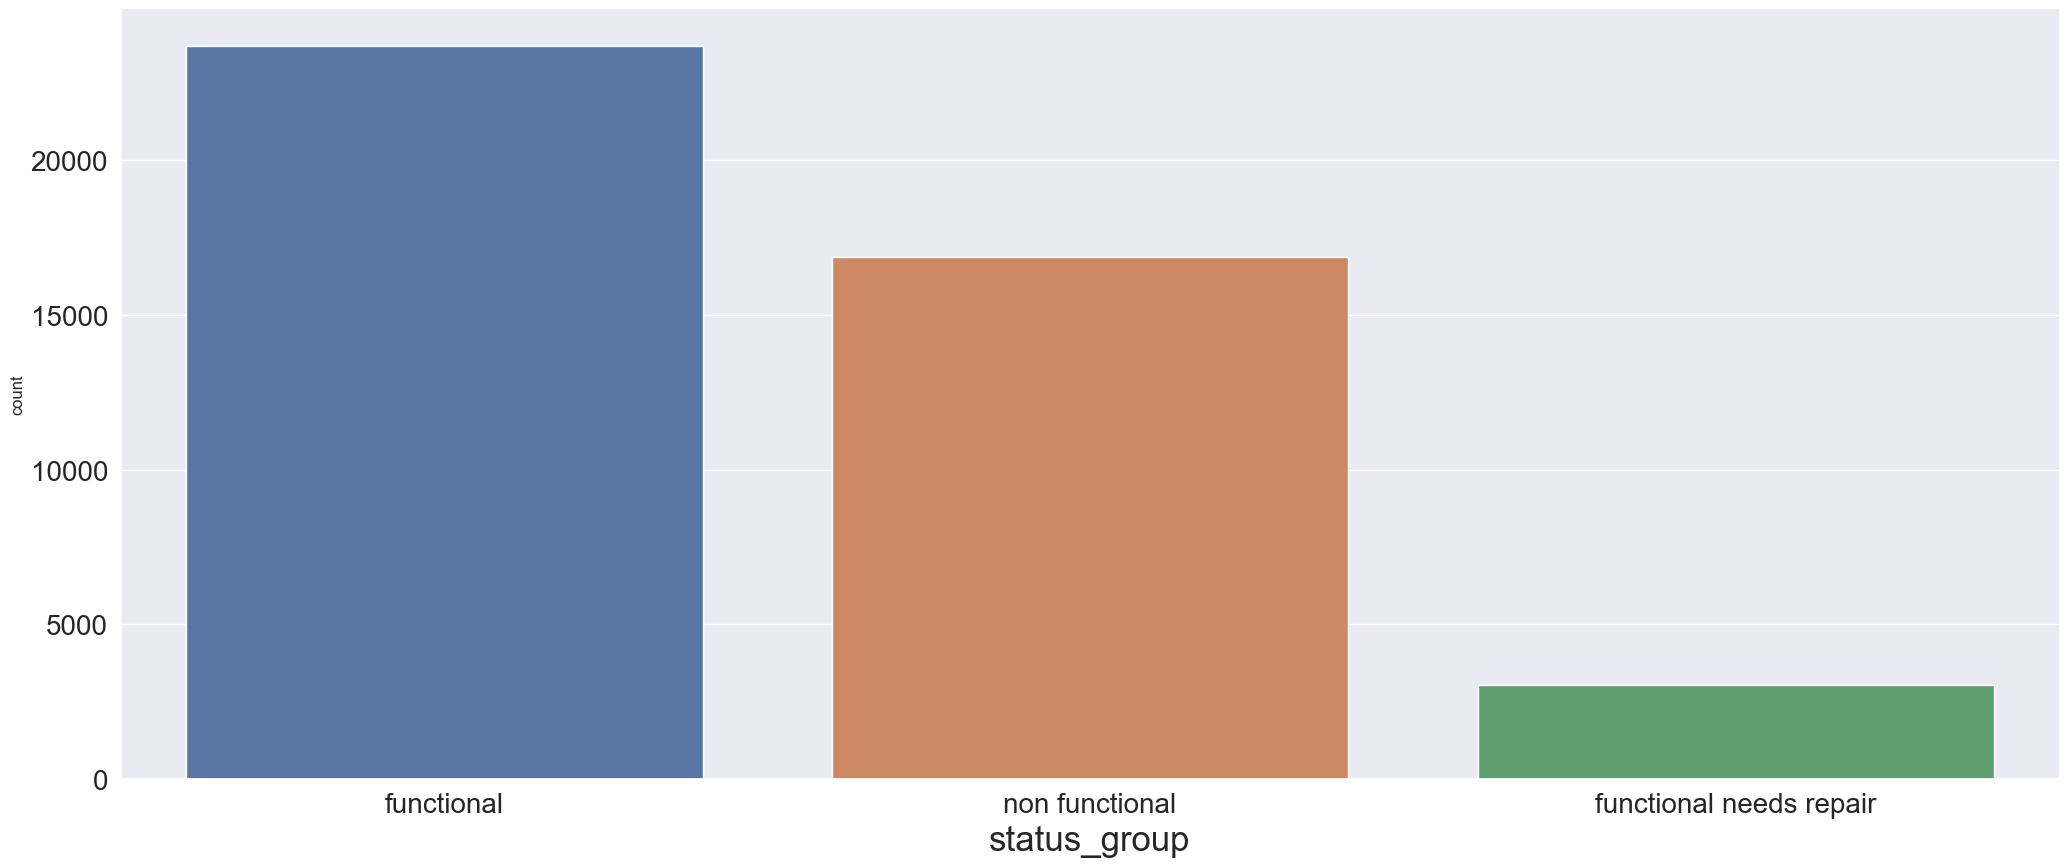

In [546]:
plt.figure(figsize=(25,10))
order = df.status_group.value_counts().index
sns.countplot(x='status_group', data=df, order=order).tick_params(labelsize=20)
sns.countplot(x='status_group', data=df, order=order).set_xlabel('status_group',fontsize=25)
sns.despine()

##### Distribution of feature values

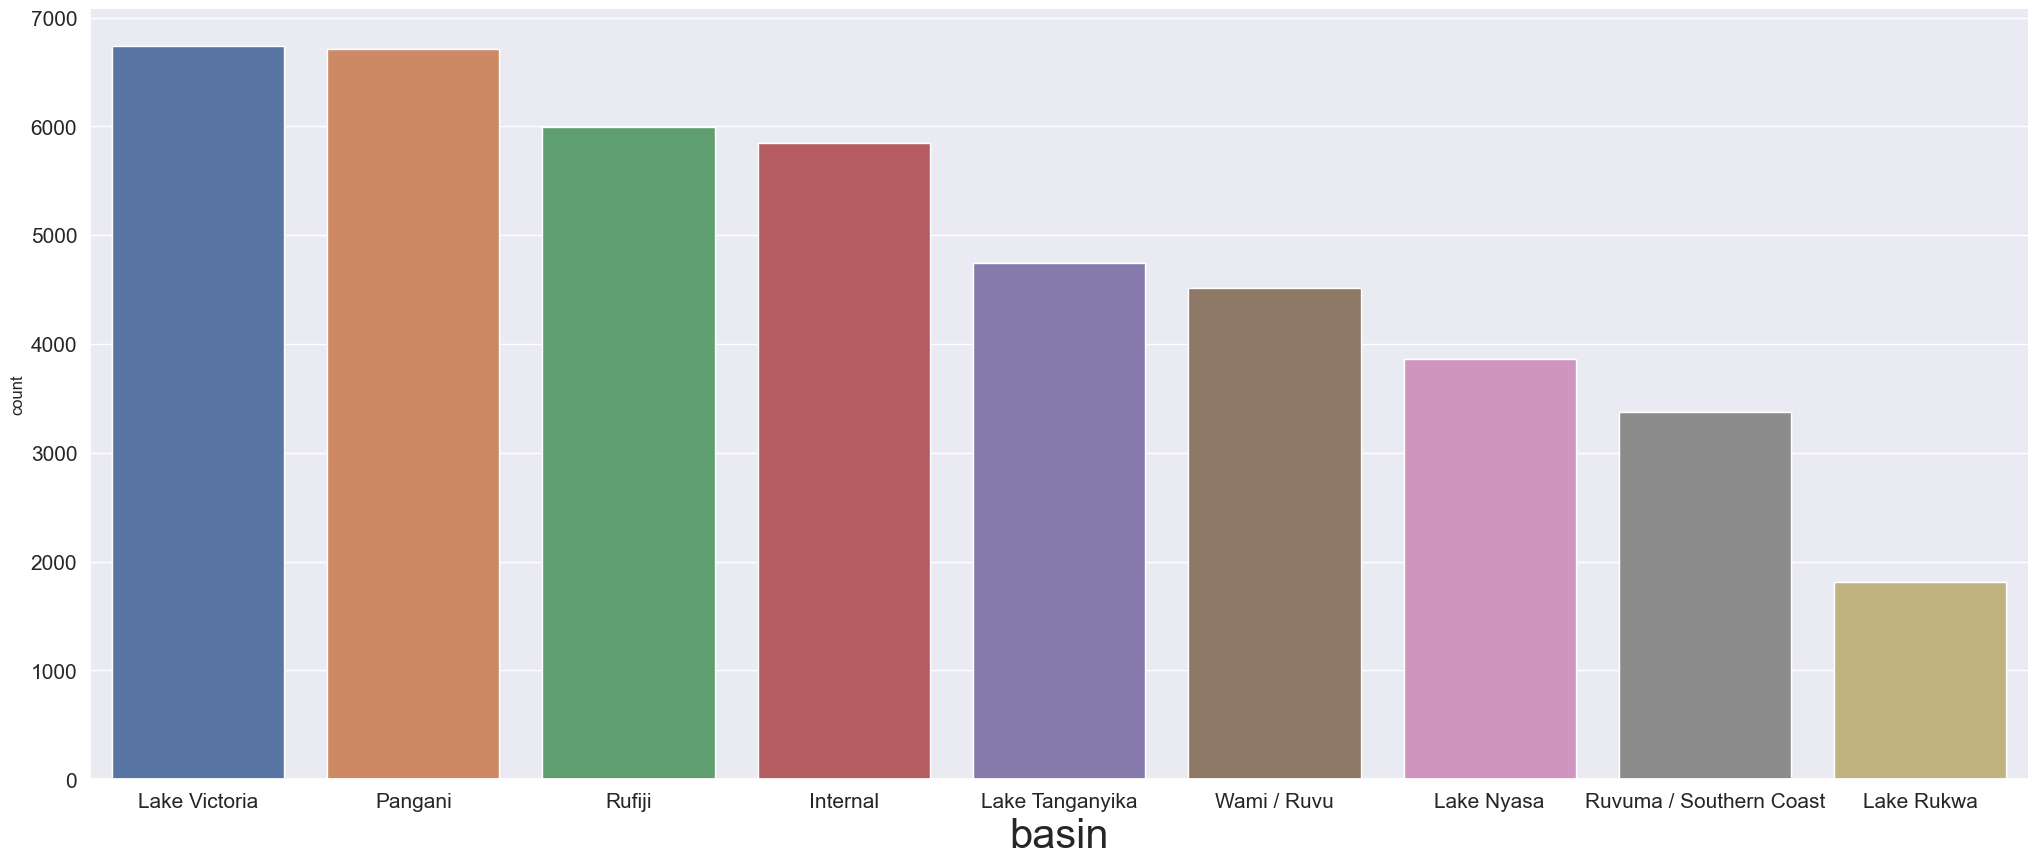

In [547]:
plt.figure(figsize=(25,10))
order = df.basin.value_counts().index
sns.countplot(x='basin', data=df, order=order).tick_params(labelsize=15)
sns.countplot(x='basin', data=df, order=order).set_xlabel('basin',fontsize=30)
sns.despine()

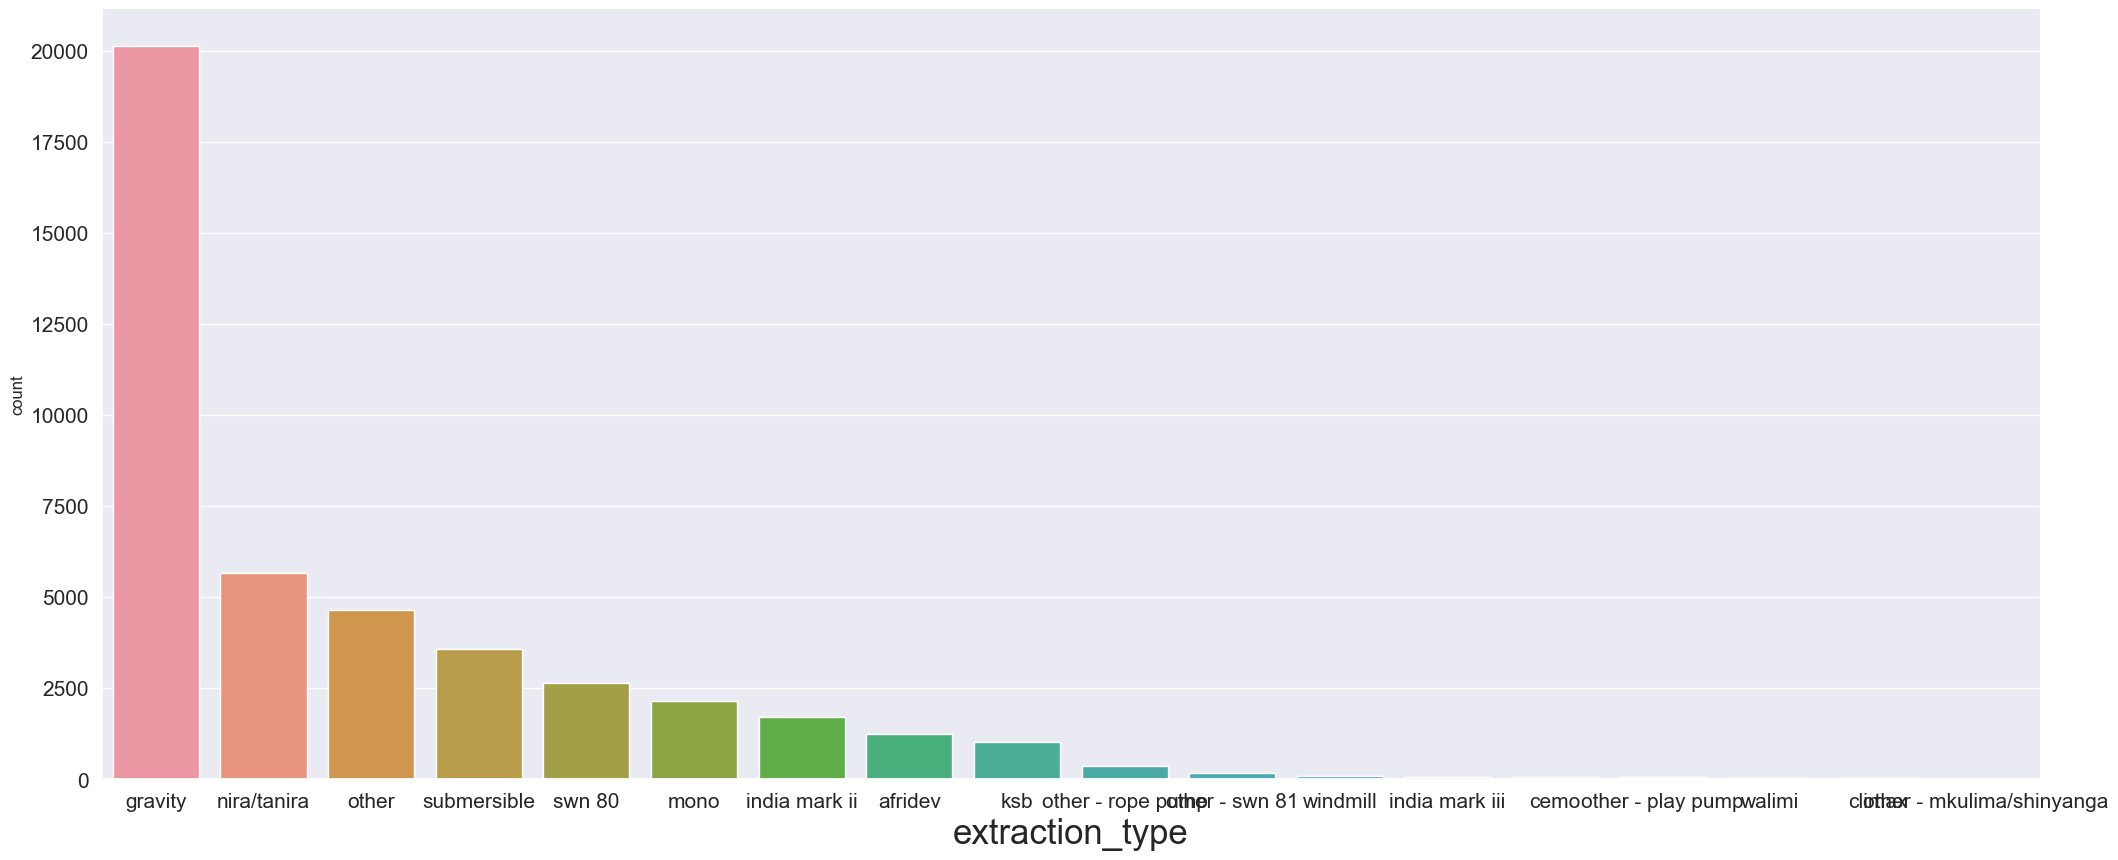

In [548]:
plt.figure(figsize=(25,10))
order = df.extraction_type.value_counts().index
sns.countplot(x='extraction_type', data=df, order=order).set_xlabel('extraction_type',fontsize=25)
sns.countplot(x='extraction_type', data=df, order=order).tick_params(labelsize=15)
sns.despine()

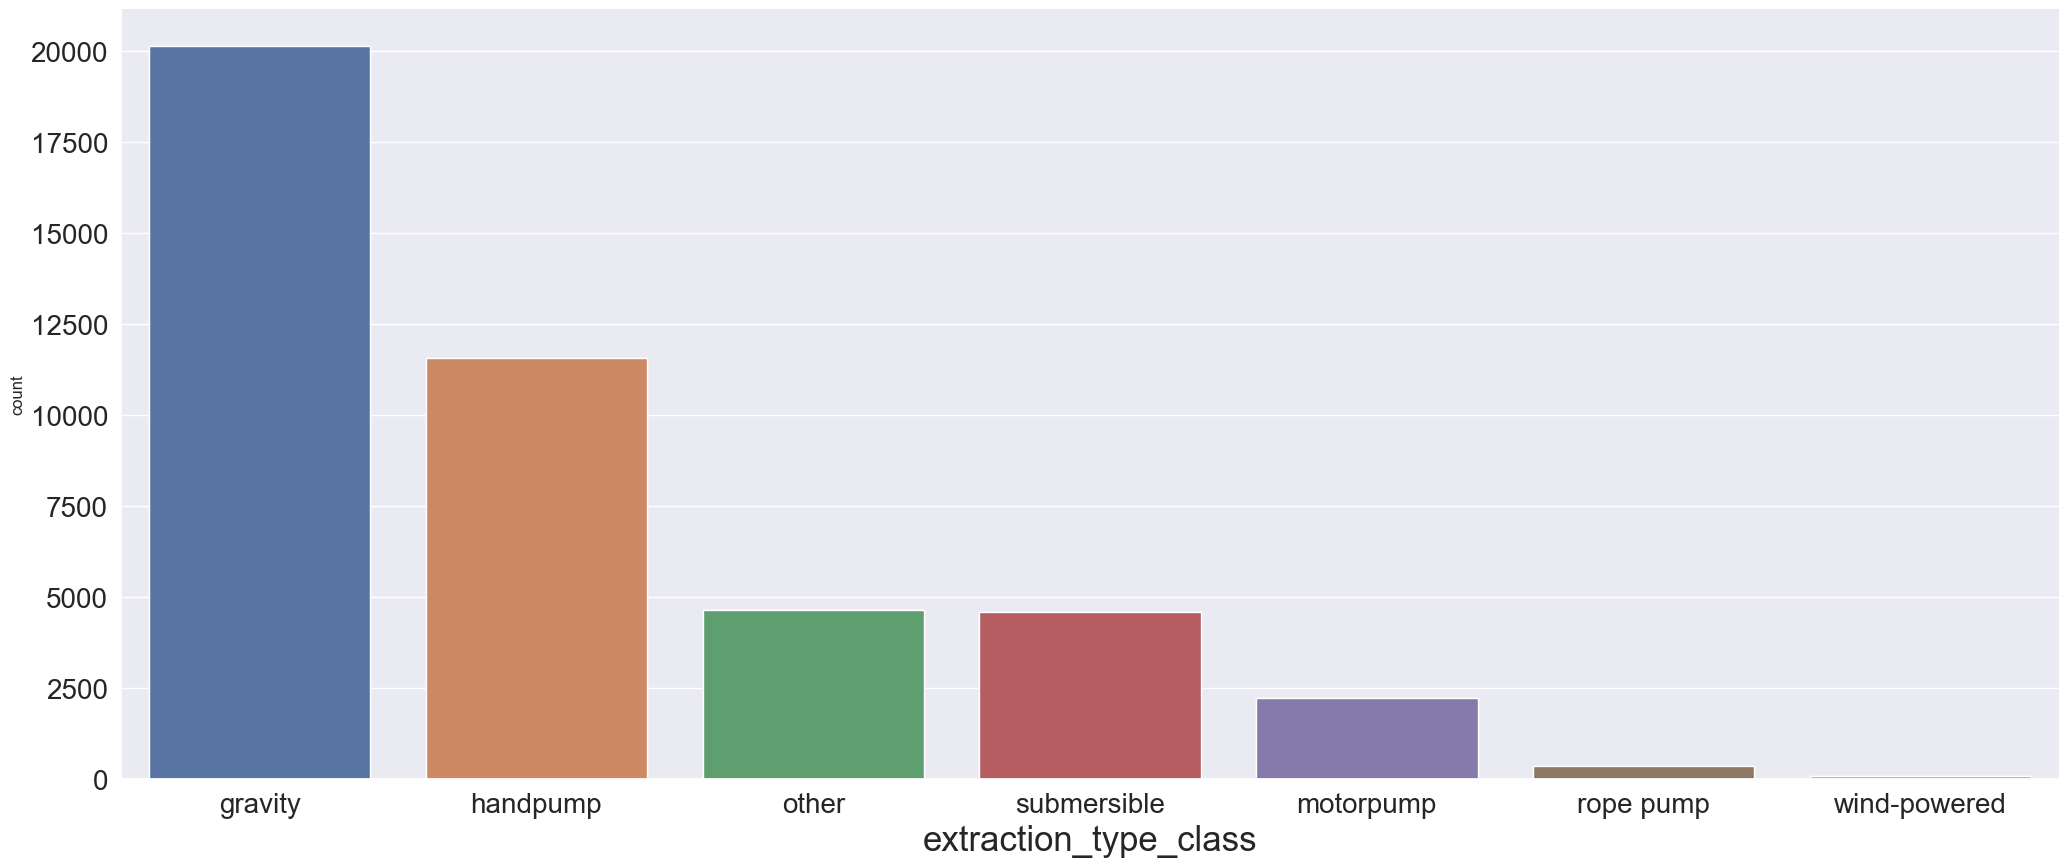

In [549]:
plt.figure(figsize=(25,10))
order = df.extraction_type_class.value_counts().index
sns.countplot(x='extraction_type_class', data=df, order=order ).tick_params(labelsize=20)
sns.countplot(x='extraction_type_class', data=df, order=order ).set_xlabel('extraction_type_class',fontsize=25)
sns.despine()

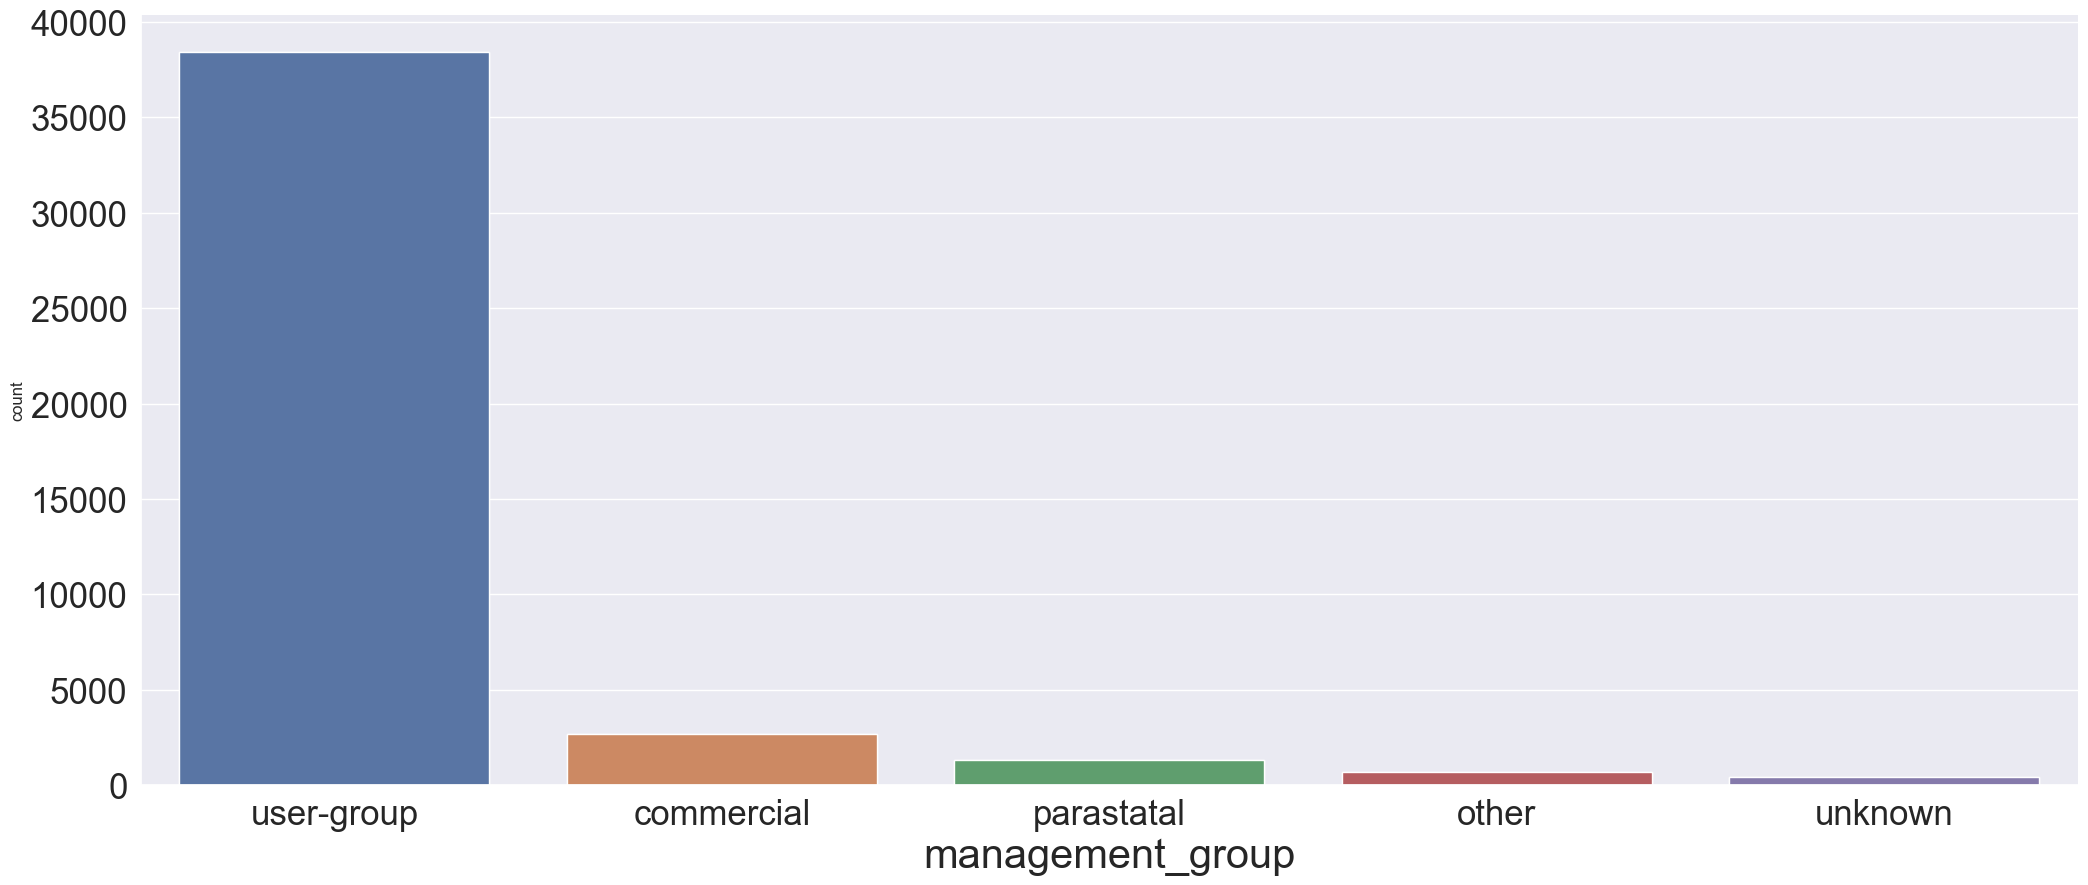

In [550]:
plt.figure(figsize=(25,10))
order = df.management_group.value_counts().index
sns.countplot(x='management_group', data=df, order=order).tick_params(labelsize=25)
sns.countplot(x='management_group', data=df, order=order).set_xlabel('management_group',fontsize=30)
sns.despine()

We have 'other' and 'unknown' variables. It is useles having to unknow class.We will add 'unknown' to "other".

We are doing same thing for test_df. If we don't our predictions will be wrong or our model will not work properly

In [551]:
##########################################################################
df['management_group'] = df['management_group'].replace('unknown', 'other')


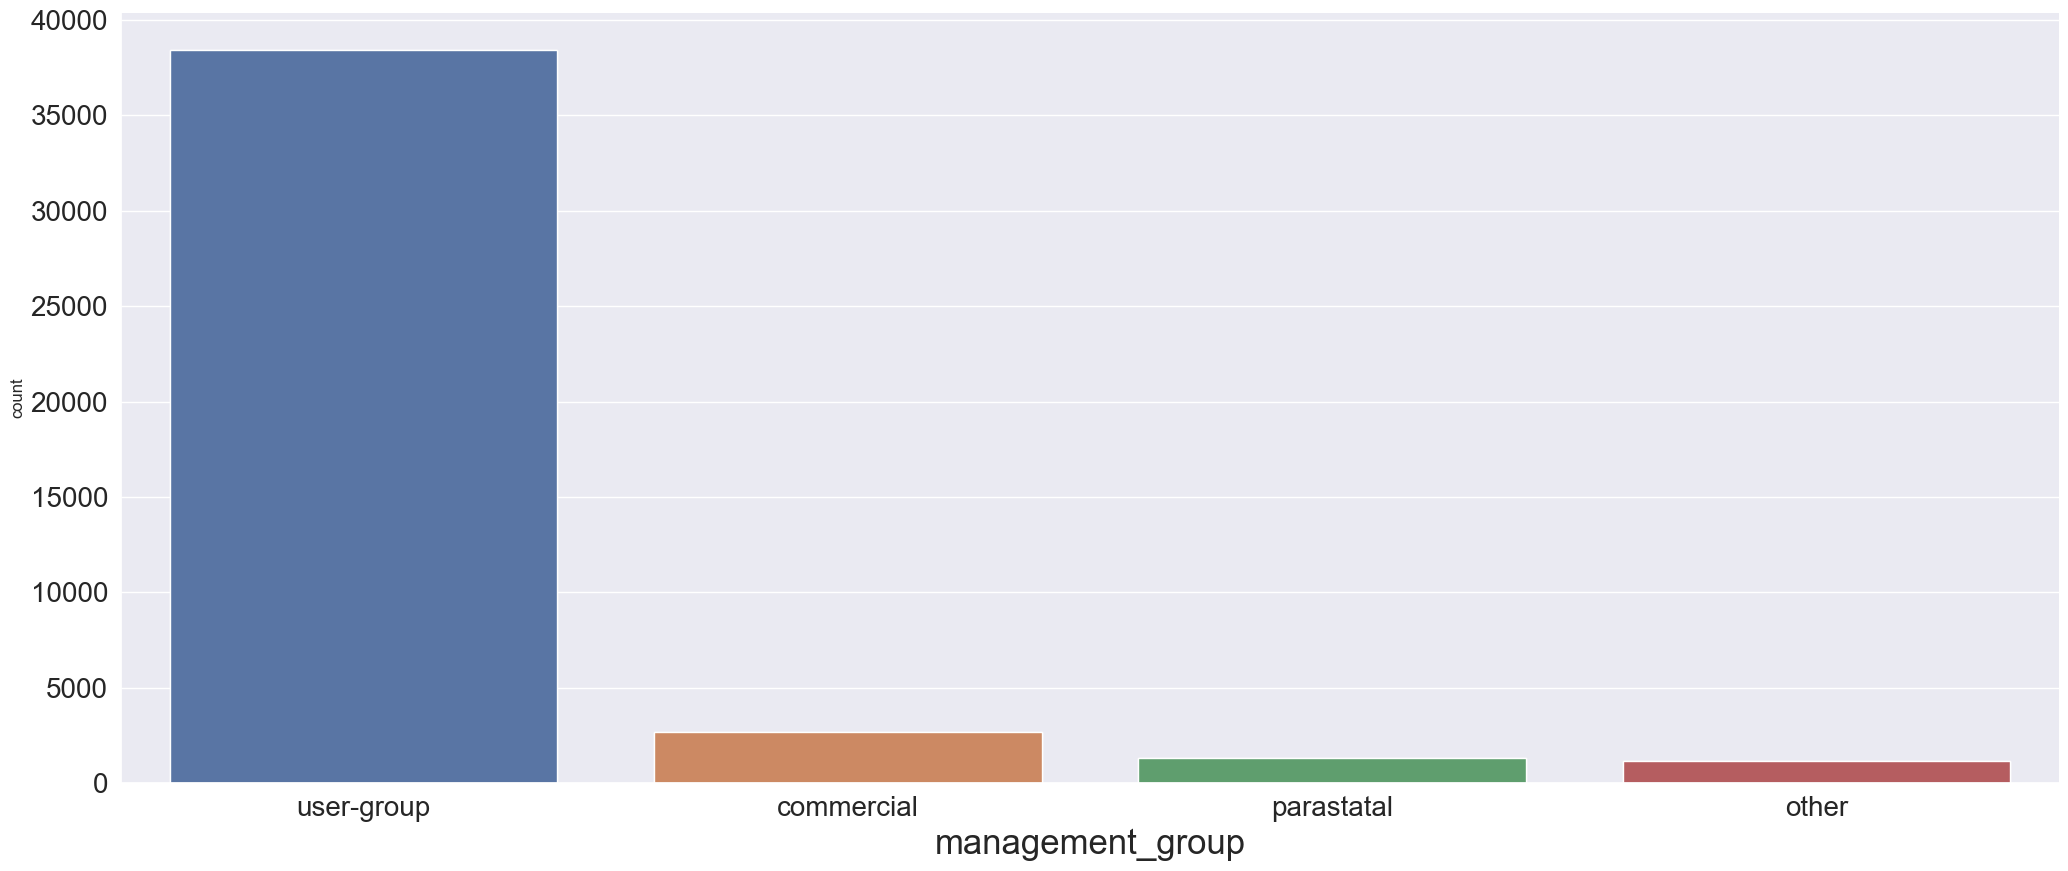

In [552]:
plt.figure(figsize=(25,10))
order = df.management_group.value_counts().index
sns.countplot(x='management_group', data=df, order=order).tick_params(labelsize=20)
sns.countplot(x='management_group', data=df, order=order).set_xlabel('management_group',fontsize=25)
sns.despine()

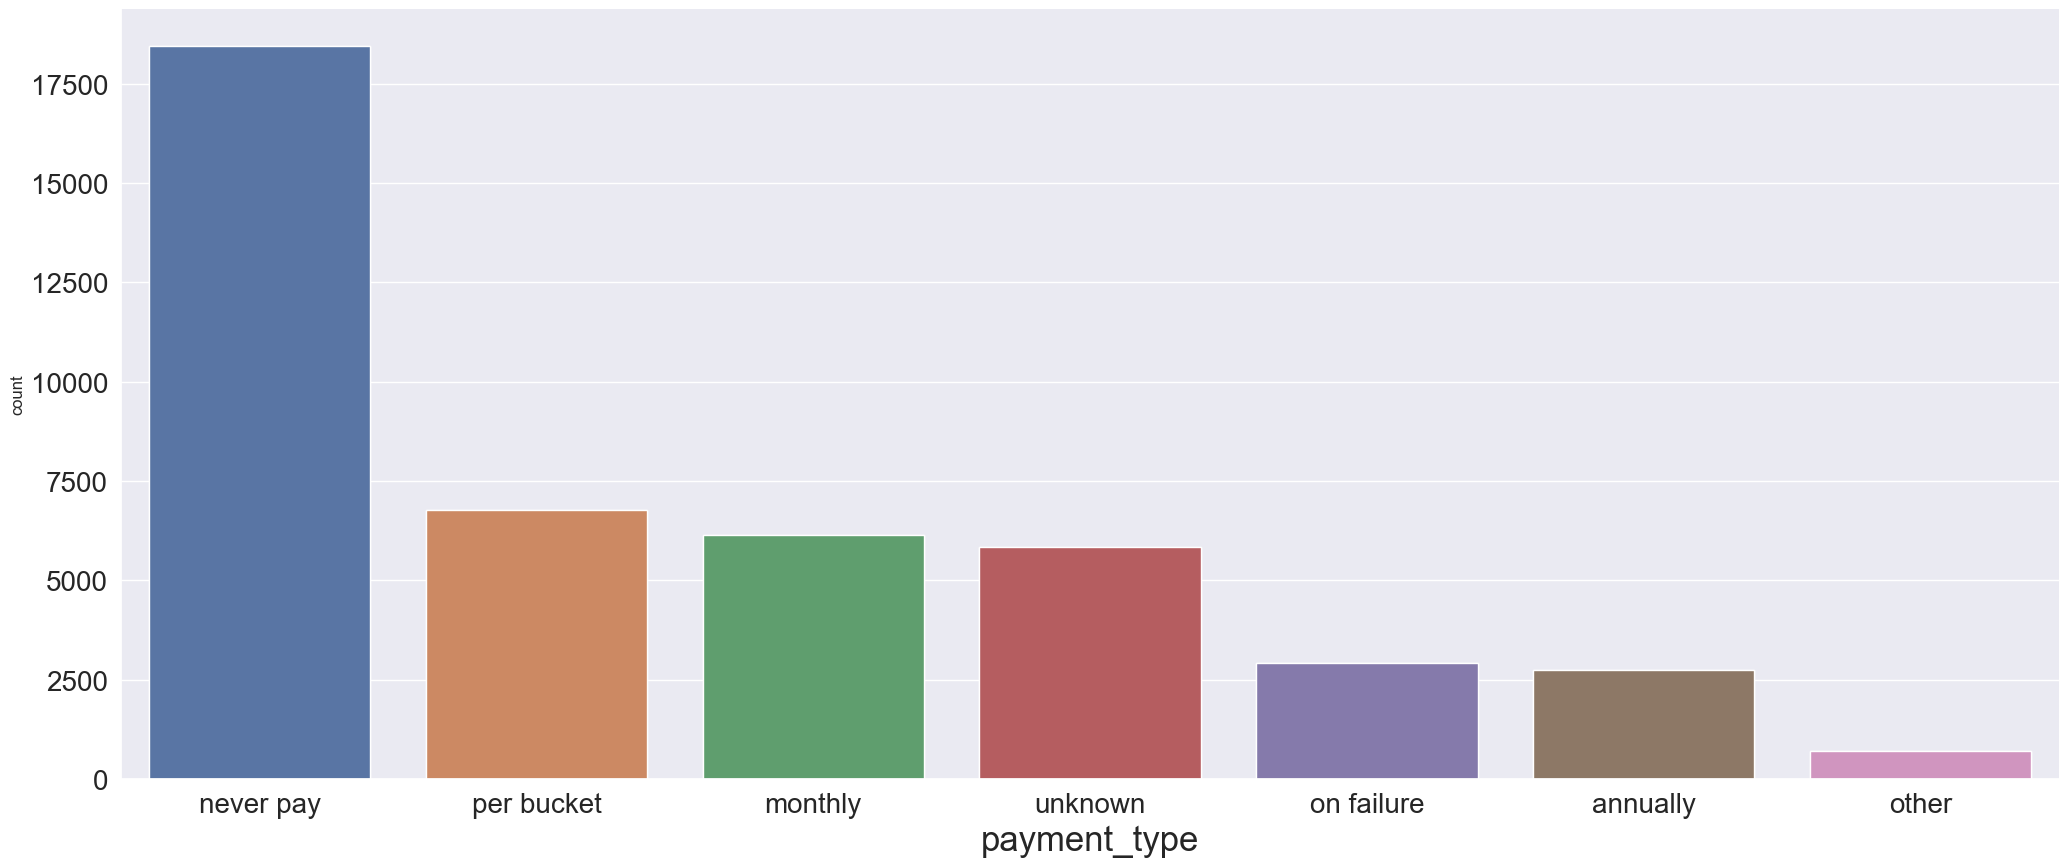

In [553]:
plt.figure(figsize=(25,10))
order = df.payment_type.value_counts().index
sns.countplot(x='payment_type', data=df, order=order).tick_params(labelsize=20)
sns.countplot(x='payment_type', data=df, order=order).set_xlabel('payment_type',fontsize=25)
sns.despine()

In [554]:
list(df['payment_type'].unique())

['monthly',
 'unknown',
 'on failure',
 'never pay',
 'per bucket',
 'annually',
 'other']

We have 'other' and 'unknown' sections again. We will add 'unknown' to "other".
Maybe we can loose data resolution a little. But we are reducing dimension for our model.Each of them seems missing values

In [555]:
###########################################################################
df['payment_type'] = df['payment_type'].replace('unknown', 'other')


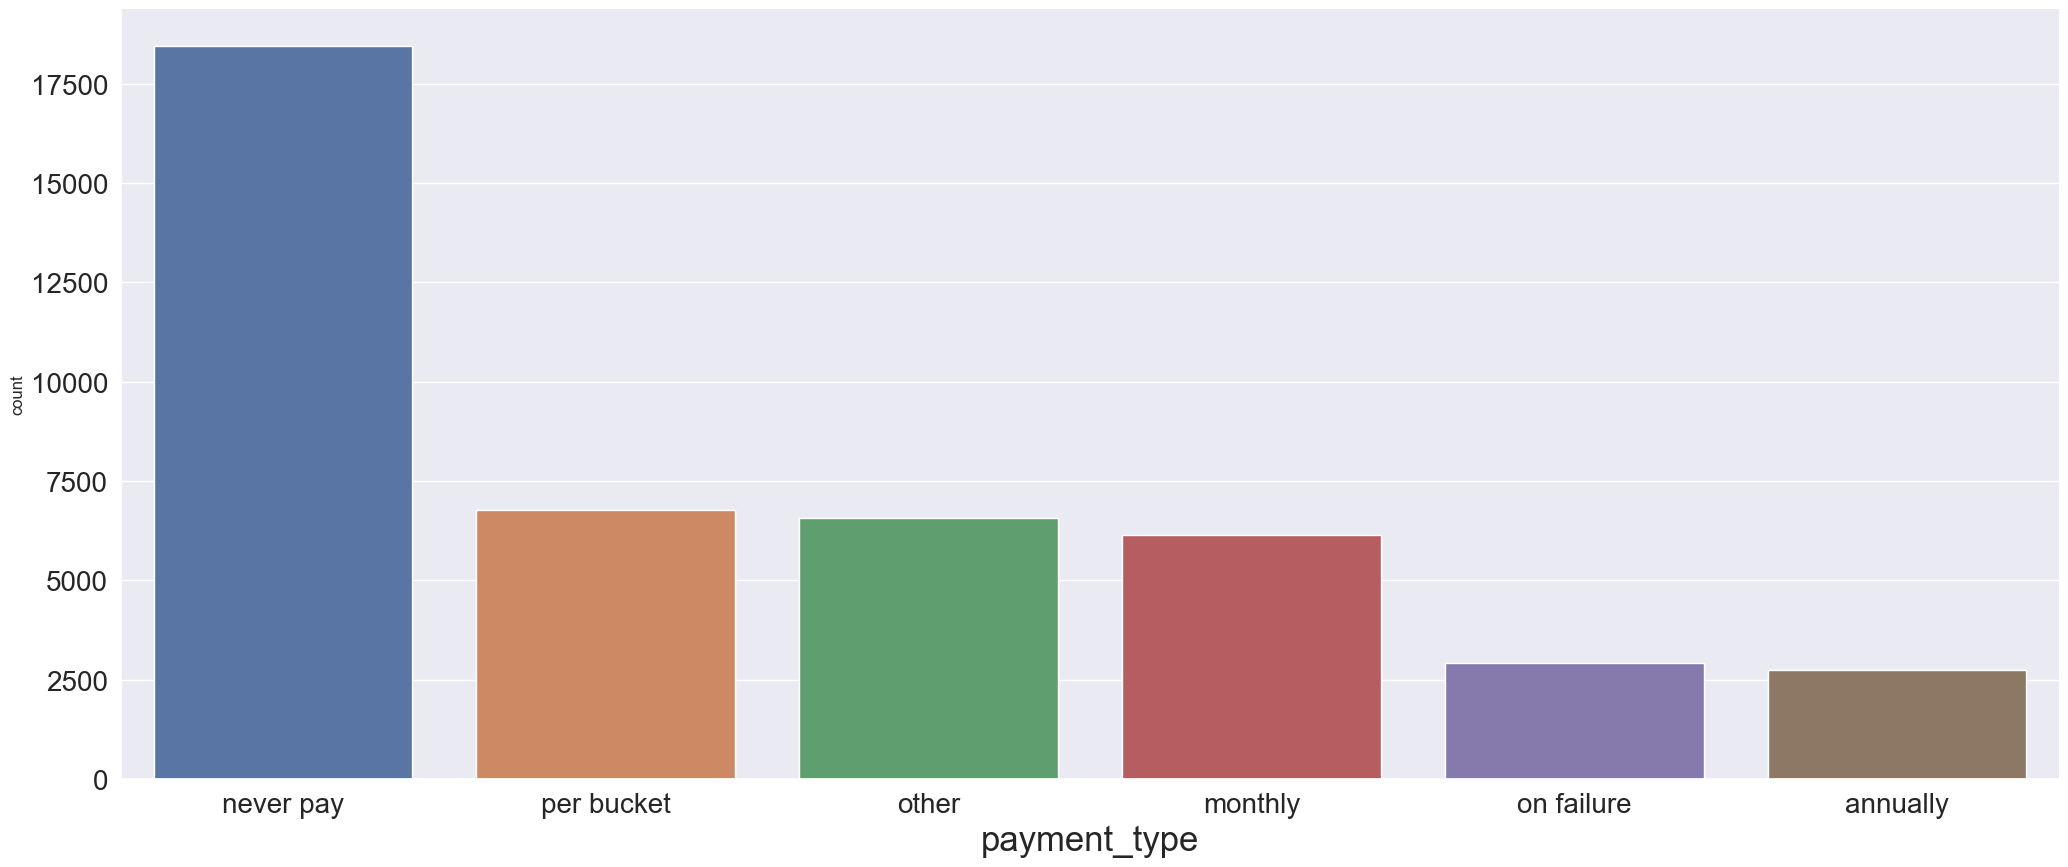

In [556]:
plt.figure(figsize=(25,10))
order = df.payment_type.value_counts().index
sns.countplot(x='payment_type', data=df, order=order).tick_params(labelsize=20)
sns.countplot(x='payment_type', data=df, order=order).set_xlabel('payment_type',fontsize=25)
sns.despine()

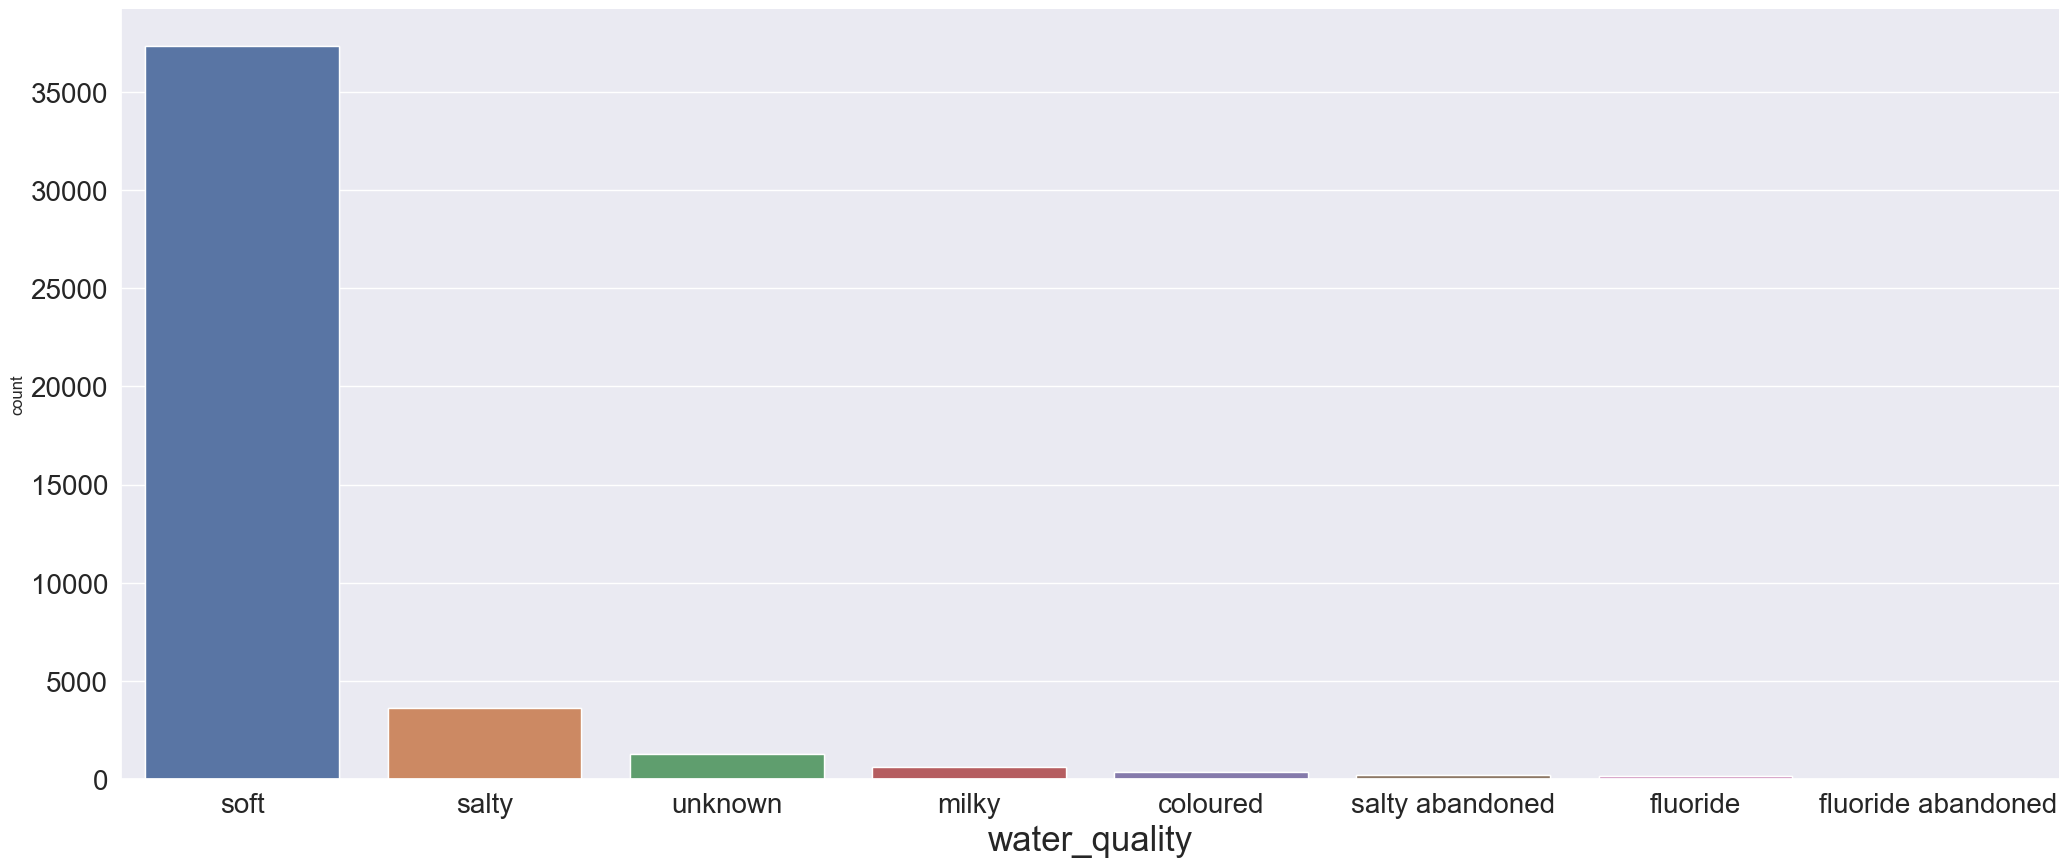

In [557]:
plt.figure(figsize=(25,10))
order = df.water_quality.value_counts().index
sns.countplot(x='water_quality', data=df, order=order).tick_params(labelsize=20)
sns.countplot(x='water_quality', data=df, order=order).set_xlabel('water_quality',fontsize=25)
sns.despine()

In [558]:
list(df['water_quality'].unique())

['soft',
 'milky',
 'salty',
 'coloured',
 'unknown',
 'salty abandoned',
 'fluoride',
 'fluoride abandoned']

In [559]:
print('# soft  = {}'.format(len(df[df['water_quality'] =='soft'])))
print('# salty  = {}'.format(len(df[df['water_quality'] =='salty'])))
print('# unknown  = {}'.format(len(df[df['water_quality'] =='unknown'])))

# soft  = 37336
# salty  = 3617
# unknown  = 1294


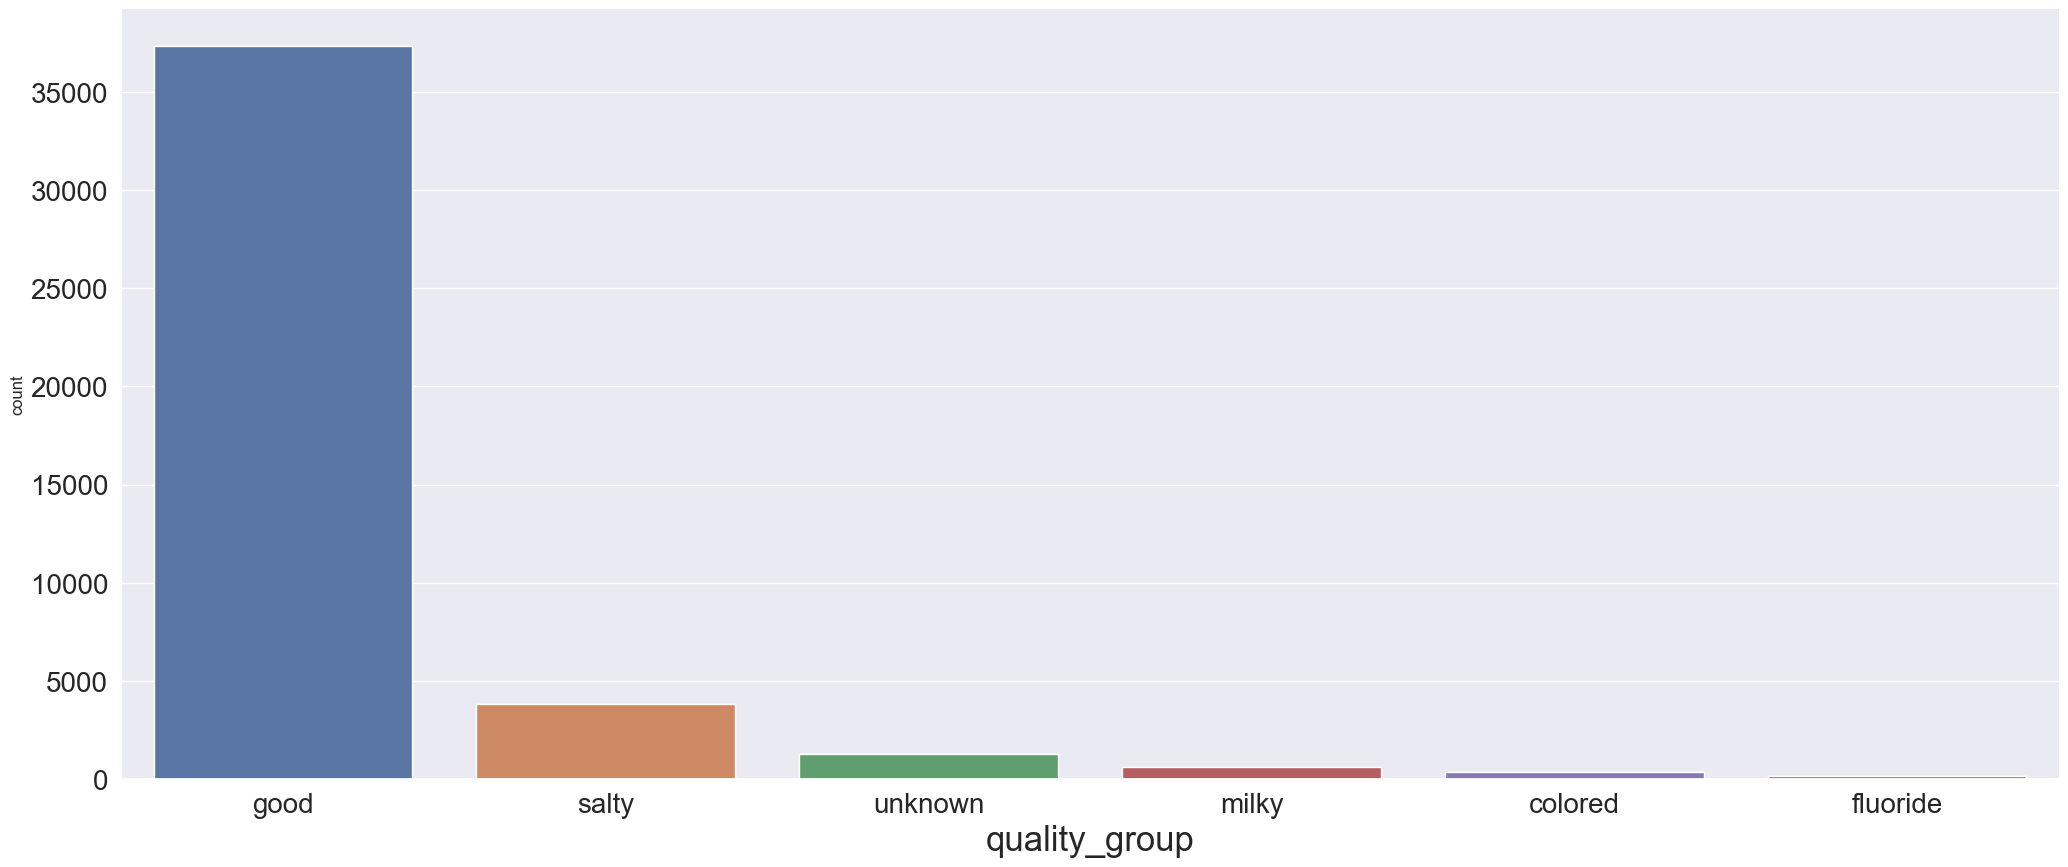

In [560]:
plt.figure(figsize=(25,10))
order = df.quality_group.value_counts().index
sns.countplot(x='quality_group', data=df, order=order).tick_params(labelsize=20)
sns.countplot(x='quality_group', data=df, order=order).set_xlabel('quality_group',fontsize=25)
sns.despine()

In [561]:
print('# good  = {}'.format(len(df[df['quality_group'] =='good'])))
print('# salty  = {}'.format(len(df[df['quality_group'] =='salty'])))
print('# unknown  = {}'.format(len(df[df['quality_group'] =='unknown'])))

# good  = 37336
# salty  = 3825
# unknown  = 1294


##### When we look the detailed counts It seems water_quality and quality_group features are same. We are gonna drop the quality_group which has less variables.

In [562]:
#######################################################
df.drop("quality_group", axis=1, inplace=True)


In [563]:
df.head(1)

,amount_tsh,gps_height,longitude,latitude,basin,population,public_meeting,scheme_management,permit,construction_year,extraction_type,extraction_type_class,management_group,payment_type,water_quality,quantity,source,source_class,waterpoint_type,status_group
0,200.0,1743,38.213814,-4.556877,Pangani,1,True,VWC,True,2002,gravity,gravity,user-group,monthly,soft,enough,spring,groundwater,communal standpipe,non functional


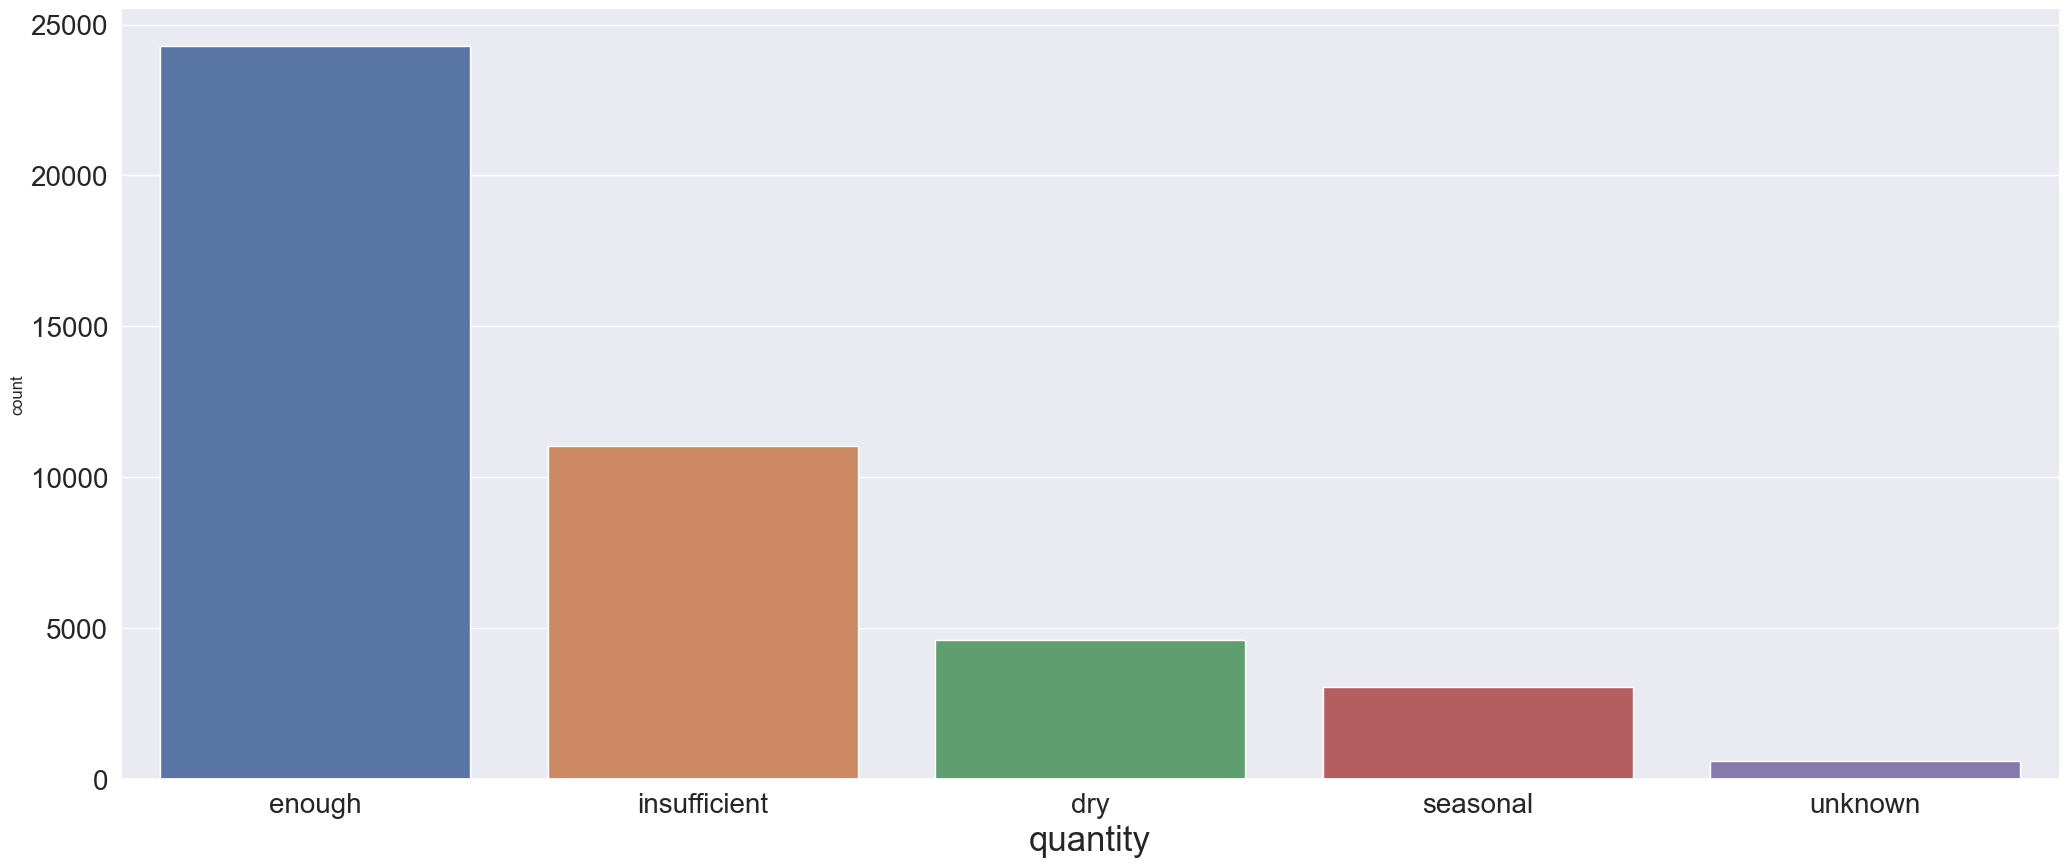

In [564]:
plt.figure(figsize=(25,10))
order = df.quantity.value_counts().index
sns.countplot(x='quantity', data=df, order=order).tick_params(labelsize=20)
sns.countplot(x='quantity', data=df, order=order).set_xlabel('quantity',fontsize=25)
sns.despine()

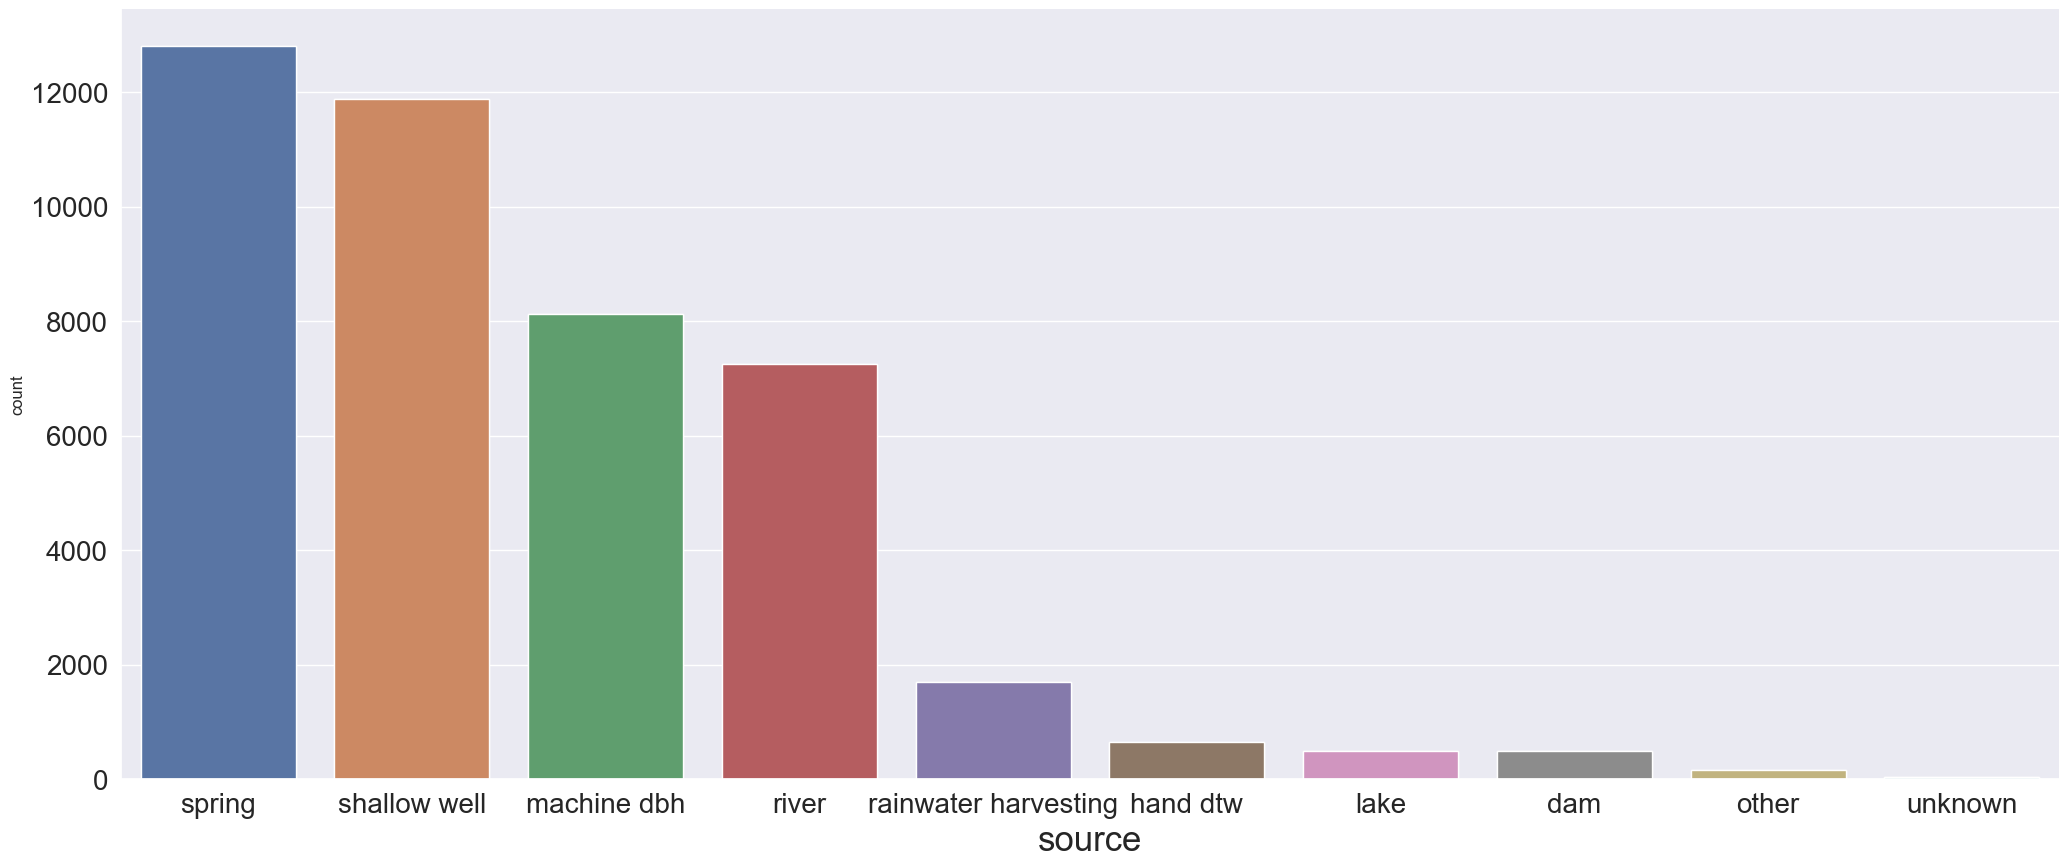

In [565]:
plt.figure(figsize=(25,10))
order = df.source.value_counts().index
sns.countplot(x='source', data=df, order=order).tick_params(labelsize=20)
sns.countplot(x='source', data=df, order=order).set_xlabel('source',fontsize=25)
sns.despine()

In [566]:
list(df['source'].unique())

['spring',
 'rainwater harvesting',
 'shallow well',
 'machine dbh',
 'lake',
 'dam',
 'river',
 'hand dtw',
 'other',
 'unknown']

In [567]:
###################################################################
df['source'] = df['source'].replace('unknown', 'other')


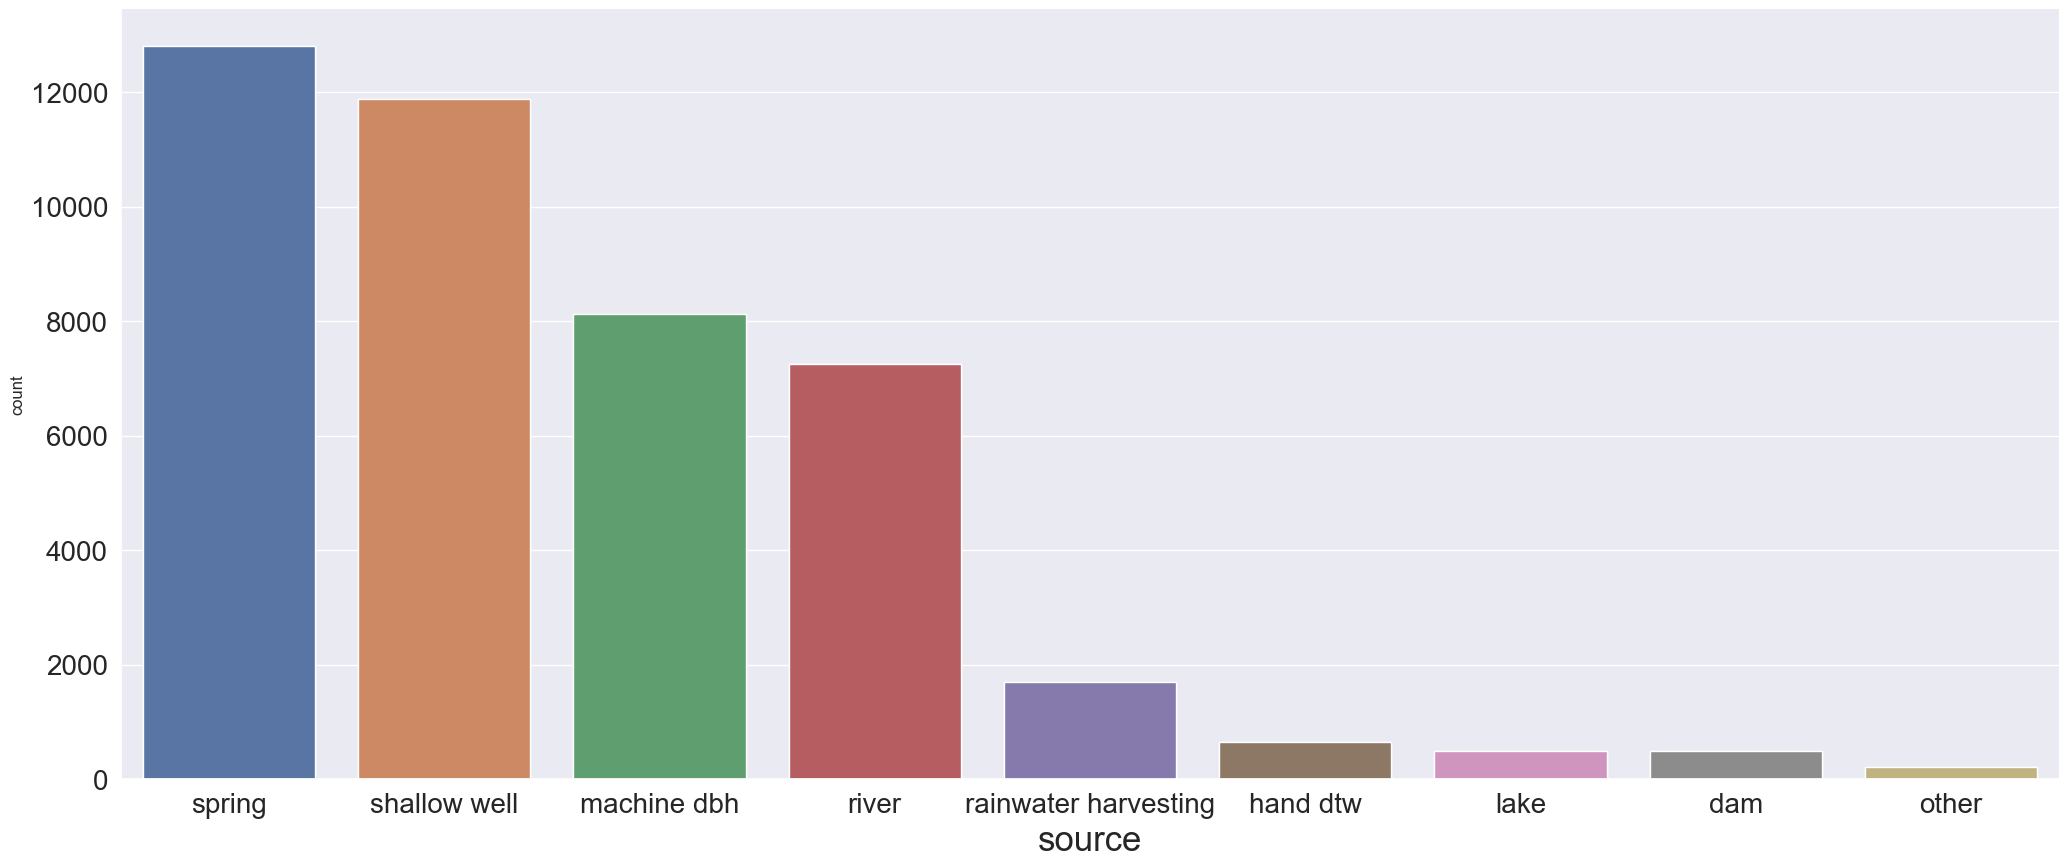

In [568]:
plt.figure(figsize=(25,10))
order = df.source.value_counts().index
sns.countplot(x='source', data=df, order=order).tick_params(labelsize=20)
sns.countplot(x='source', data=df, order=order).set_xlabel('source',fontsize=25)
sns.despine()

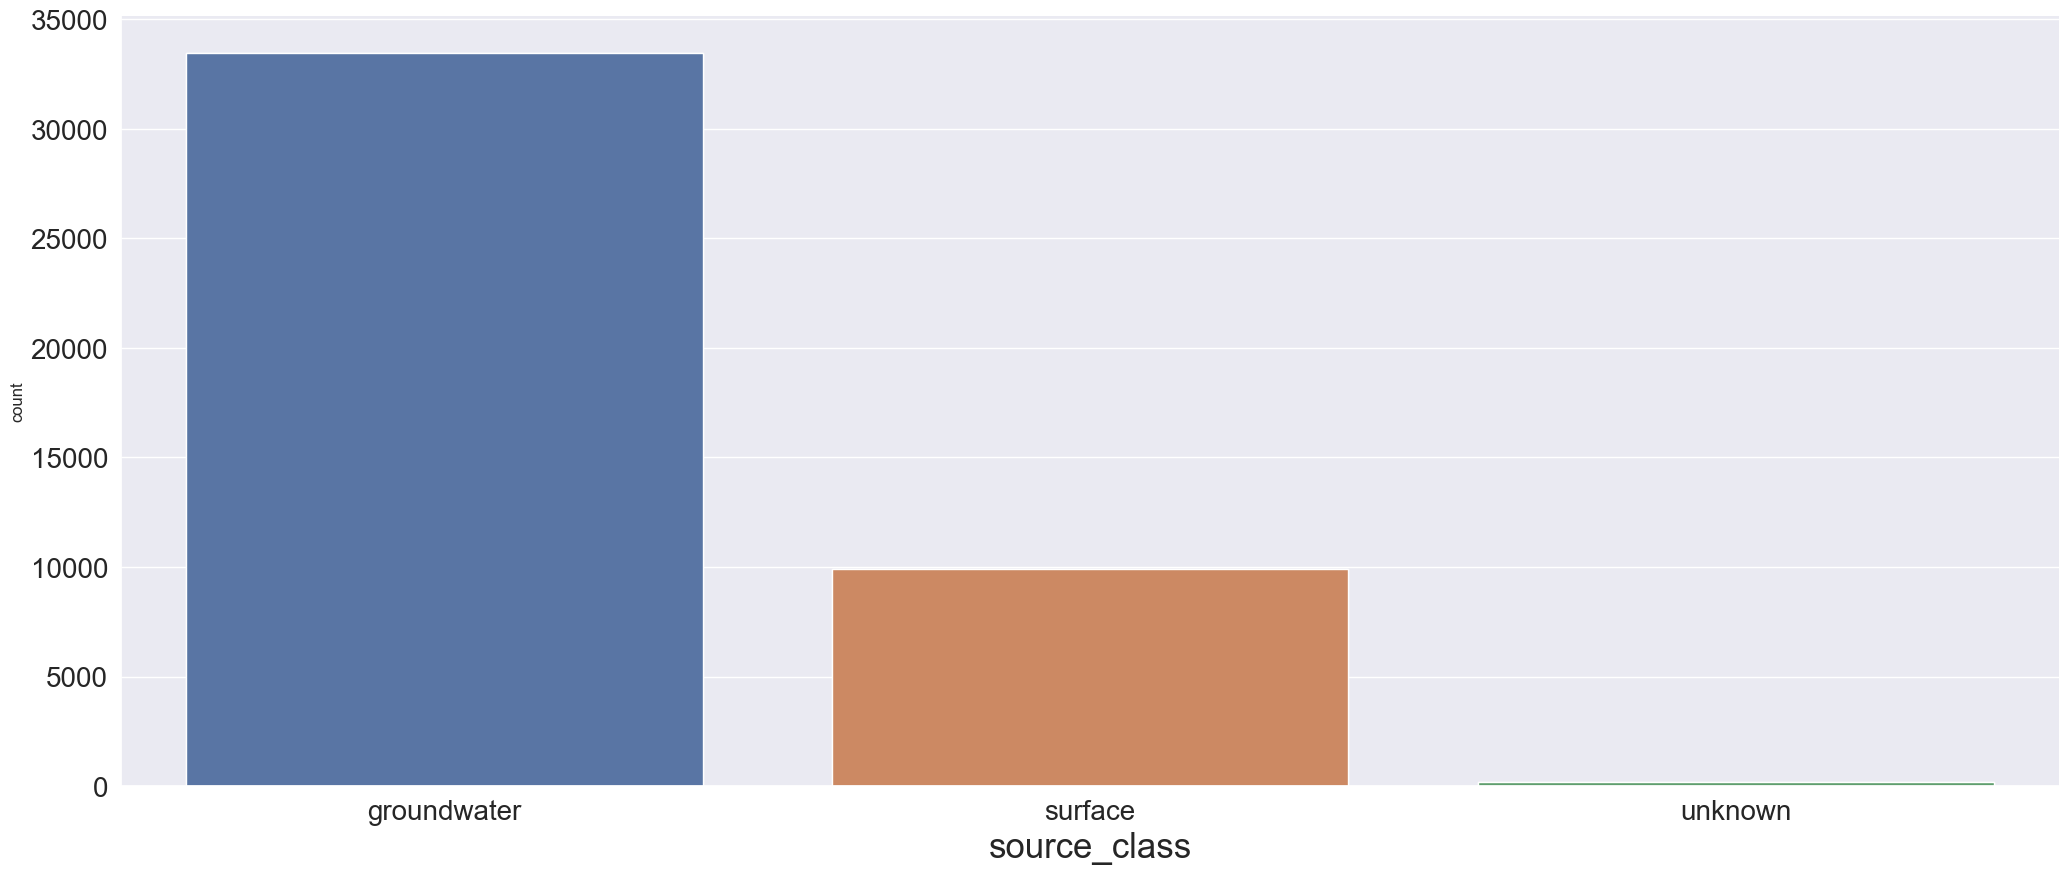

In [569]:
plt.figure(figsize=(25,10))
order = df.source_class.value_counts().index
sns.countplot(x='source_class', data=df, order=order).tick_params(labelsize=20)
sns.countplot(x='source_class', data=df, order=order).set_xlabel('source_class',fontsize=25)
sns.despine()

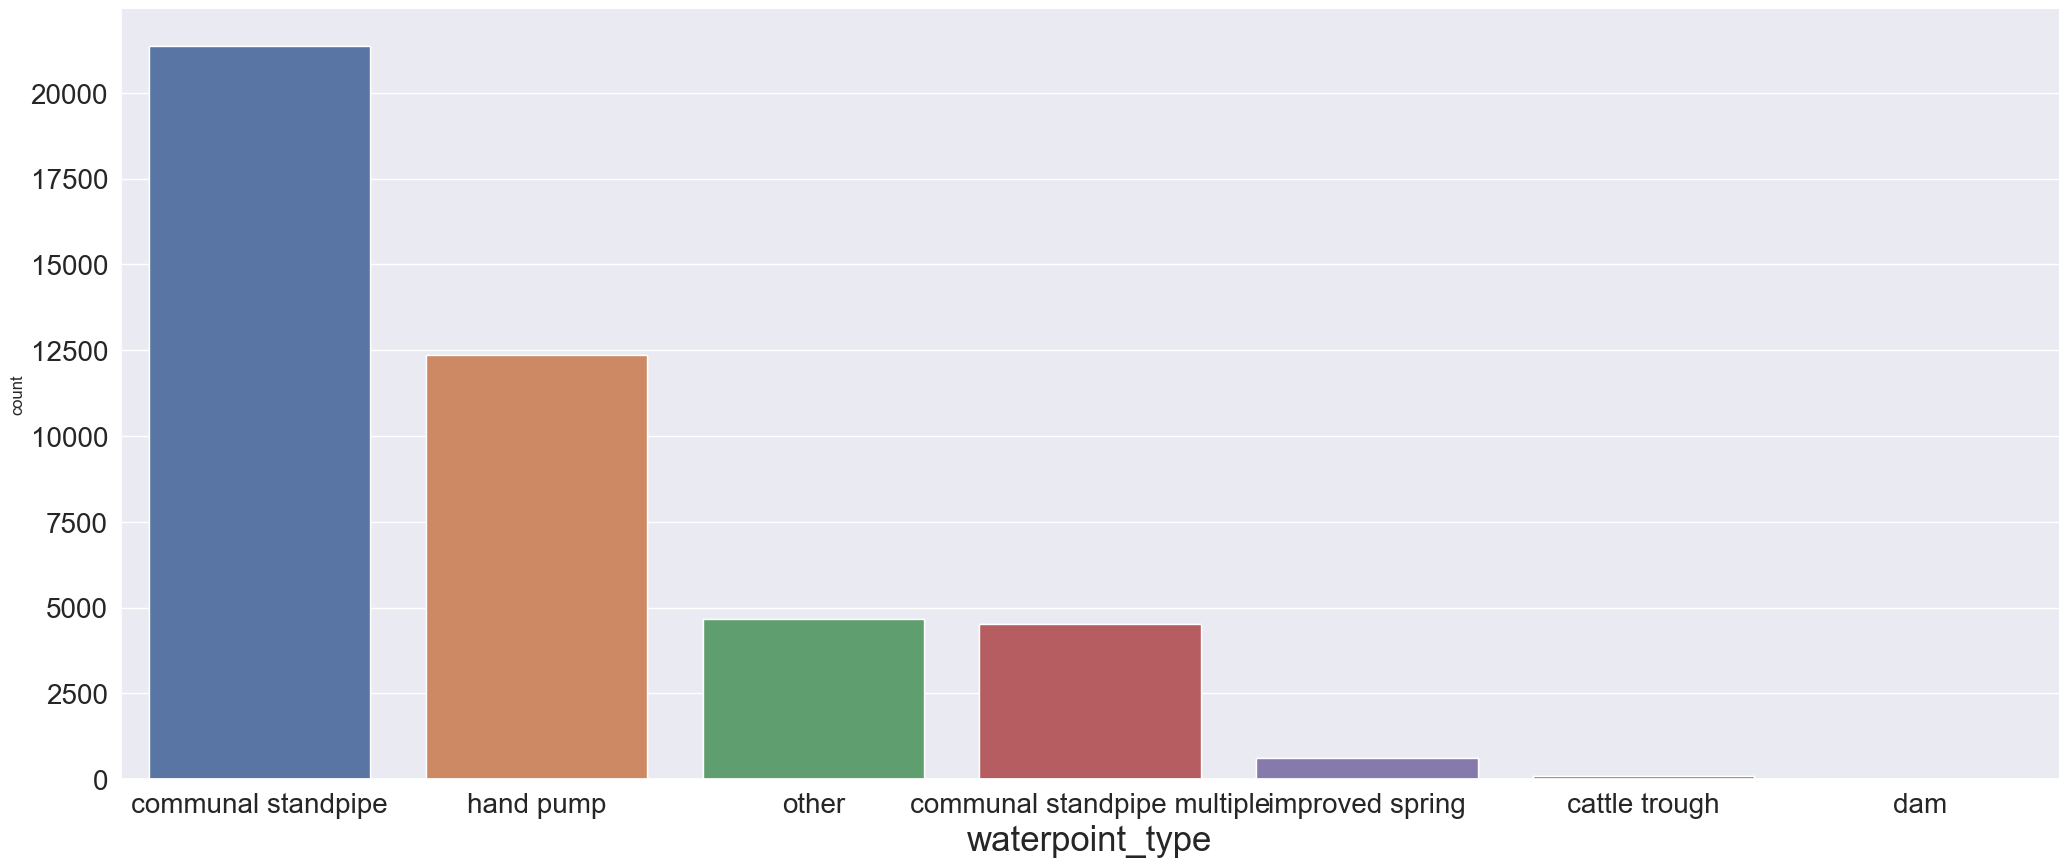

In [570]:
plt.figure(figsize=(25,10))
order = df.waterpoint_type.value_counts().index
sns.countplot(x='waterpoint_type', data=df, order=order).tick_params(labelsize=20)
sns.countplot(x='waterpoint_type', data=df, order=order).set_xlabel('waterpoint_type',fontsize=25)

sns.despine()

### UNIVARIATE ANALYSIS 

    We will look at the relationship between features and the target value.

In [571]:
df.dtypes

amount_tsh               float64
gps_height                 int64
longitude                float64
latitude                 float64
basin                     object
population                 int64
public_meeting            object
scheme_management         object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_class     object
management_group          object
payment_type              object
water_quality             object
quantity                  object
source                    object
source_class              object
waterpoint_type           object
status_group              object
dtype: object

### basin - functionality distrubution

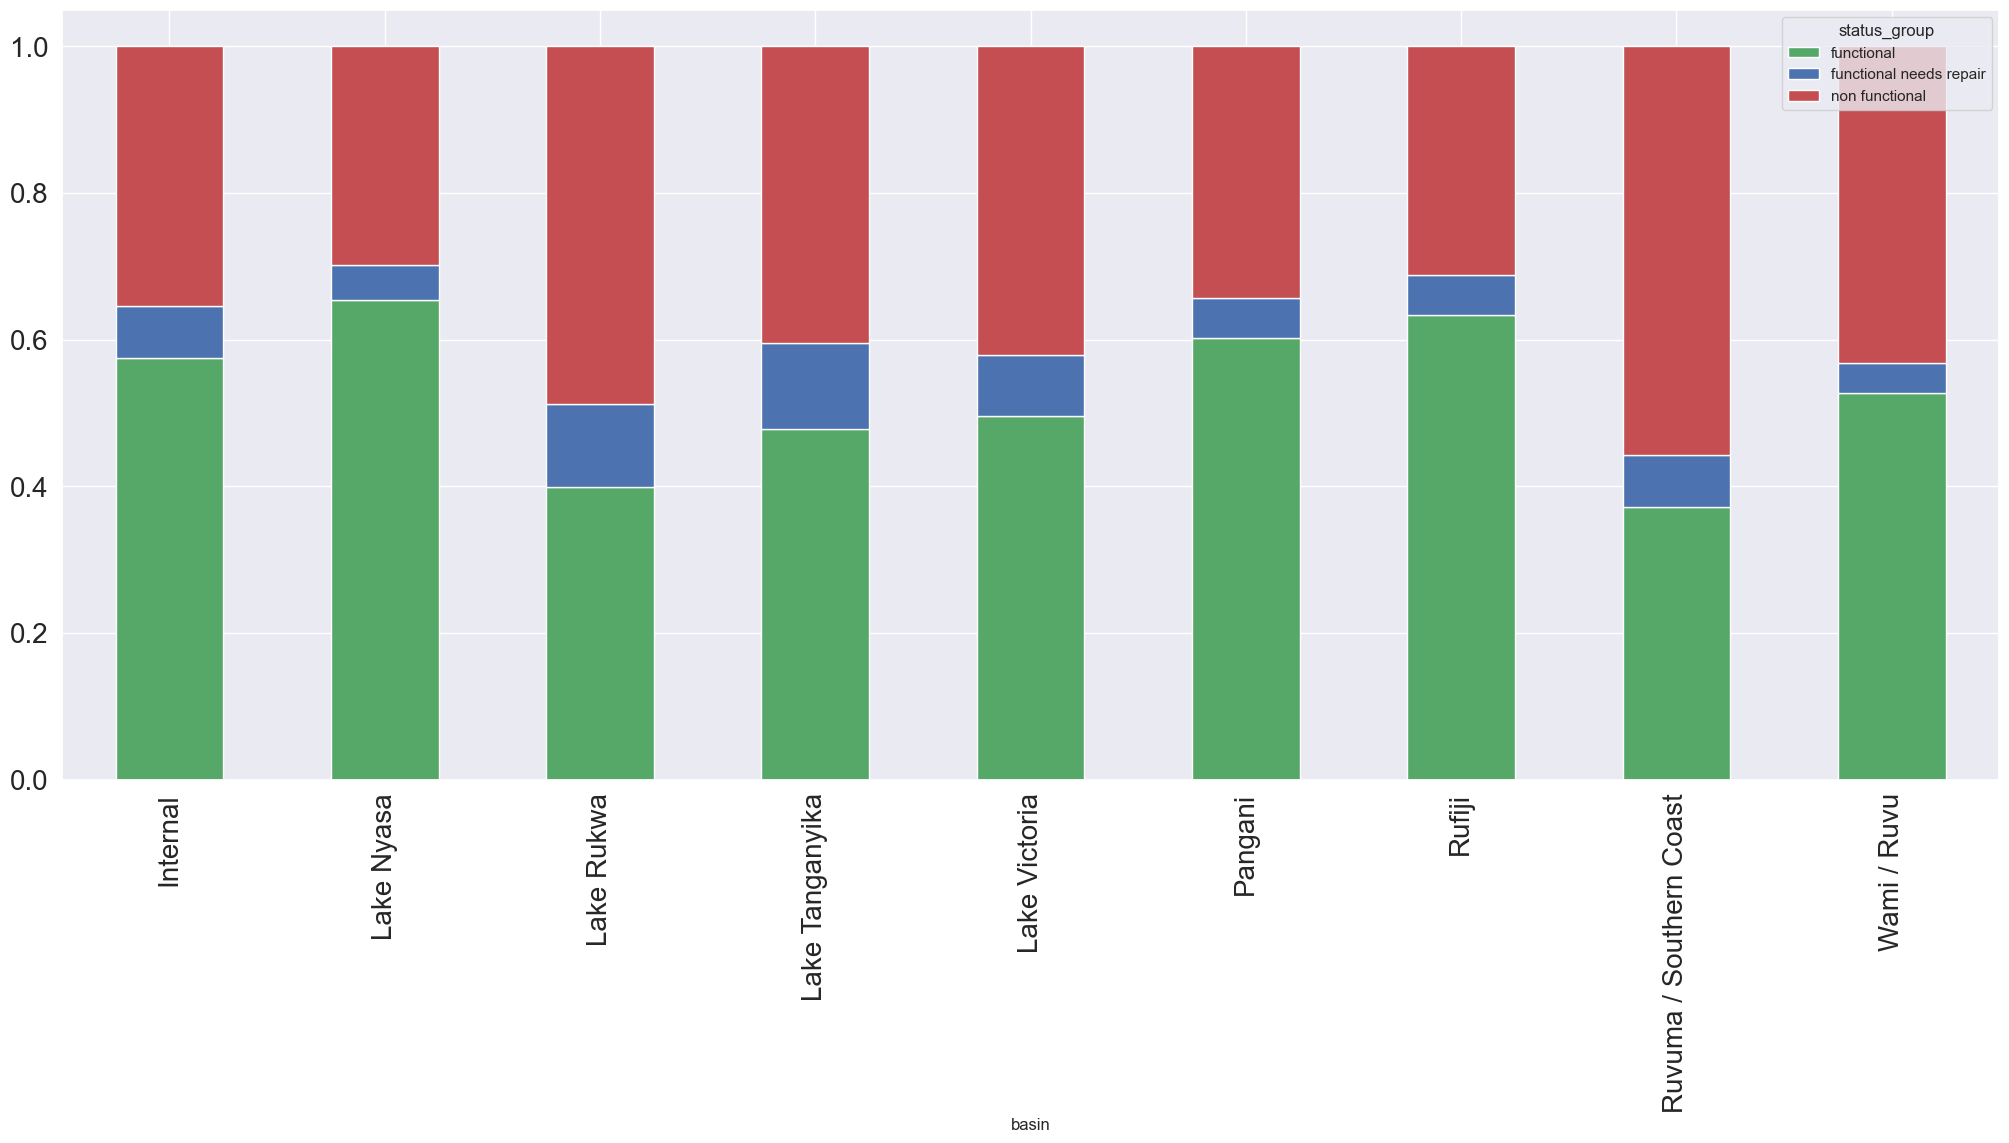

In [572]:
table=pd.crosstab(df.basin, df.status_group)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(25,10), stacked=True , fontsize=20 , color=('g','b','r'))

plt.show()

### extraction_type - functionality distrubution

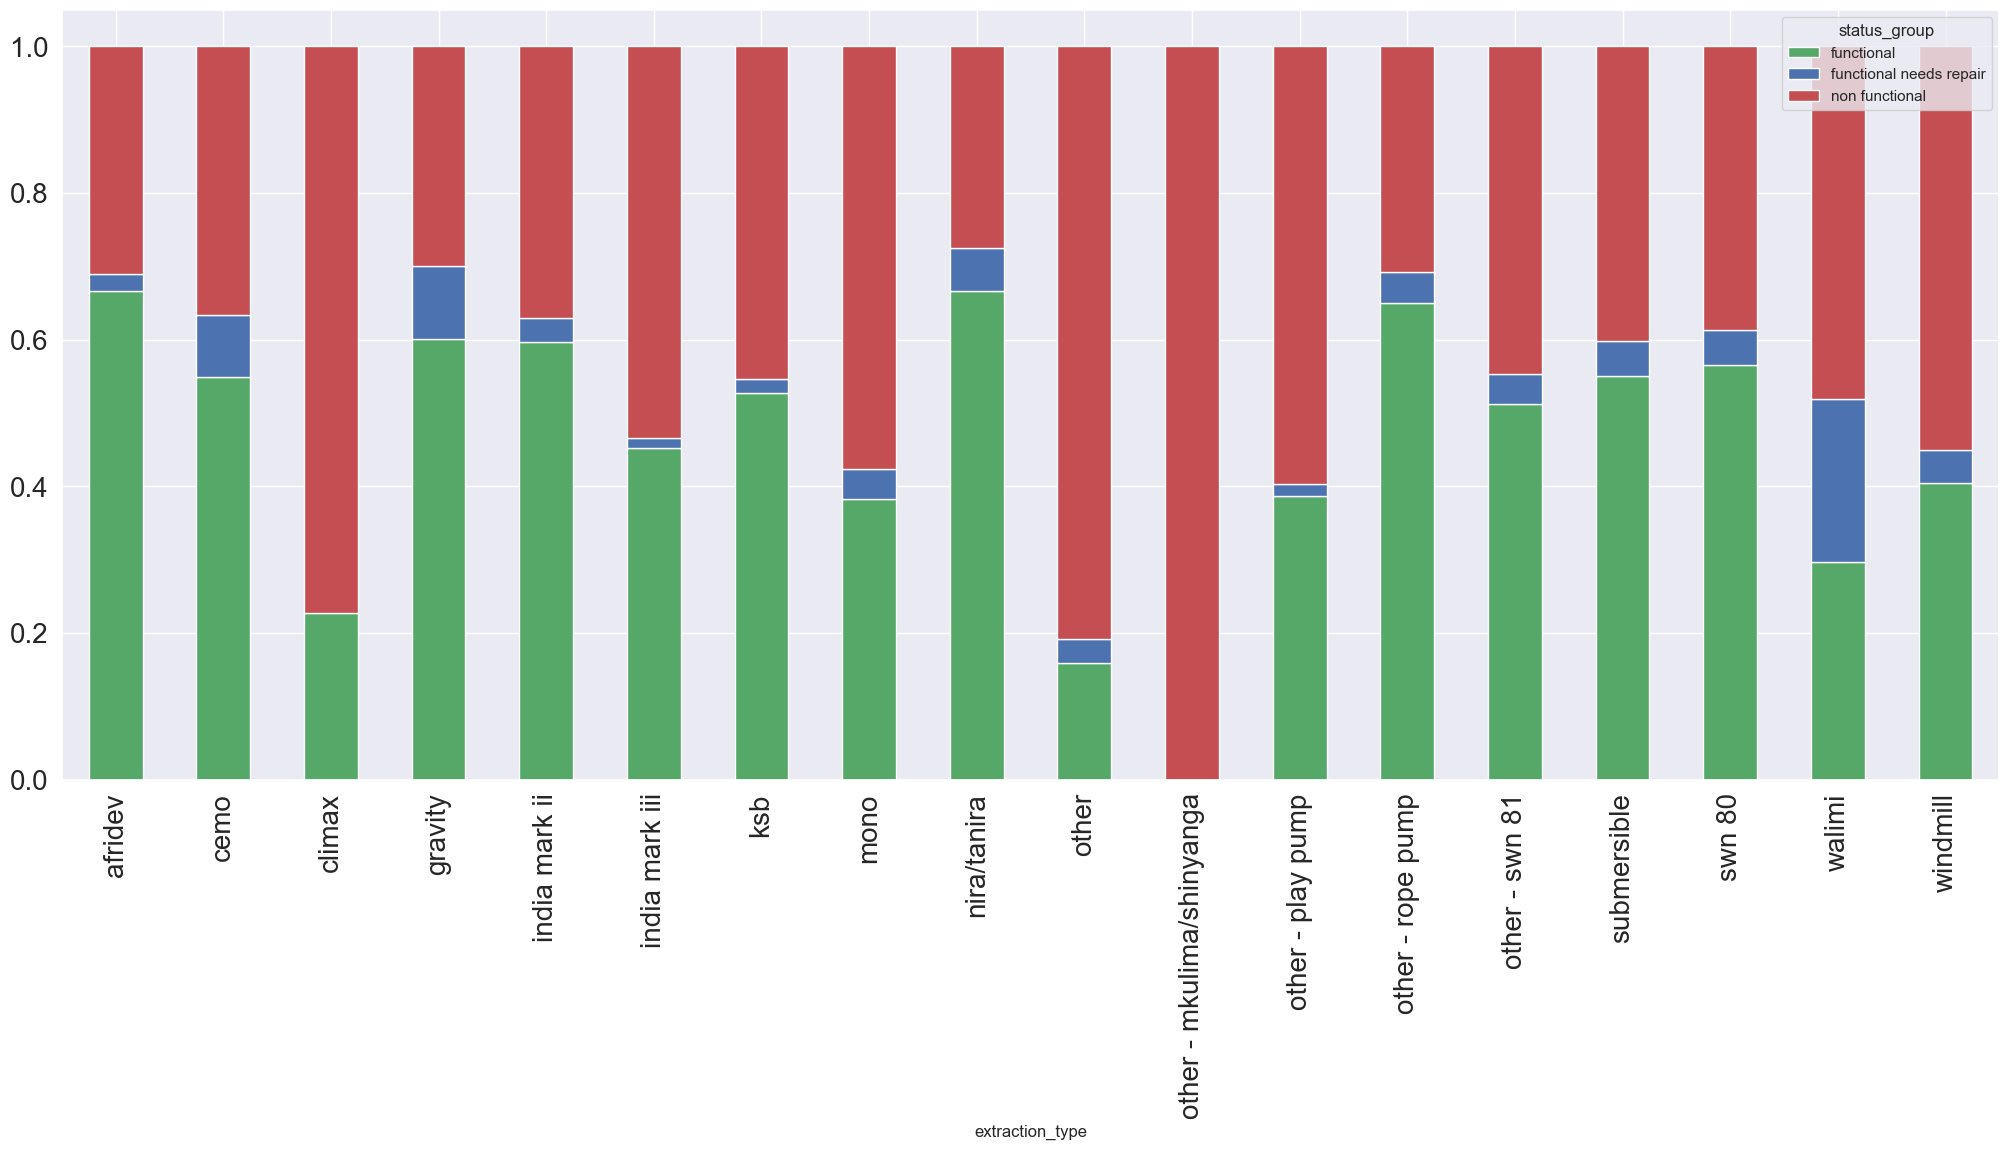

In [573]:
table=pd.crosstab(df.extraction_type, df.status_group)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(25,10), stacked=True,fontsize=20 , color=('g','b','r'))

plt.show()

##### other- mikulima/shinyanga should be noise?!!!!!

 ### extraction_type_class - functionality distrubution

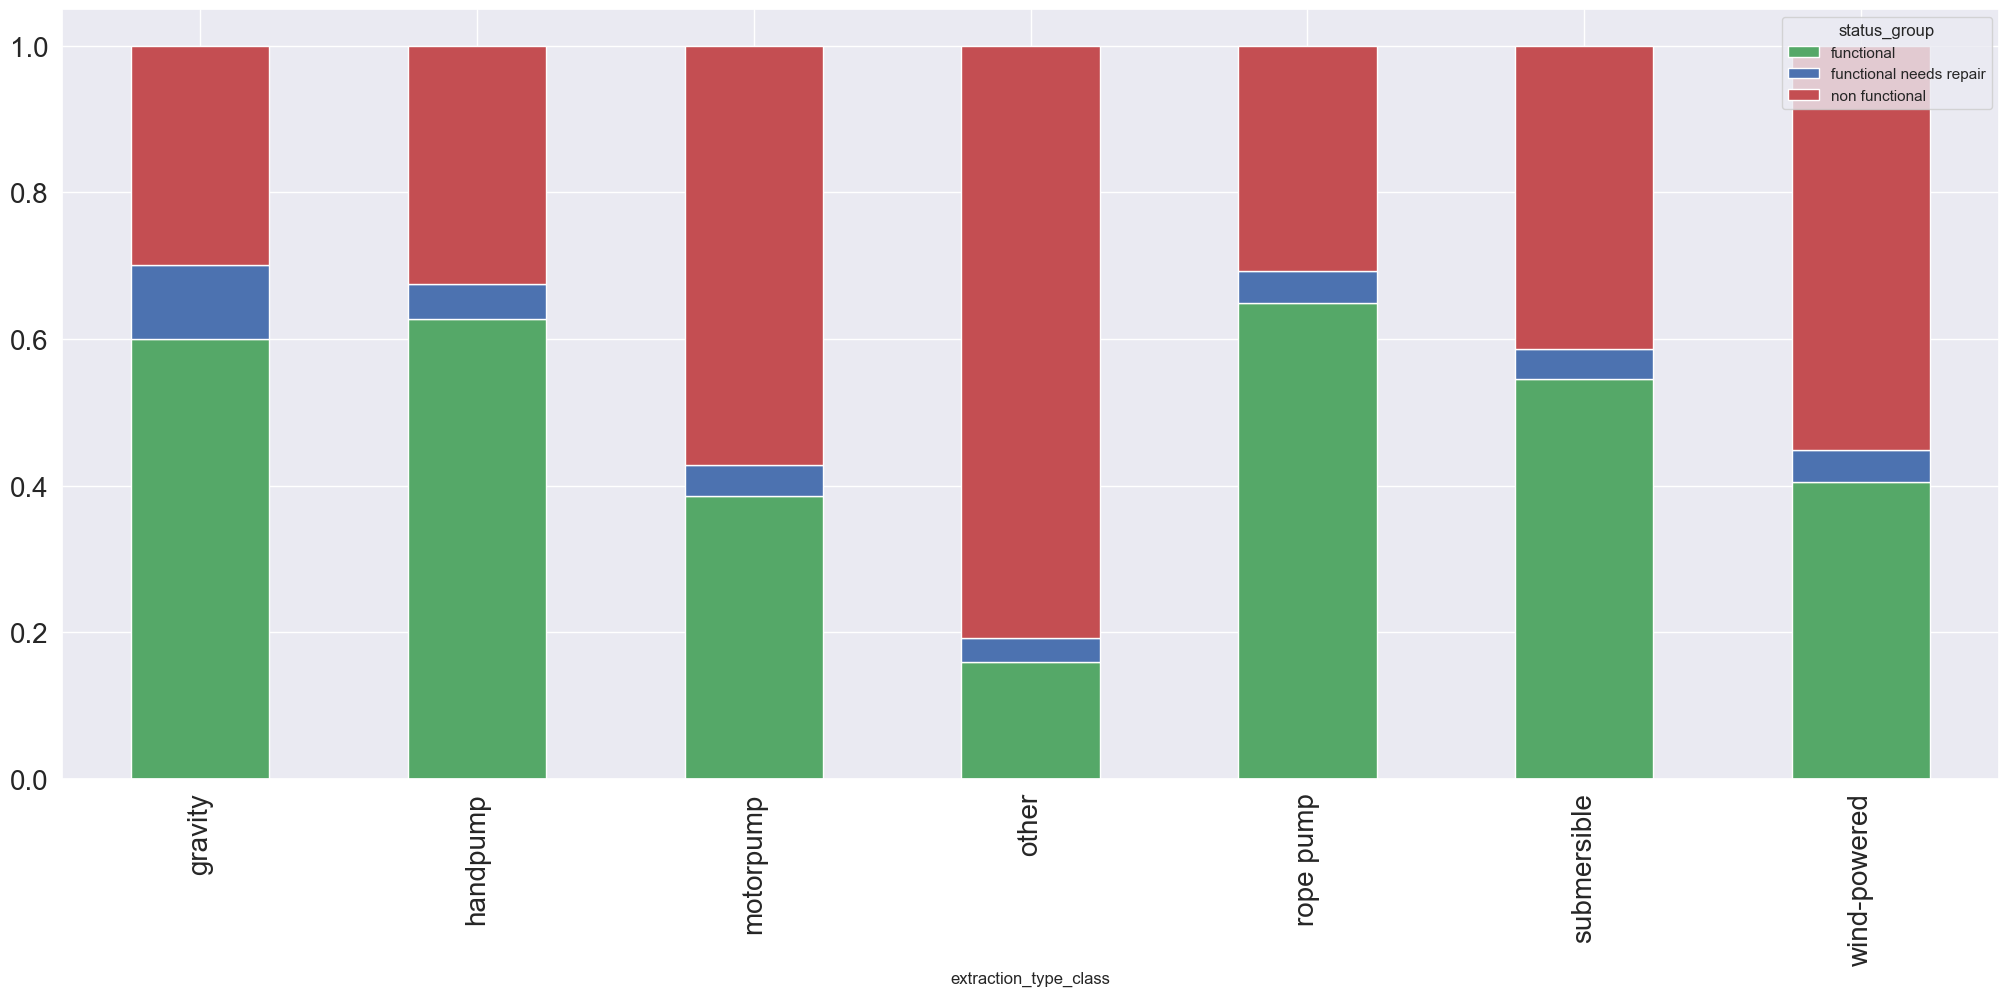

In [574]:
table=pd.crosstab(df.extraction_type_class, df.status_group)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(25,10), stacked=True,fontsize=20 , color=('g','b','r'))

plt.show()

### management_group - functionality distrubution

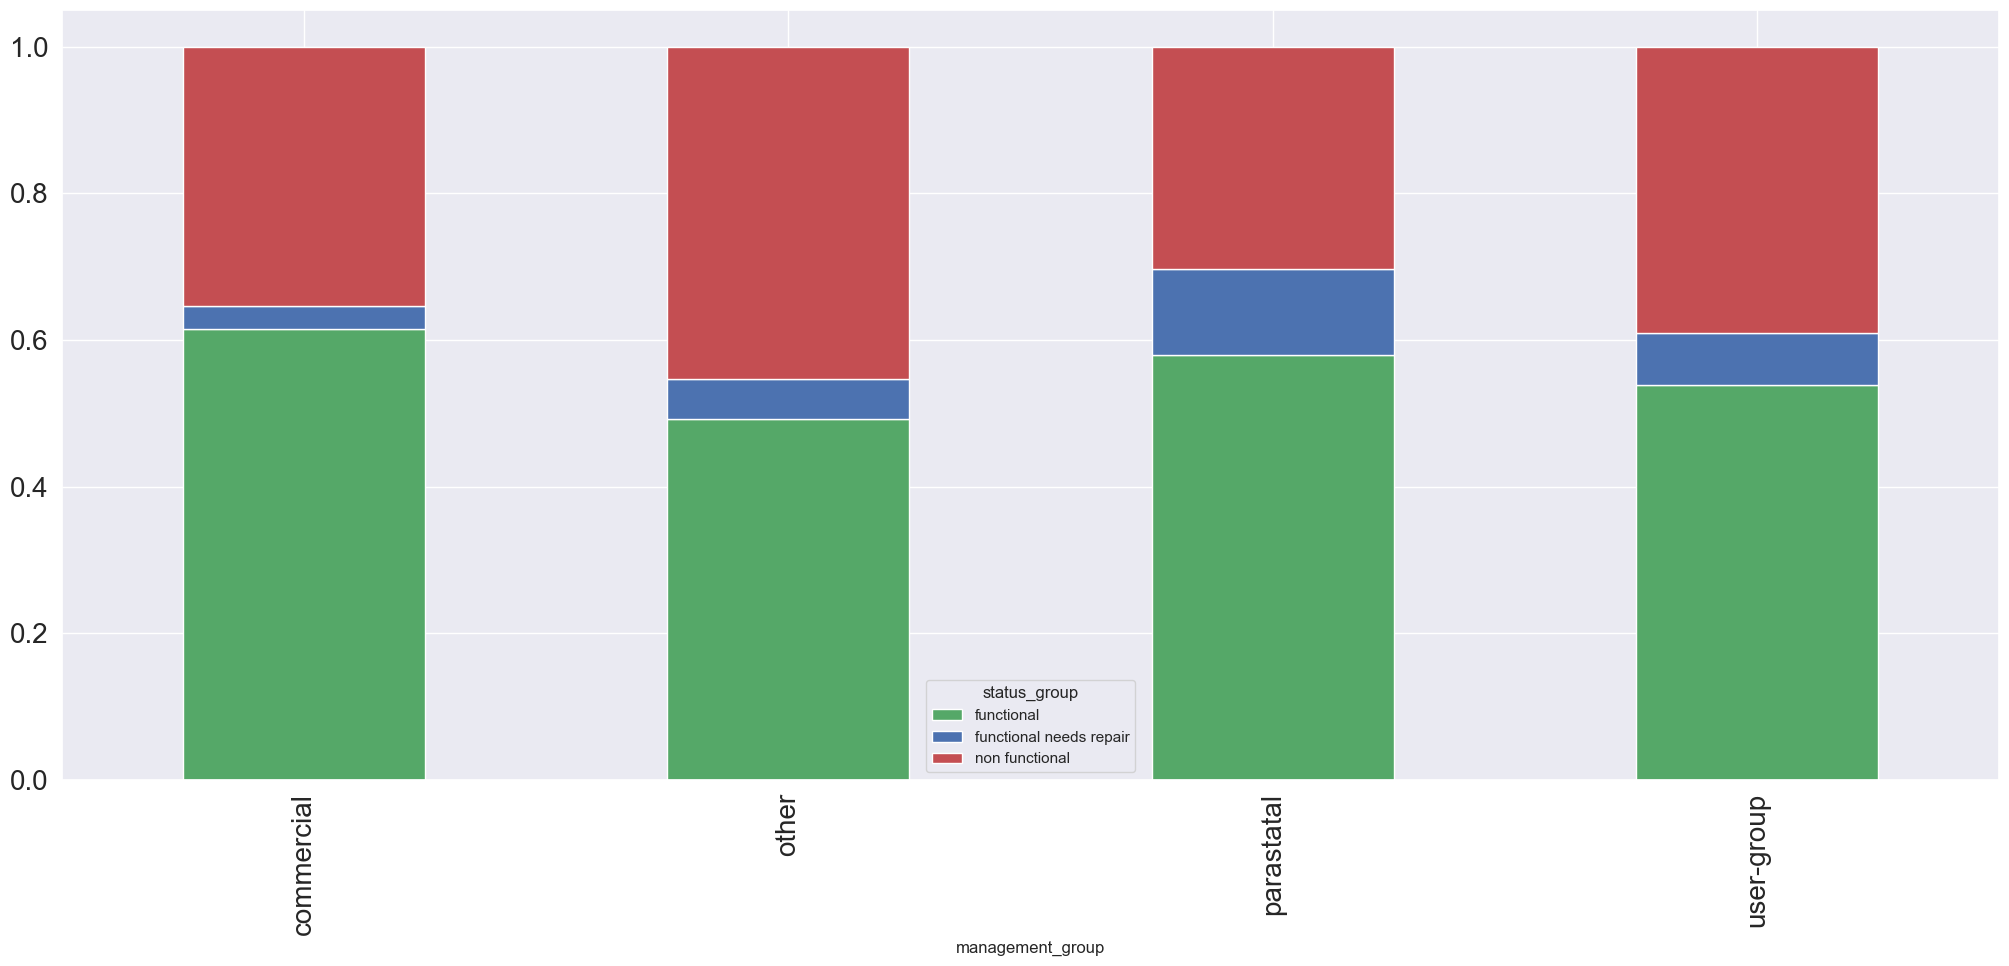

In [575]:
table=pd.crosstab(df.management_group, df.status_group)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(25,10), stacked=True,fontsize=20 , color=('g','b','r'))

plt.show()

### payment_type- functionality distrubution

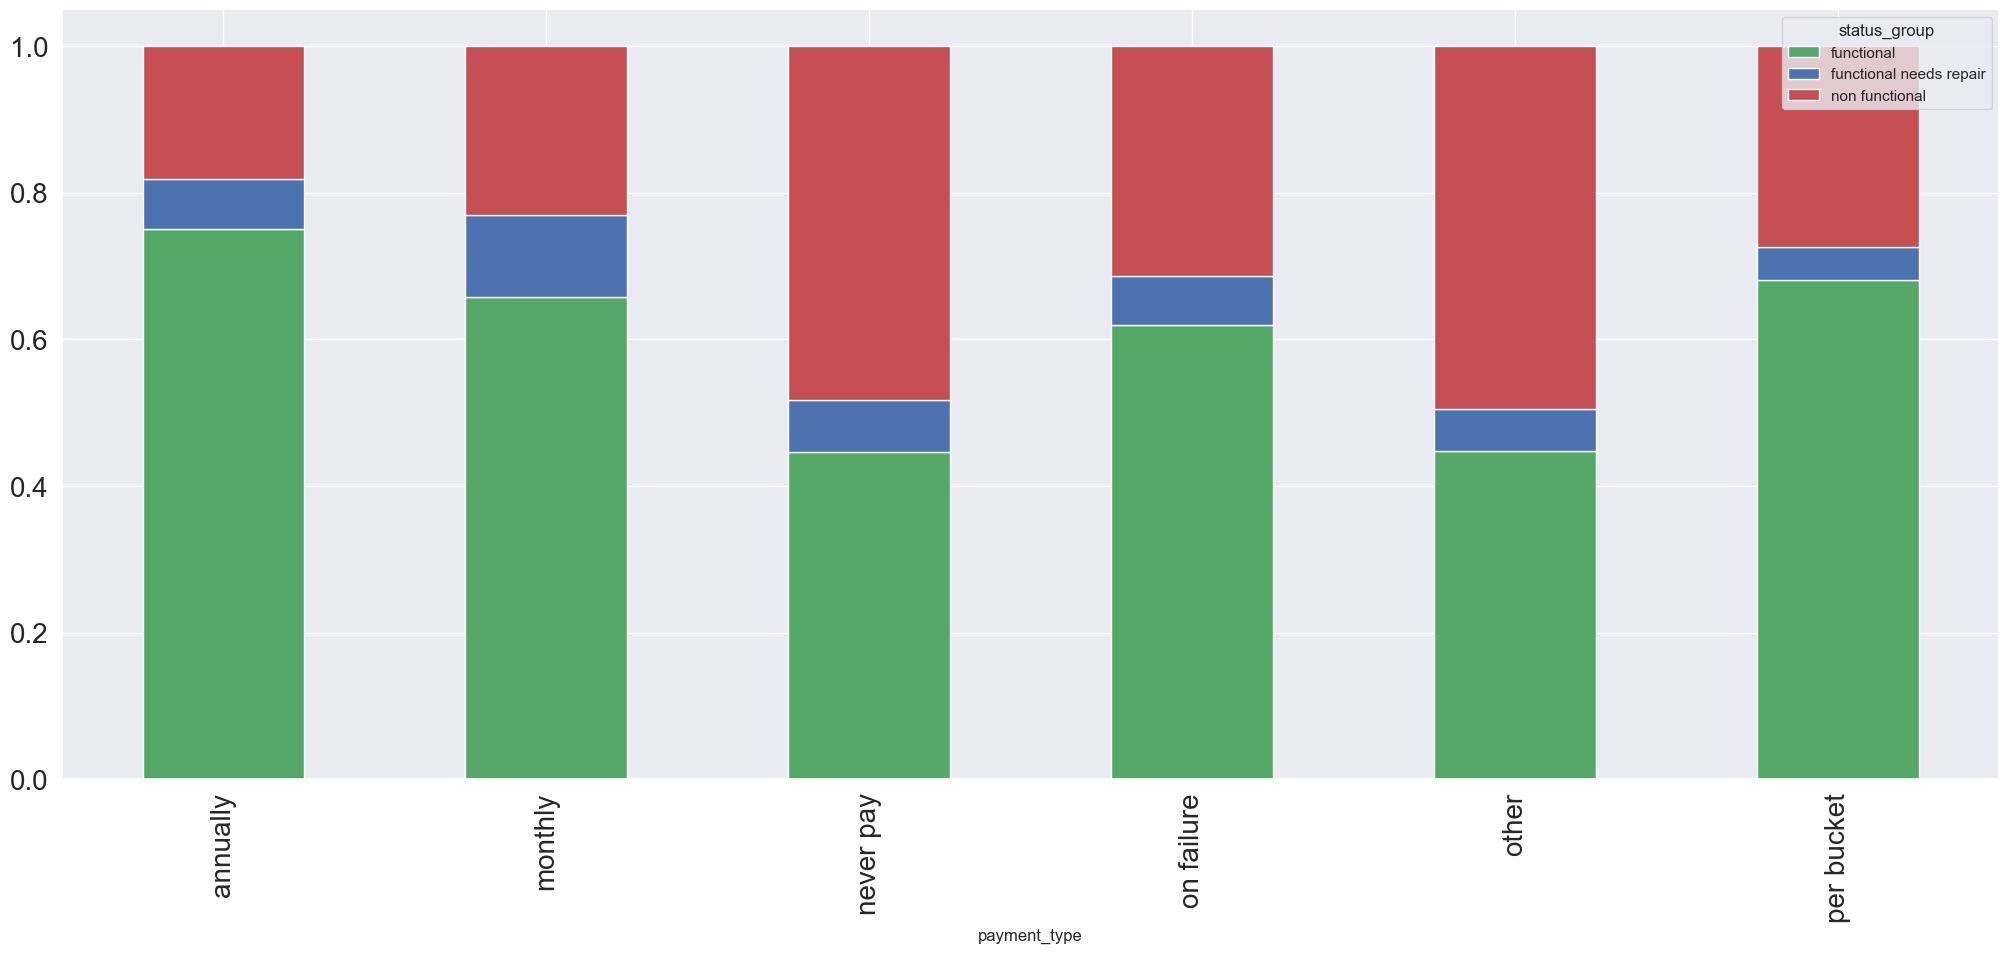

In [576]:
table=pd.crosstab(df.payment_type, df.status_group)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(25,10), stacked=True, fontsize=20 , color=('g','b','r'))

plt.show()

### water_quality - functionality distrubution 

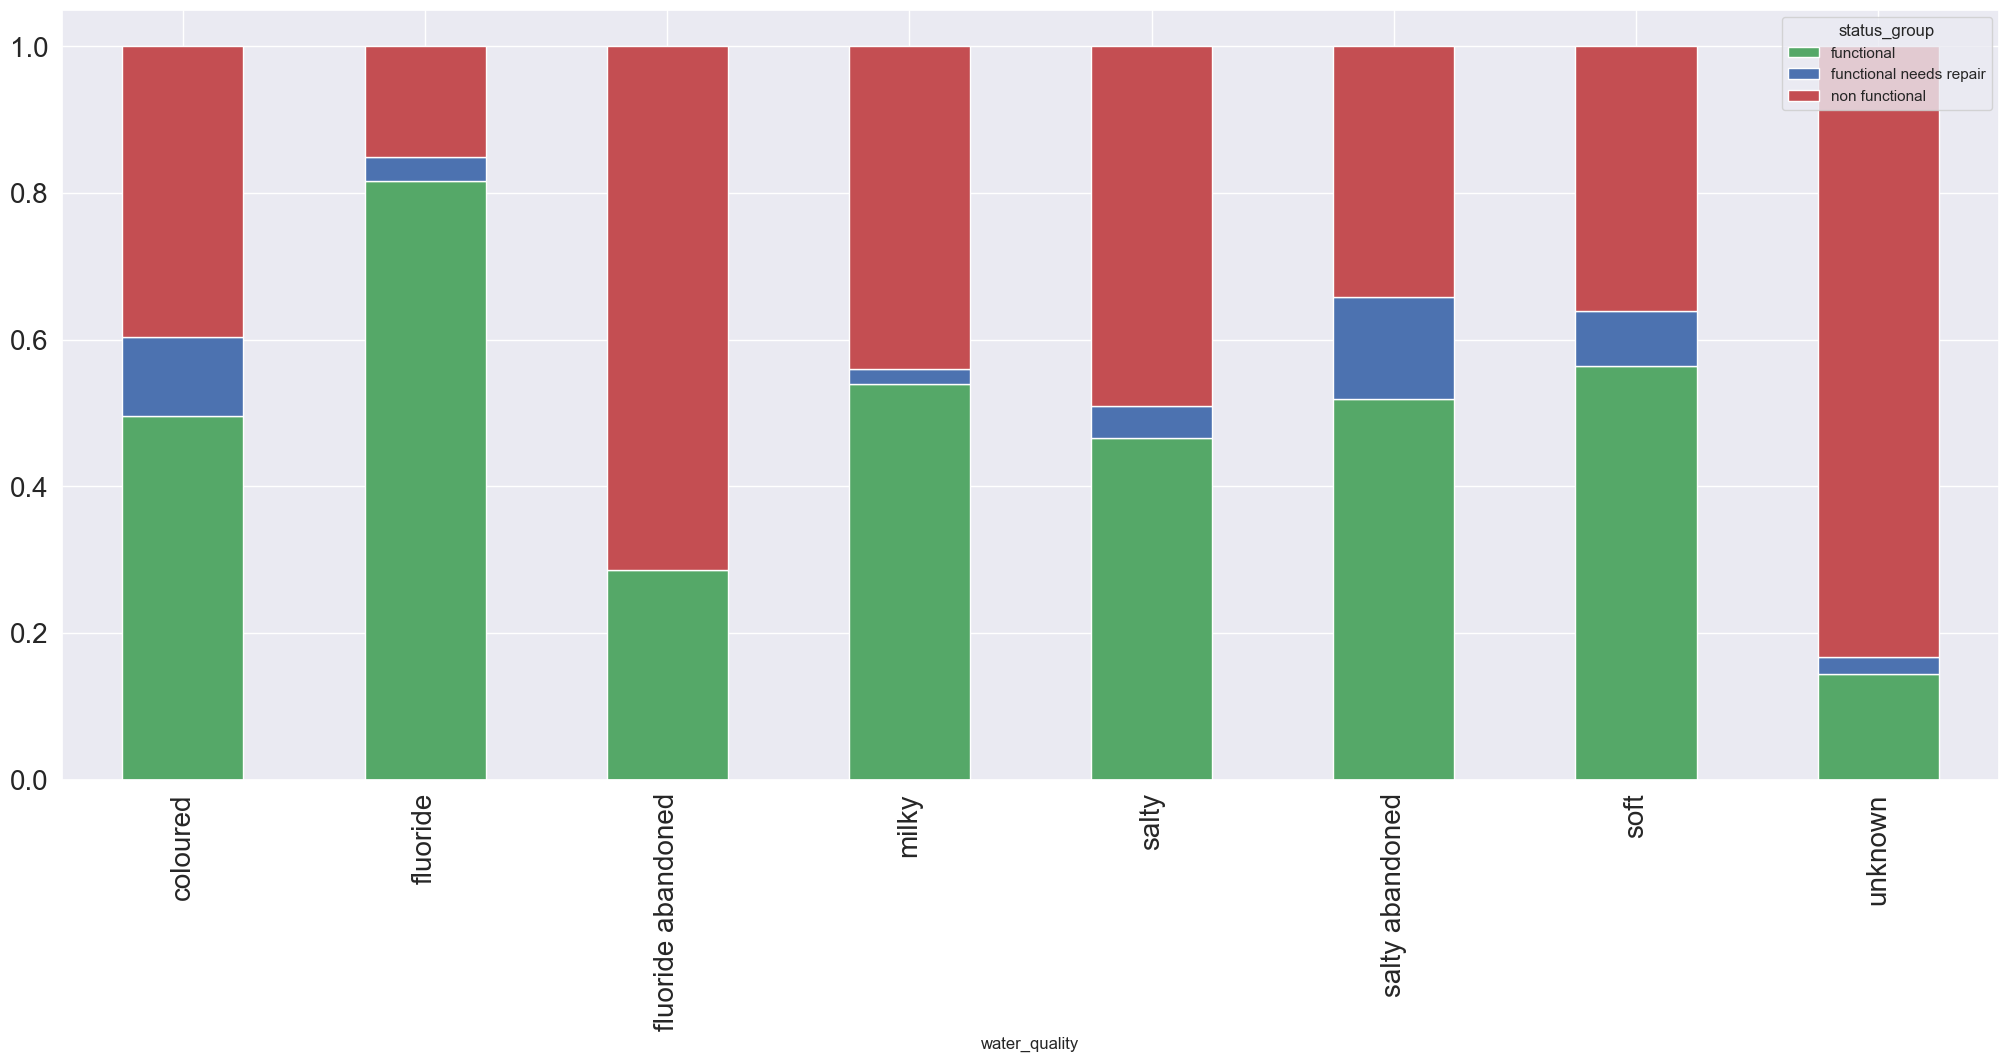

In [577]:
table=pd.crosstab(df.water_quality, df.status_group)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(25,10), stacked=True,fontsize=20 , color=('g','b','r'))

plt.show()

### quantity - functionality distrubution

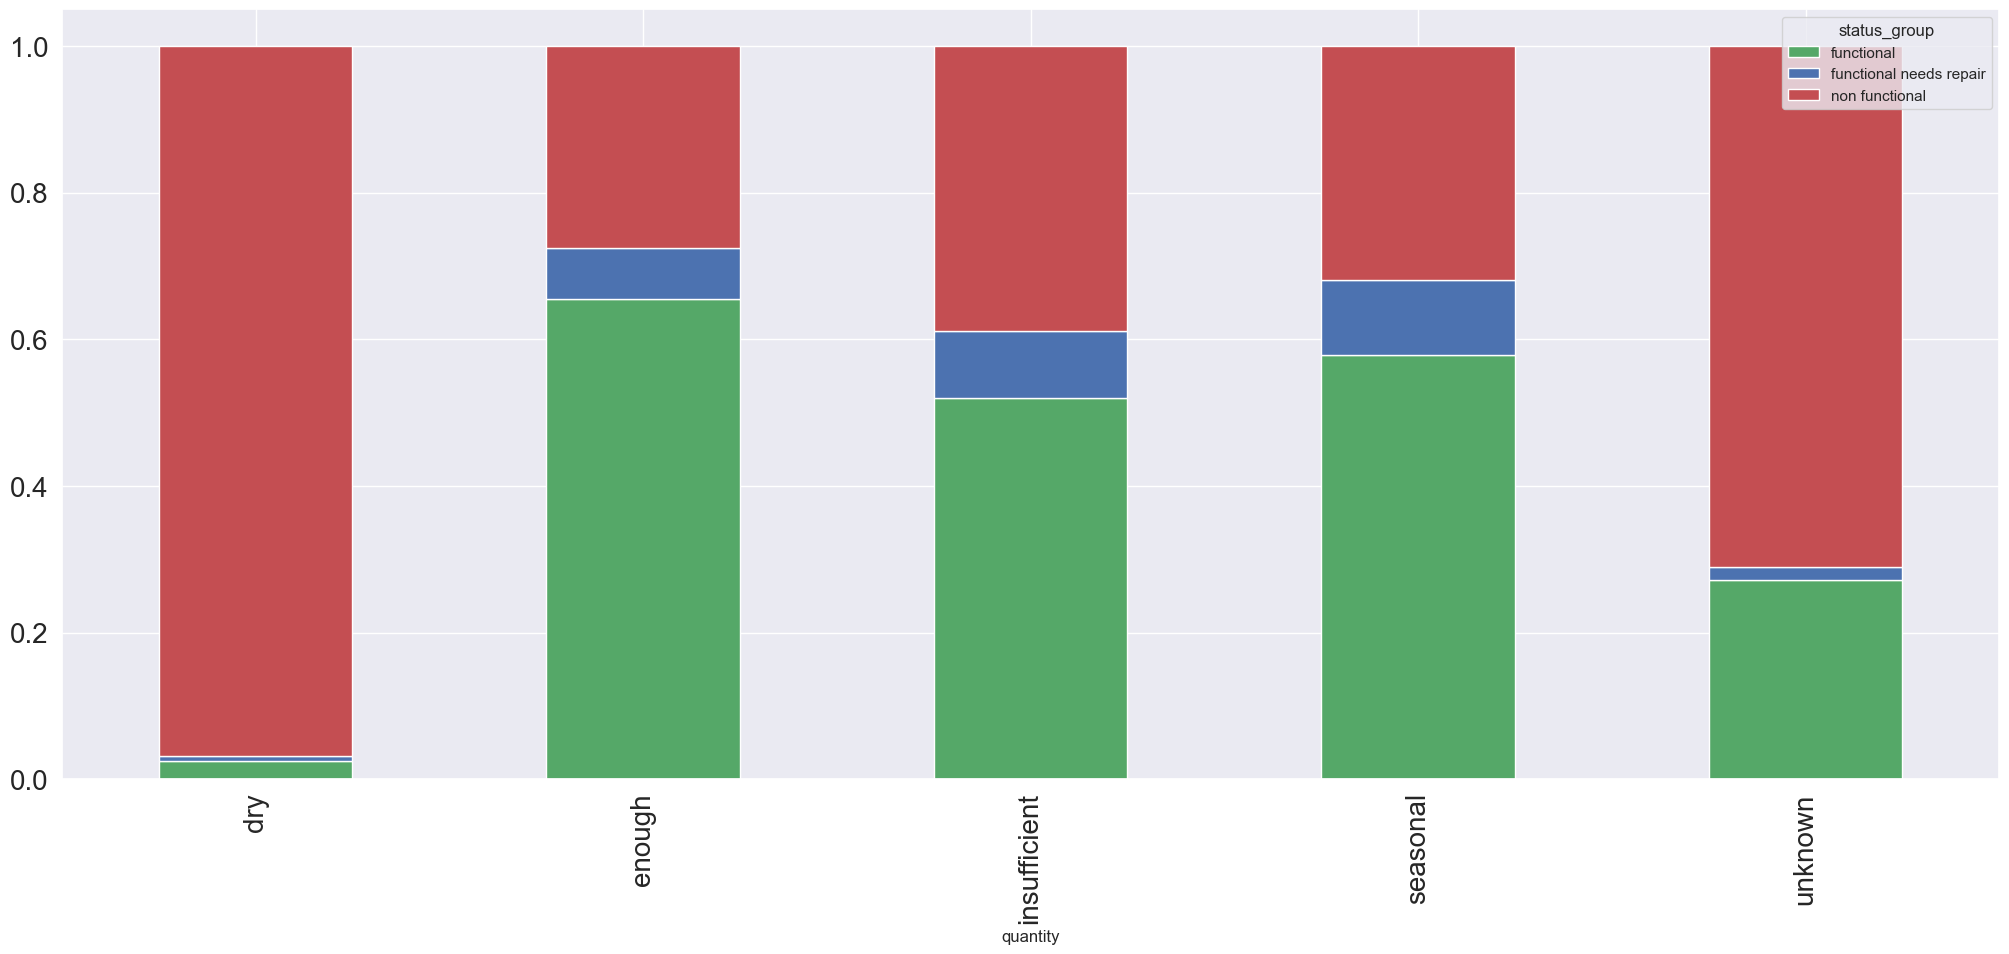

In [578]:
table=pd.crosstab(df.quantity, df.status_group)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(25,10), stacked=True,fontsize=20 , color=('g','b','r'))


plt.show()

### source- functionality distrubution

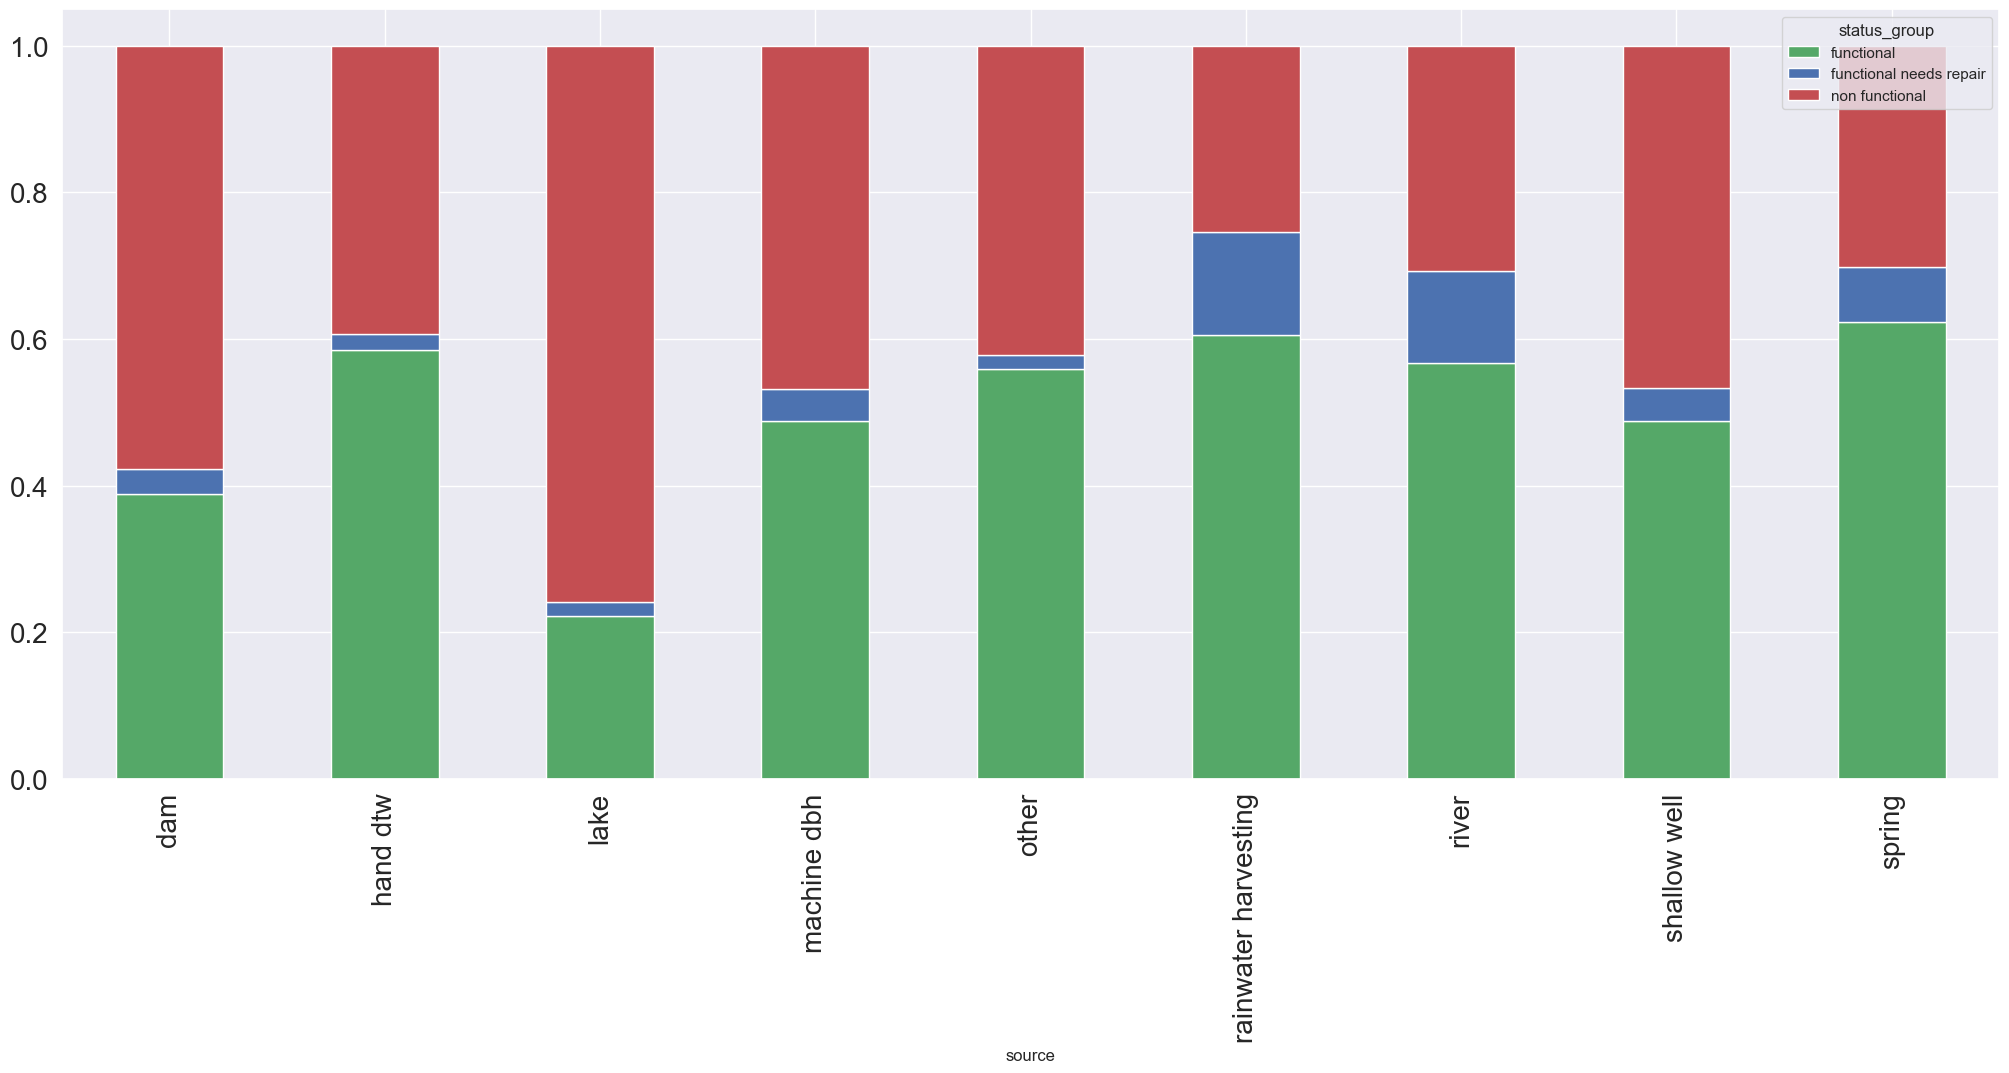

In [579]:
table=pd.crosstab(df.source, df.status_group)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(25,10), stacked=True,fontsize=20 , color=('g','b','r'))


plt.show()

### source_class - functionality distrubution

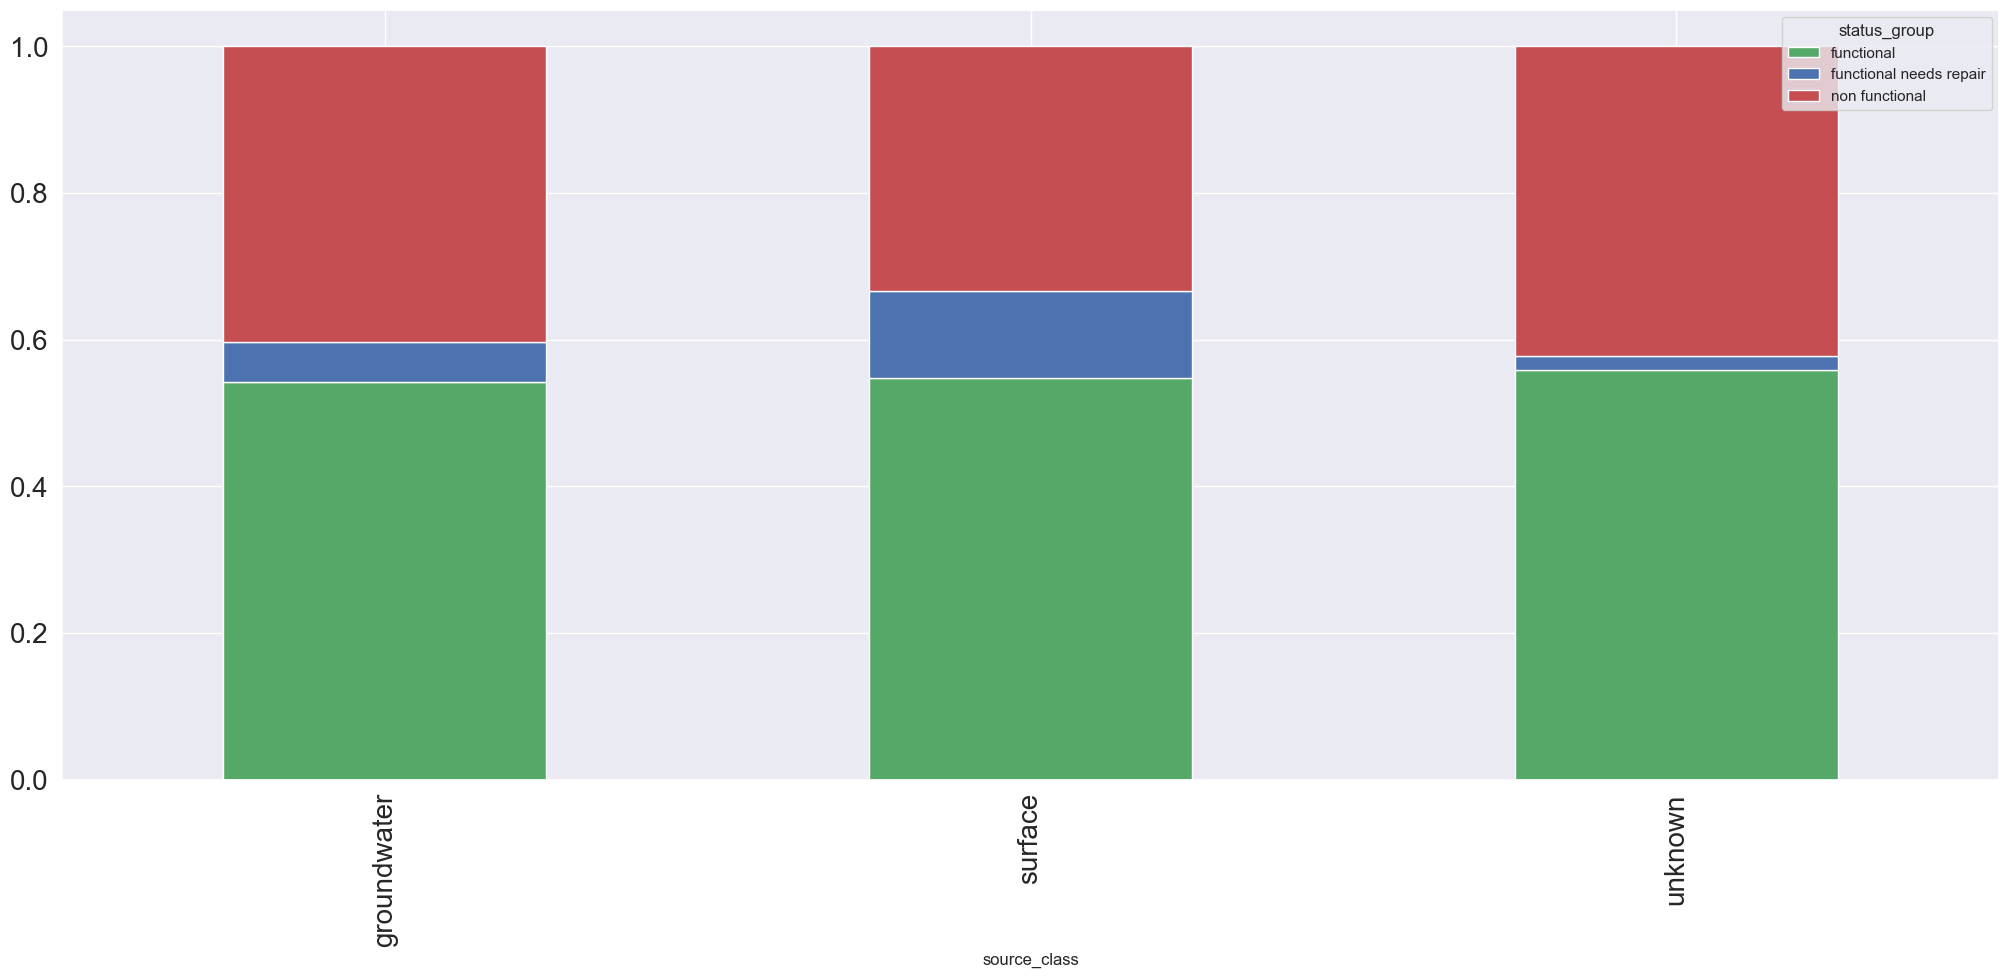

In [580]:
table=pd.crosstab(df.source_class, df.status_group)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(25,10), stacked=True,fontsize=20 , color=('g','b','r'))


plt.show()

### waterpoint_type - functionality distrubution

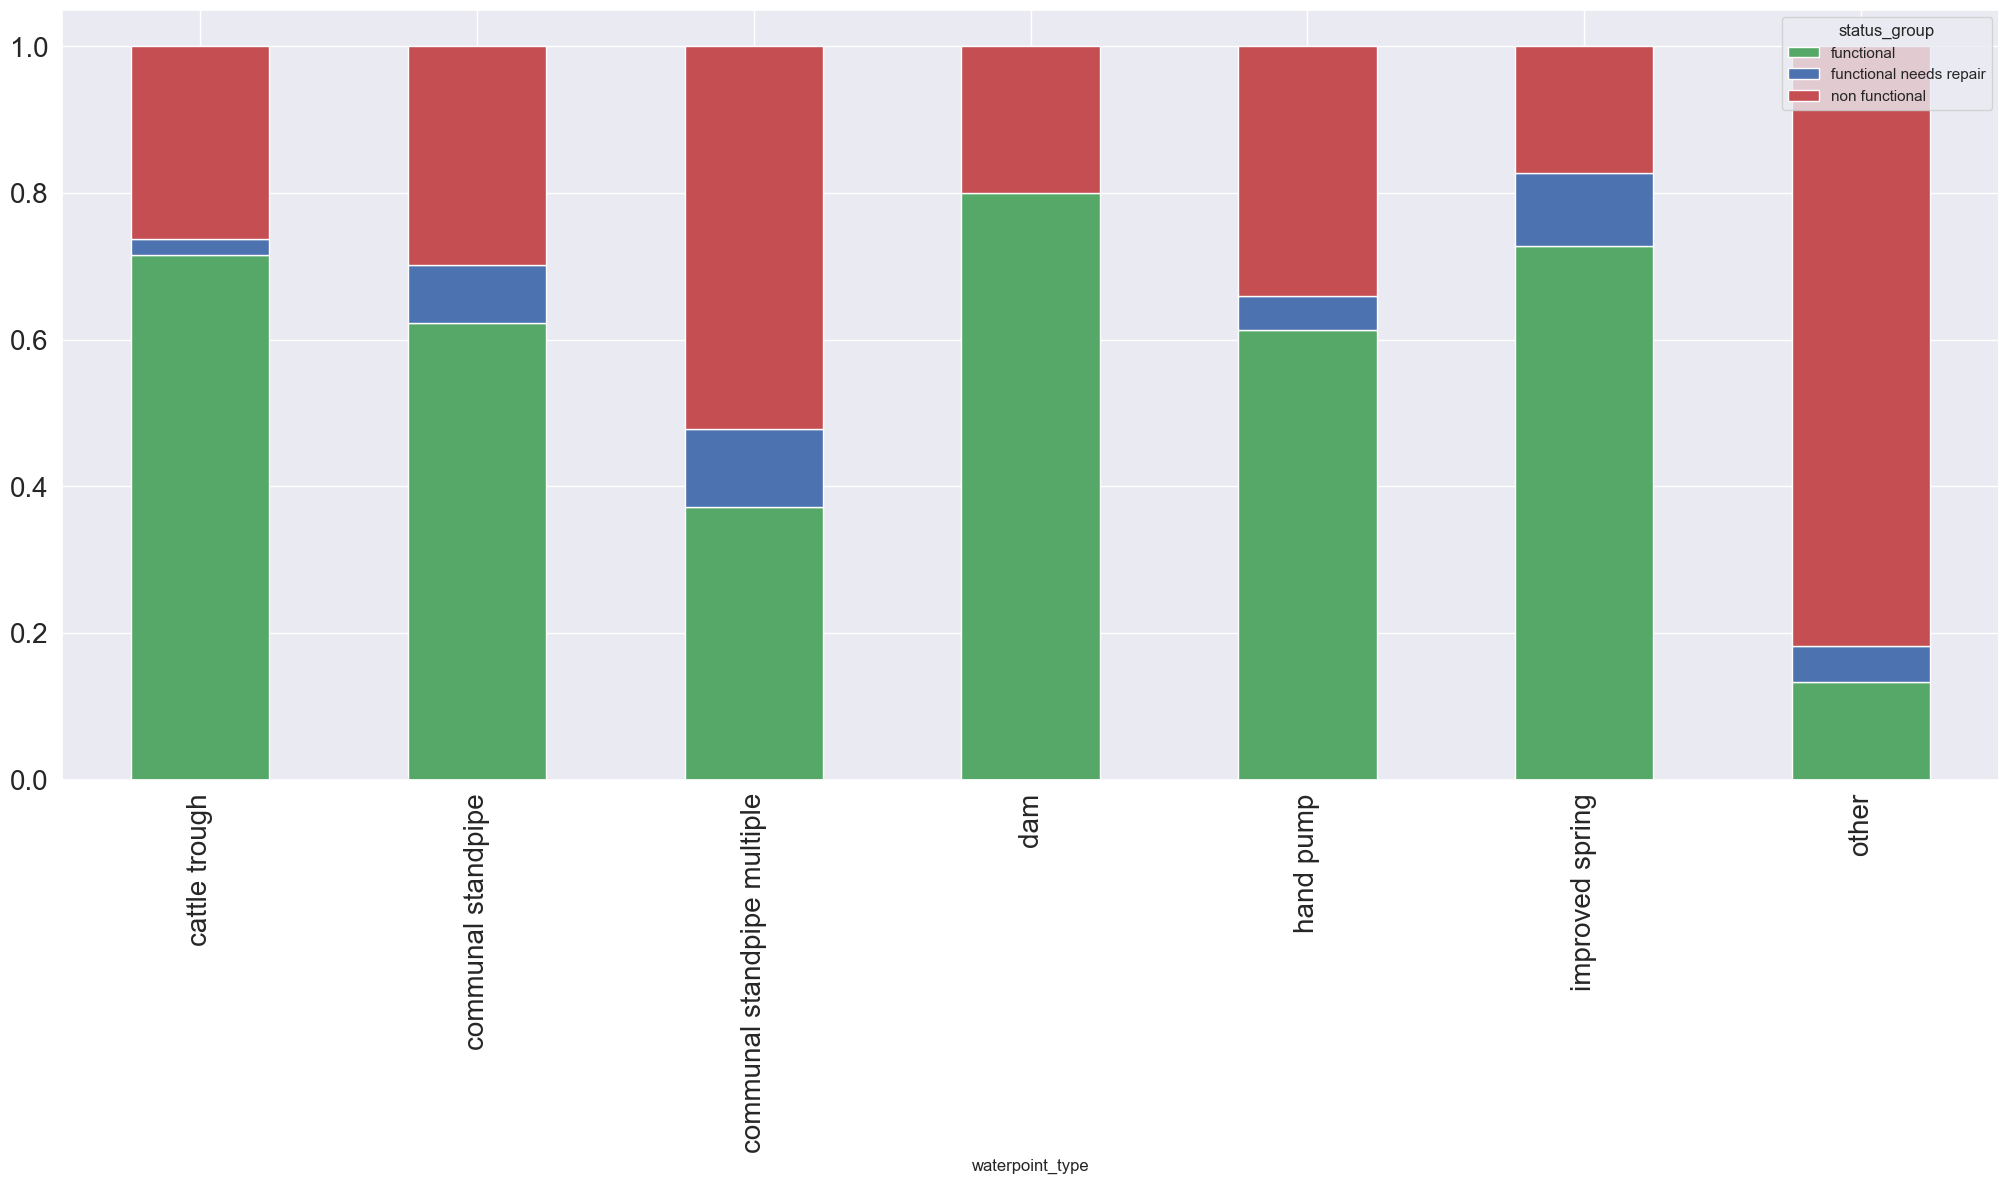

In [581]:
table=pd.crosstab(df.waterpoint_type, df.status_group)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(25,10), stacked=True,fontsize=20 , color=('g','b','r'))


plt.show()


### BOX PLOT (Is there any outlier in numeric values?)

<AxesSubplot: xlabel='status_group', ylabel='amount_tsh'>

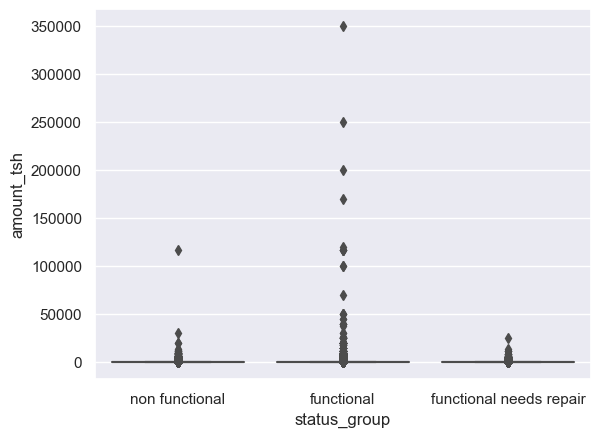

In [582]:
sns.boxplot(x=df["status_group"], y=df["amount_tsh"])

### It seems there is outliers but when we consider domanin they may not outliers. There is too much zero. They are affecting distrubution.

<AxesSubplot: xlabel='status_group', ylabel='population'>

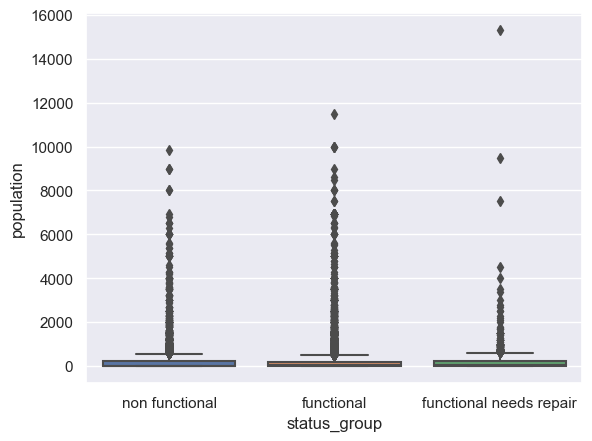

In [583]:
sns.boxplot(x=df["status_group"], y=df["population"])

### Same situation is here. The values 0 and 1 are affecting the distribution.

# PAIR PLOT

In [584]:

#cols = ['status_group', 'waterpoint_type', 'source_class', 'source', 'quantity',  'water_quality', 'payment_type','management_group','extraction_type_class','construction_year','permit','scheme_management','public_meeting','population','basin','latitude','longitude','gps_height','amount_tsh']
#sns.pairplot(df[cols], hue = 'status_group', diag_kind = 'kde', 
#plot_kws = {'alpha': 0.7, 's': 80, 'edgecolor': 'k'}, size = 4.5 )
#plt.show()

#Pairplot is not saying too much. Data needs preprocessing

In [585]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43593 entries, 0 to 44549
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             43593 non-null  float64
 1   gps_height             43593 non-null  int64  
 2   longitude              43593 non-null  float64
 3   latitude               43593 non-null  float64
 4   basin                  43593 non-null  object 
 5   population             43593 non-null  int64  
 6   public_meeting         41303 non-null  object 
 7   scheme_management      40704 non-null  object 
 8   permit                 41284 non-null  object 
 9   construction_year      43593 non-null  int64  
 10  extraction_type        43593 non-null  object 
 11  extraction_type_class  43593 non-null  object 
 12  management_group       43593 non-null  object 
 13  payment_type           43593 non-null  object 
 14  water_quality          43593 non-null  object 
 15  qu

##### Construcrion year seems important.

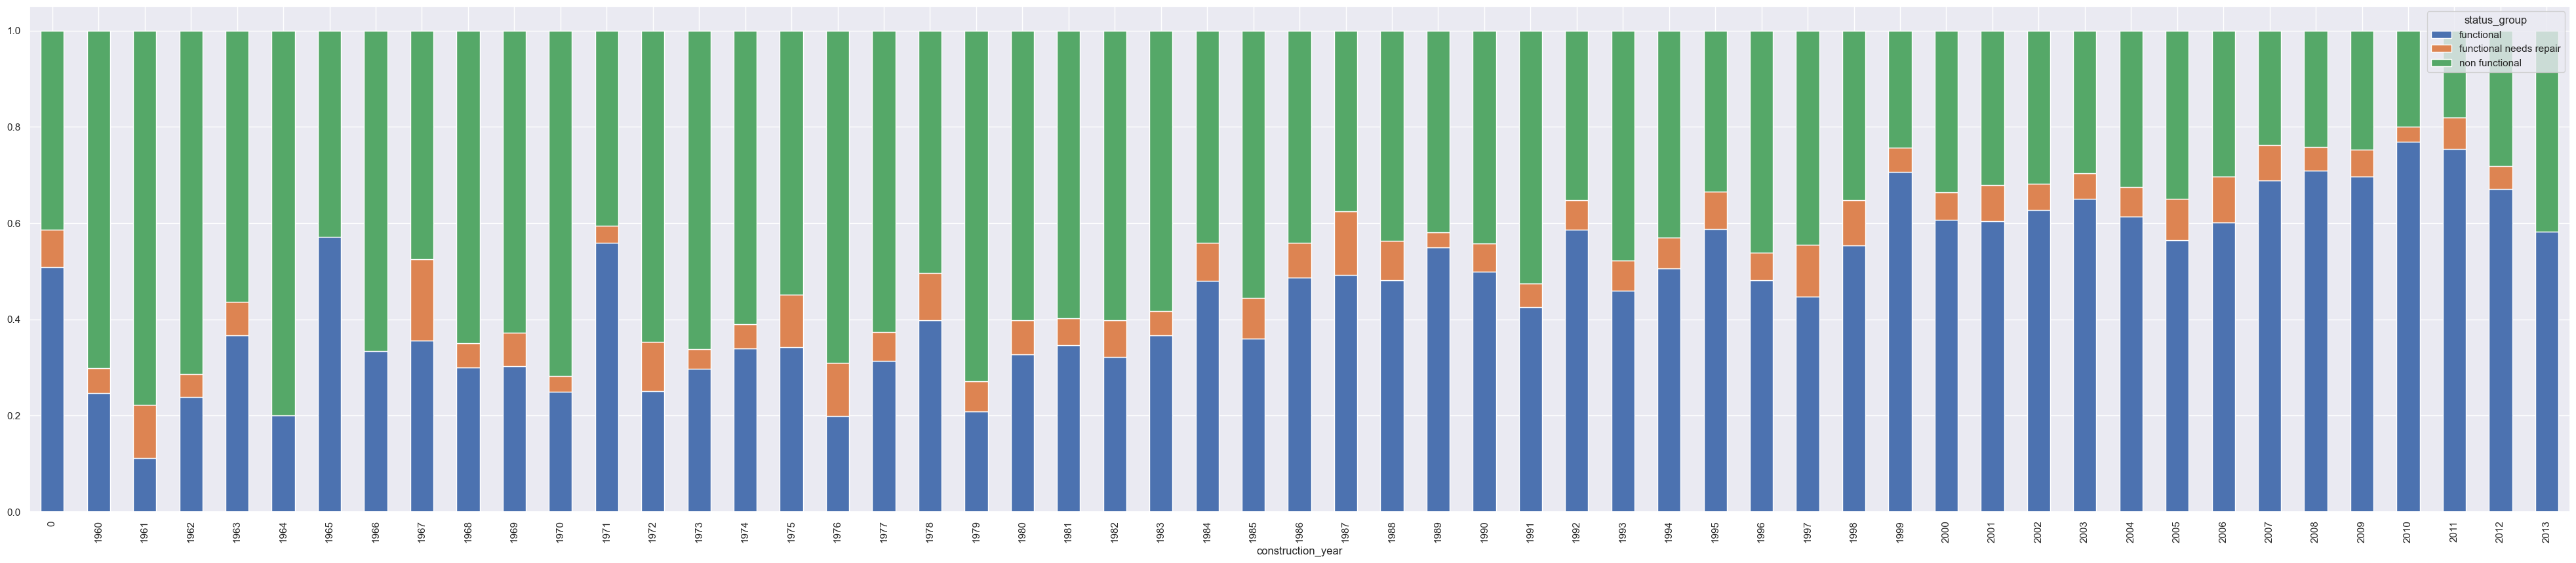

In [586]:
table=pd.crosstab(df.construction_year, df.status_group)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(50,10), stacked=True)
plt.xlabel('construction_year')
plt.show()

In [587]:
#We have 0 s which does not make sense
df["construction_year"].unique()

array([2002,    0, 2009, 1985, 2006, 1974, 2003, 1989, 2005, 2011, 1983,
       2010, 1996, 1995, 2000, 1999, 1992, 1976, 1979, 1978, 2012, 2004,
       1997, 1988, 1990, 1980, 1981, 1977, 1984, 2007, 1994, 1987, 1972,
       1970, 1998, 1982, 2008, 1973, 1962, 1975, 2013, 1991, 1993, 2001,
       1964, 1967, 1969, 1971, 1960, 1968, 1986, 1965, 1961, 1963, 1966])

### Handling with Null Values and meaningless data

    While handling with null values and meaningless data we have a few options:
    1- We can slice data and train a model for fill the missing values or meaningles data
    2- For numerical values we can use mean, median or fill with 0 s
    3- For categorical values we can create a feature from missin values. For example unknown or fill with mod()
    4- If there is a lot of data is missing for example more than %50 we can prune the missing data
        Of course we do not want to data but sometimes pruning would be a better way for better model.

In [588]:
df.isnull().sum()

amount_tsh                  0
gps_height                  0
longitude                   0
latitude                    0
basin                       0
population                  0
public_meeting           2290
scheme_management        2889
permit                   2309
construction_year           0
extraction_type             0
extraction_type_class       0
management_group            0
payment_type                0
water_quality               0
quantity                    0
source                      0
source_class                0
waterpoint_type             0
status_group                0
dtype: int64

#### We've filled the missing values with 'VARIOUS'. 


In [589]:
###############################################################
df['public_meeting'].fillna(value='VARIOUS', inplace=True)


In [590]:
df['public_meeting'].value_counts().head()

True       37543
False       3760
VARIOUS     2290
Name: public_meeting, dtype: int64

In [591]:
df_orig['public_meeting'].unique()

array([True, False, nan], dtype=object)

In [592]:
# It seems 'None' is noise?
df['scheme_management'].value_counts()

VWC                 27216
WUG                  3334
Water authority      2327
WUA                  2200
Water Board          2099
Parastatal           1255
Private operator      788
Company               787
Other                 566
SWC                    81
Trust                  50
None                    1
Name: scheme_management, dtype: int64

In [593]:
list(df['scheme_management'].unique())

['VWC',
 'WUG',
 nan,
 'Company',
 'Parastatal',
 'Water authority',
 'Water Board',
 'WUA',
 'Private operator',
 'Trust',
 'Other',
 'SWC',
 'None']

In [594]:
##################################################################
df['scheme_management'].fillna(value='VARIOUS', inplace=True)


In [595]:
df['scheme_management'].value_counts()

VWC                 27216
WUG                  3334
VARIOUS              2889
Water authority      2327
WUA                  2200
Water Board          2099
Parastatal           1255
Private operator      788
Company               787
Other                 566
SWC                    81
Trust                  50
None                    1
Name: scheme_management, dtype: int64

In [596]:
df['permit'].value_counts()

True     28751
False    12533
Name: permit, dtype: int64

In [597]:
list(df['permit'].unique())

[True, False, nan]

In [598]:
###################################################
df['permit'].fillna(value='VARIOUS', inplace=True)


In [599]:
df['permit'].value_counts()

True       28751
False      12533
VARIOUS     2309
Name: permit, dtype: int64

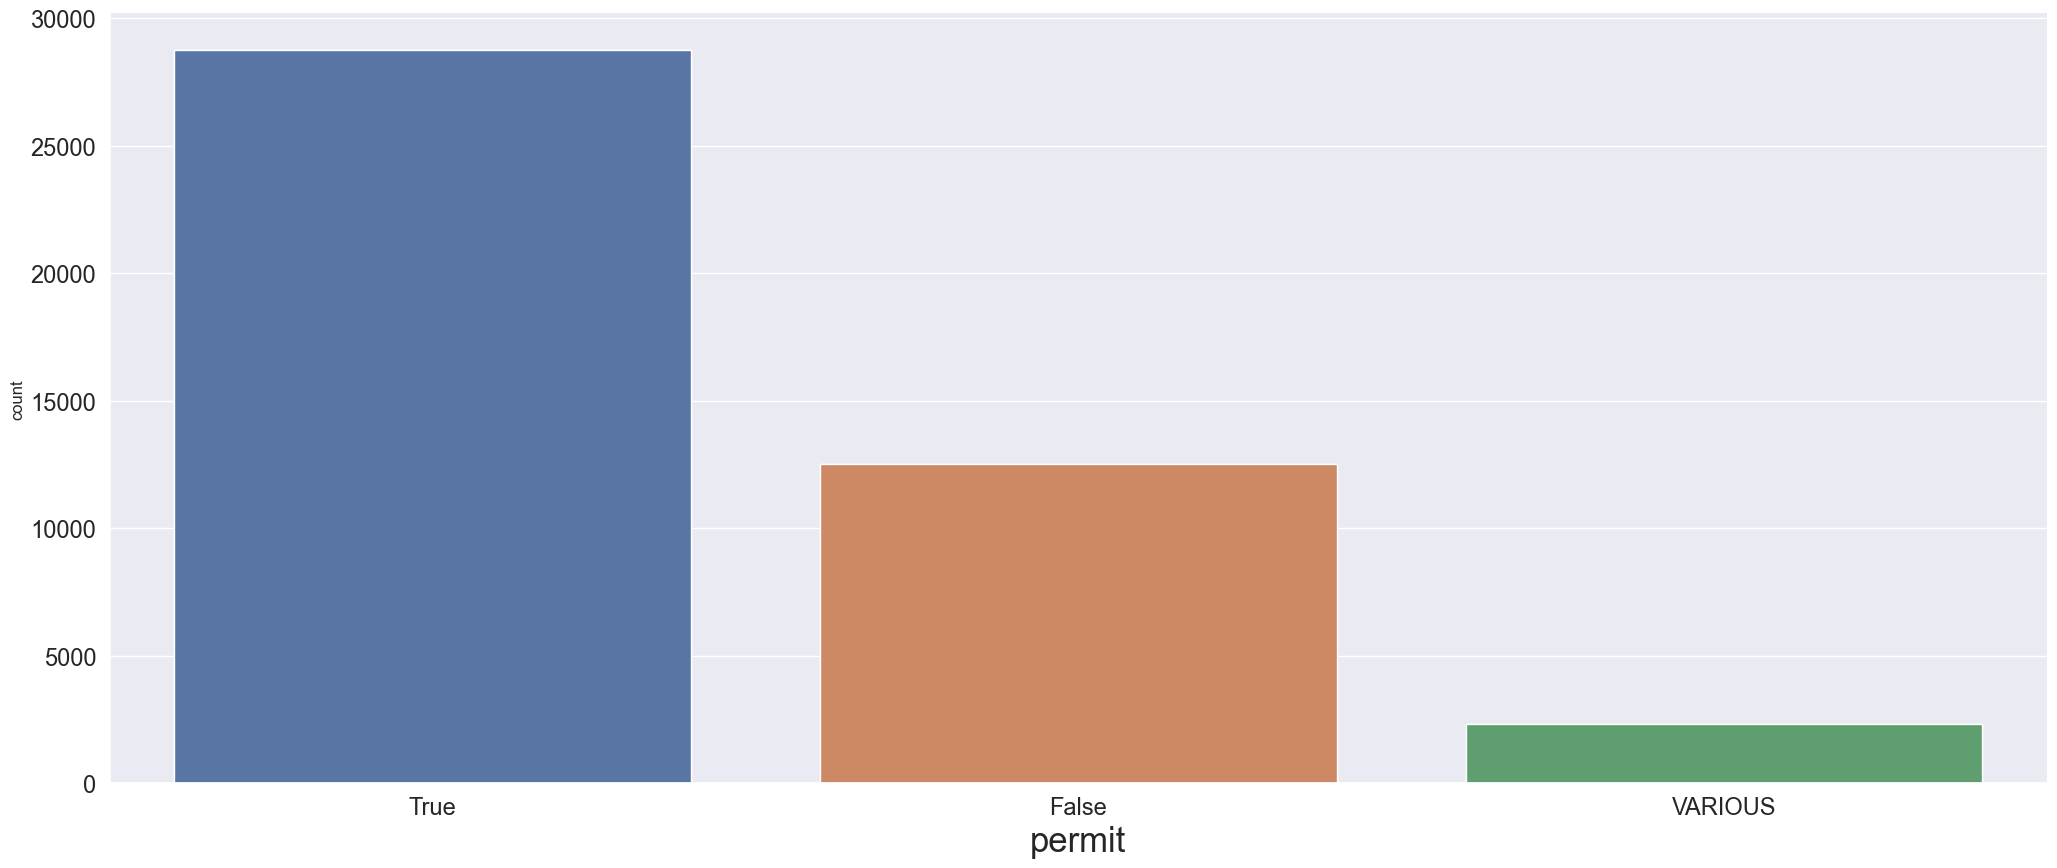

In [600]:
plt.figure(figsize=(25,10))
order = df.permit.value_counts().index
sns.countplot(x='permit', data=df, order=order).tick_params(labelsize=17)
sns.countplot(x='permit', data=df, order=order).set_xlabel('permit',fontsize=25)
sns.despine()

In [601]:
list(df['scheme_management'].unique())

['VWC',
 'WUG',
 'VARIOUS',
 'Company',
 'Parastatal',
 'Water authority',
 'Water Board',
 'WUA',
 'Private operator',
 'Trust',
 'Other',
 'SWC',
 'None']

In [602]:
################################################################################
df['scheme_management'] = df['scheme_management'].replace('None', 'Other')


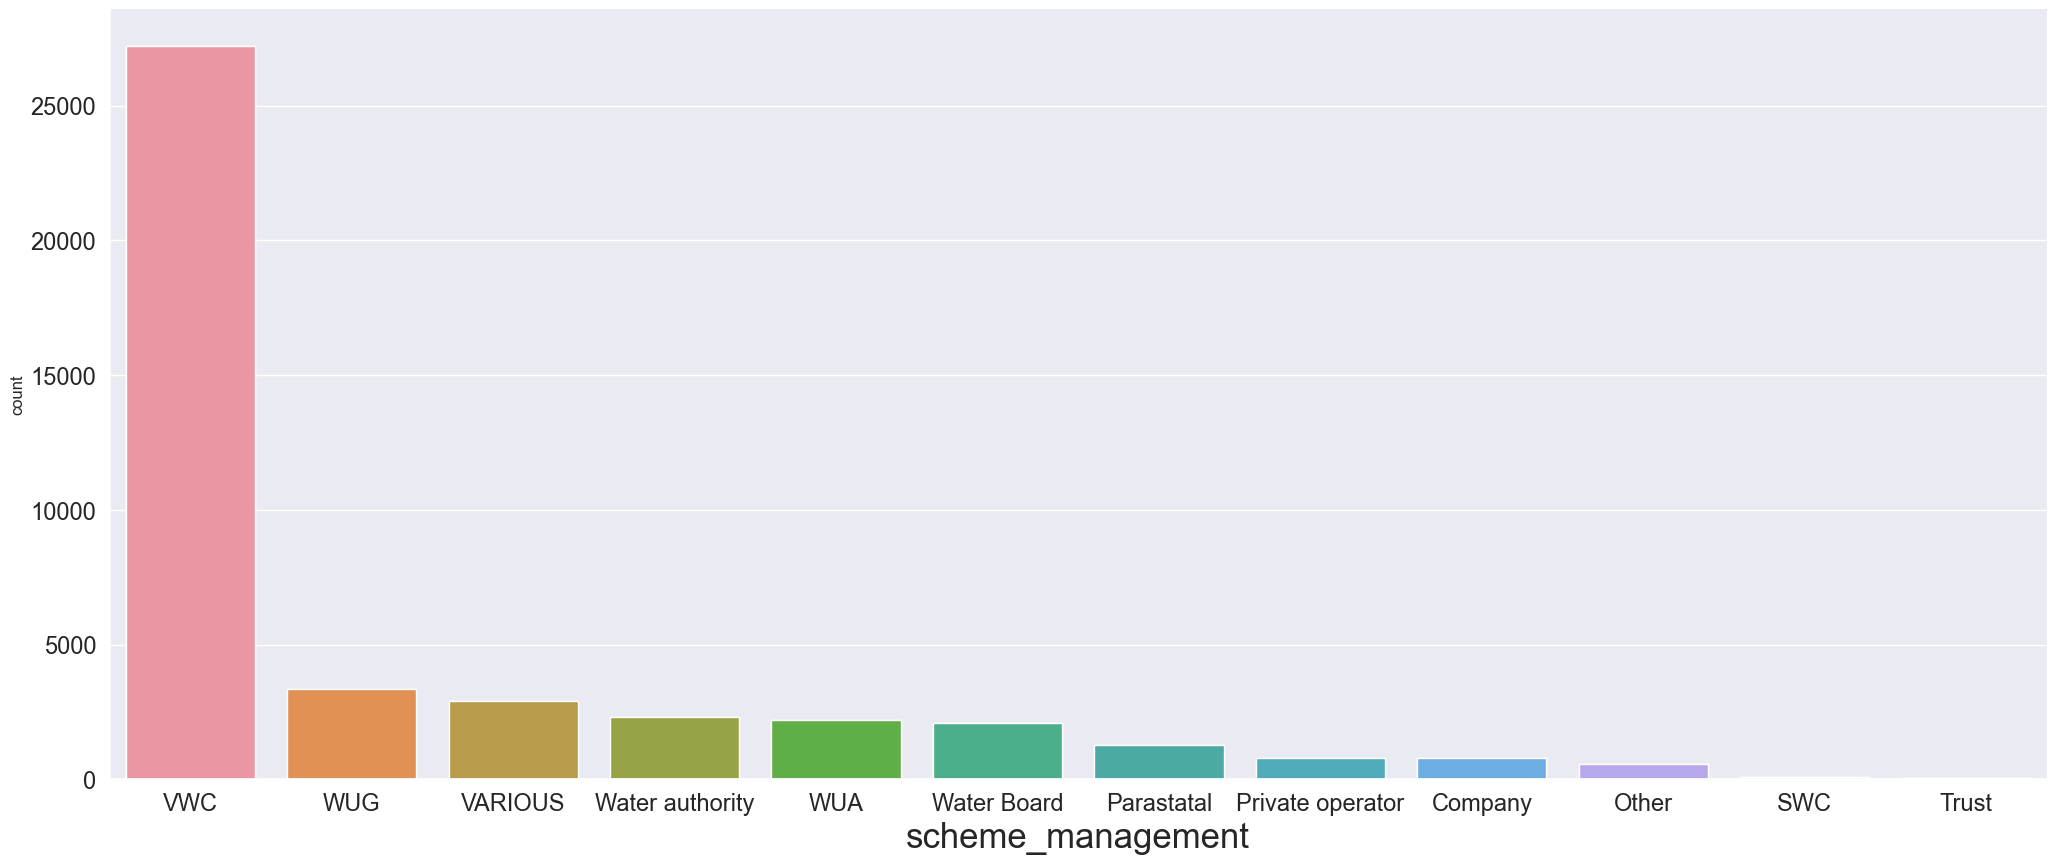

In [603]:
plt.figure(figsize=(25,10))
order = df.scheme_management.value_counts().index
sns.countplot(x='scheme_management', data=df, order=order).tick_params(labelsize=17)
sns.countplot(x='scheme_management', data=df, order=order).set_xlabel('scheme_management',fontsize=25)
sns.despine()

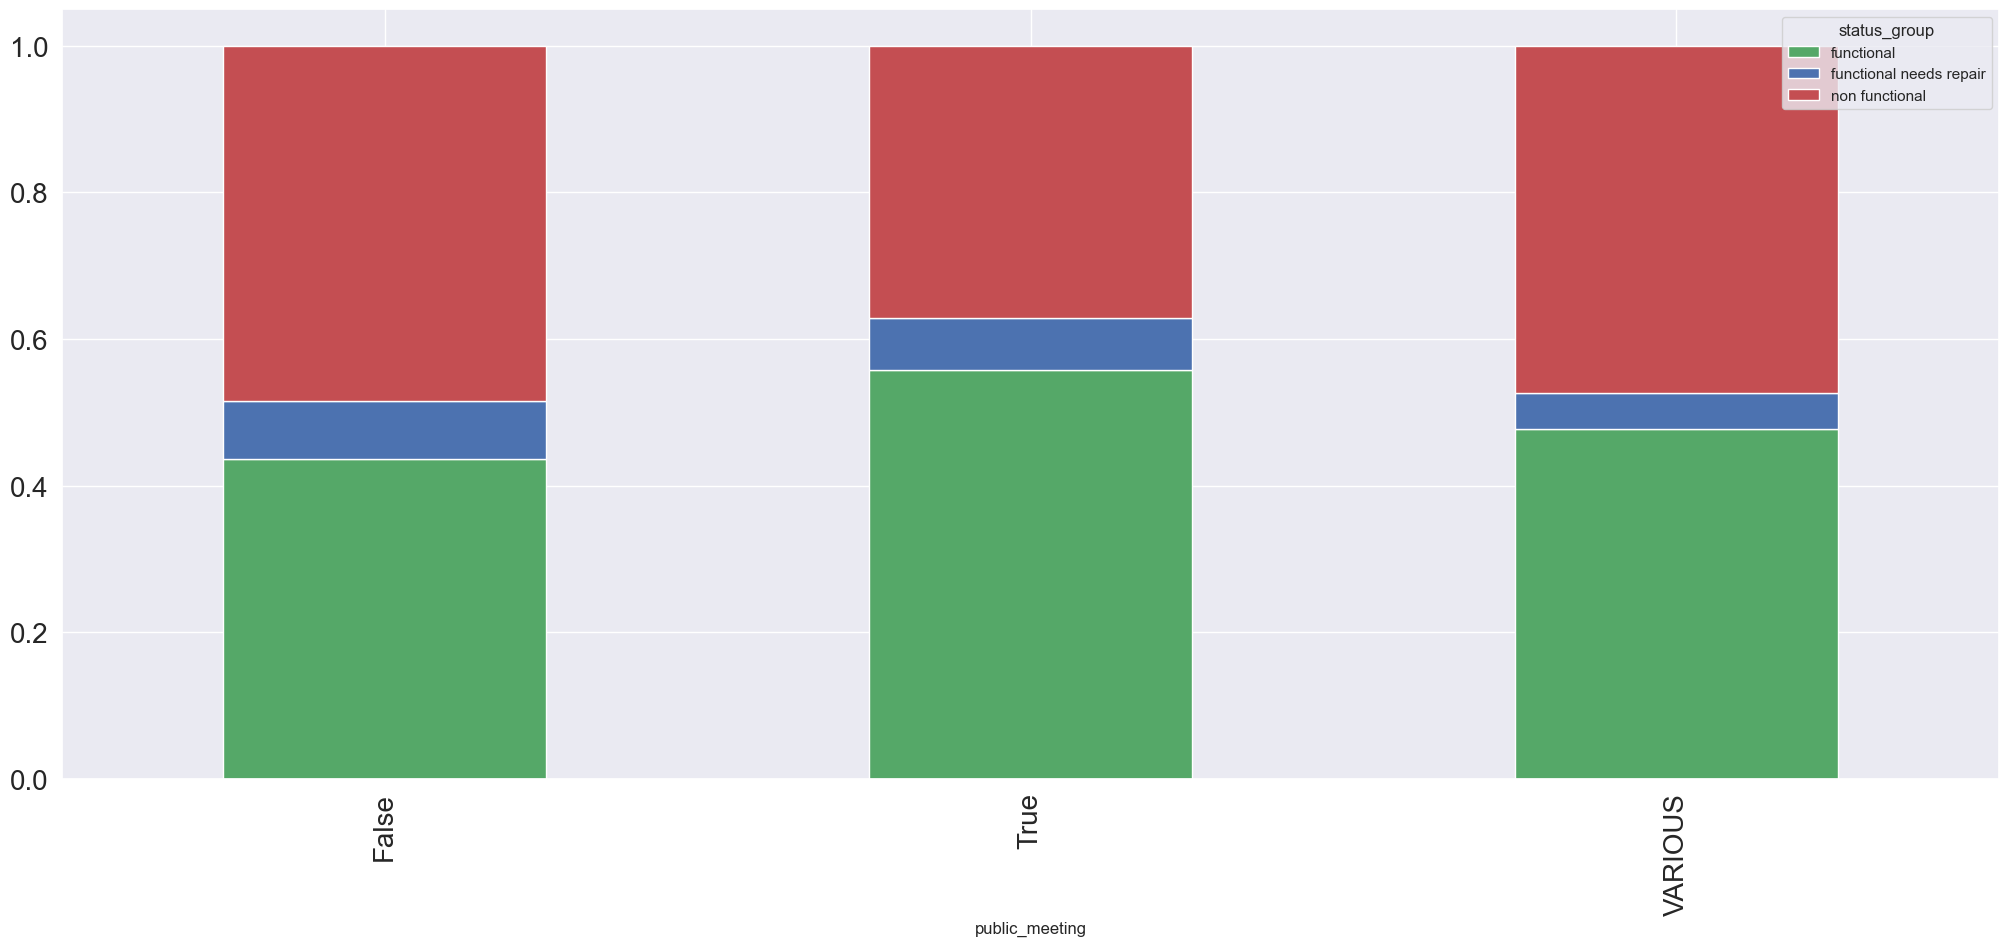

In [604]:
table=pd.crosstab(df.public_meeting, df.status_group)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(25,10), stacked=True,fontsize=20 , color=('g','b','r'))


plt.show()


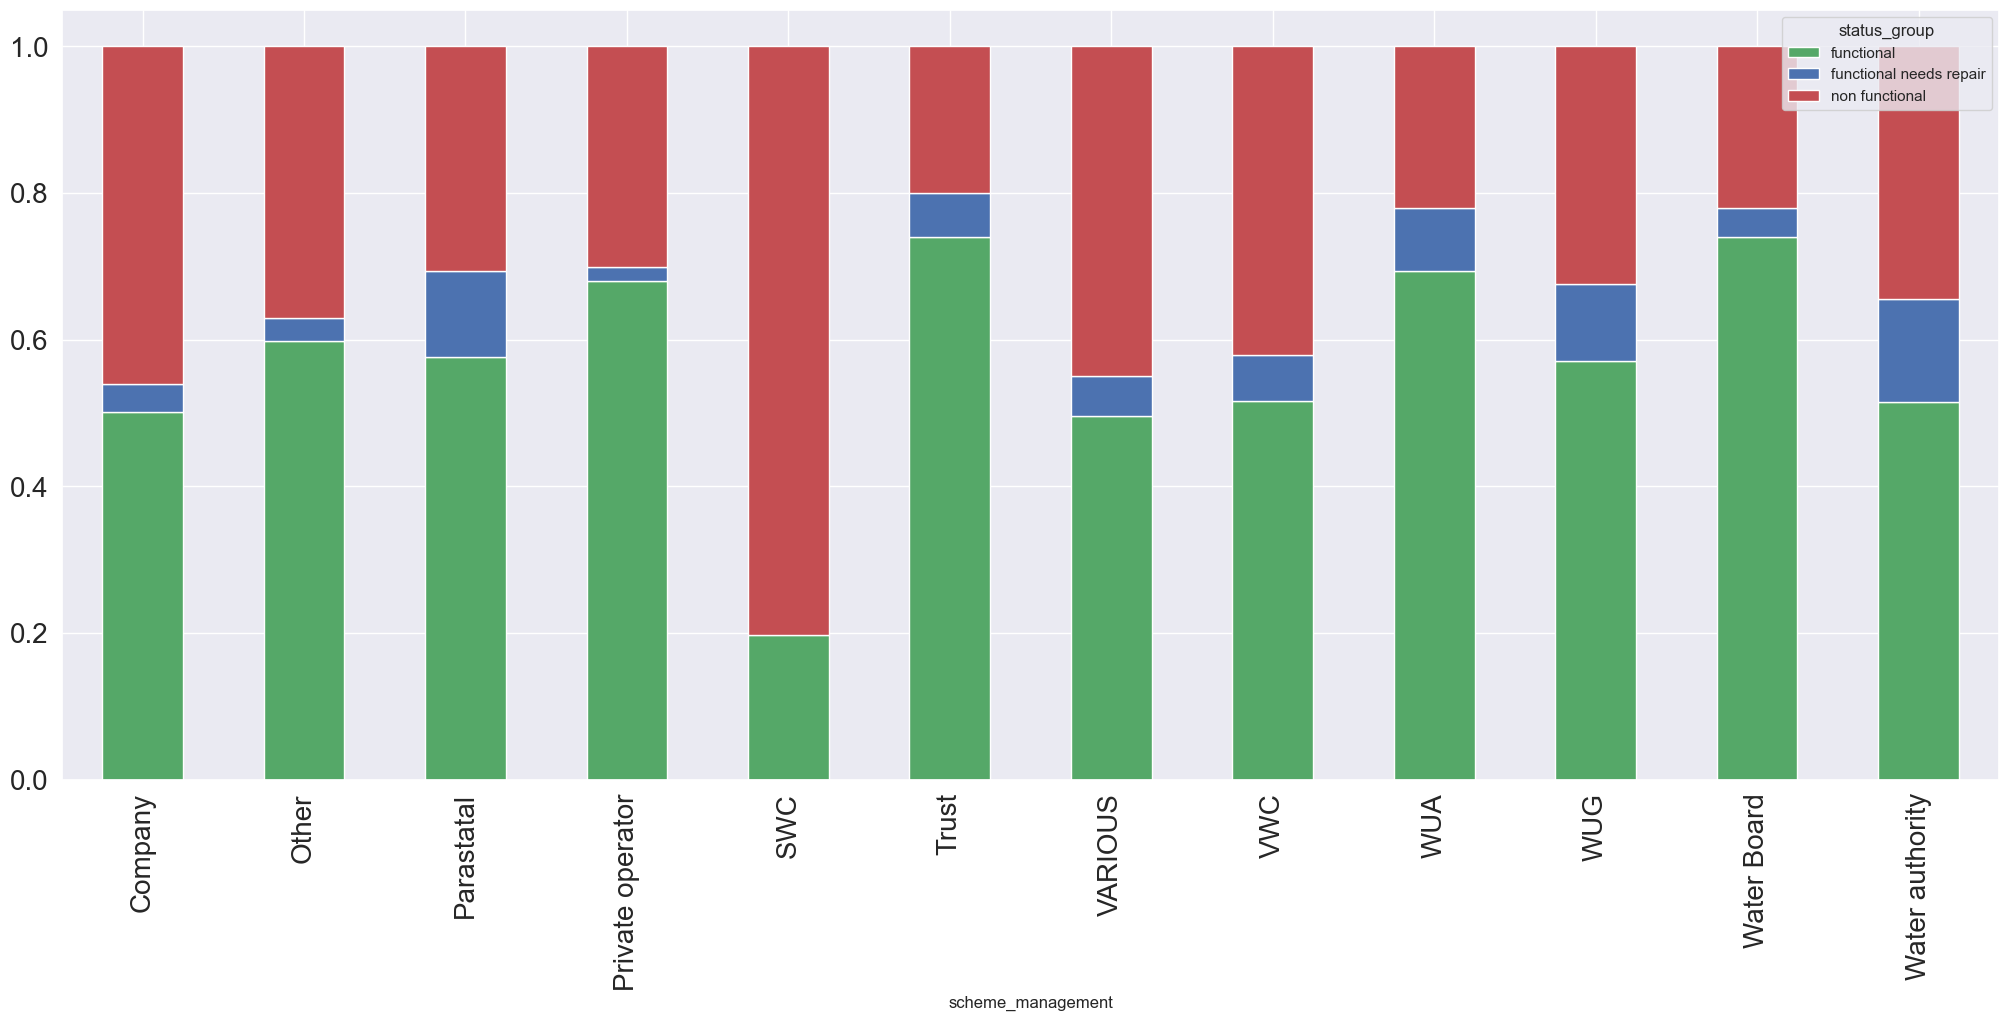

In [605]:
table=pd.crosstab(df.scheme_management, df.status_group)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(25,10), stacked=True,fontsize=20 , color=('g','b','r'))
plt.show()

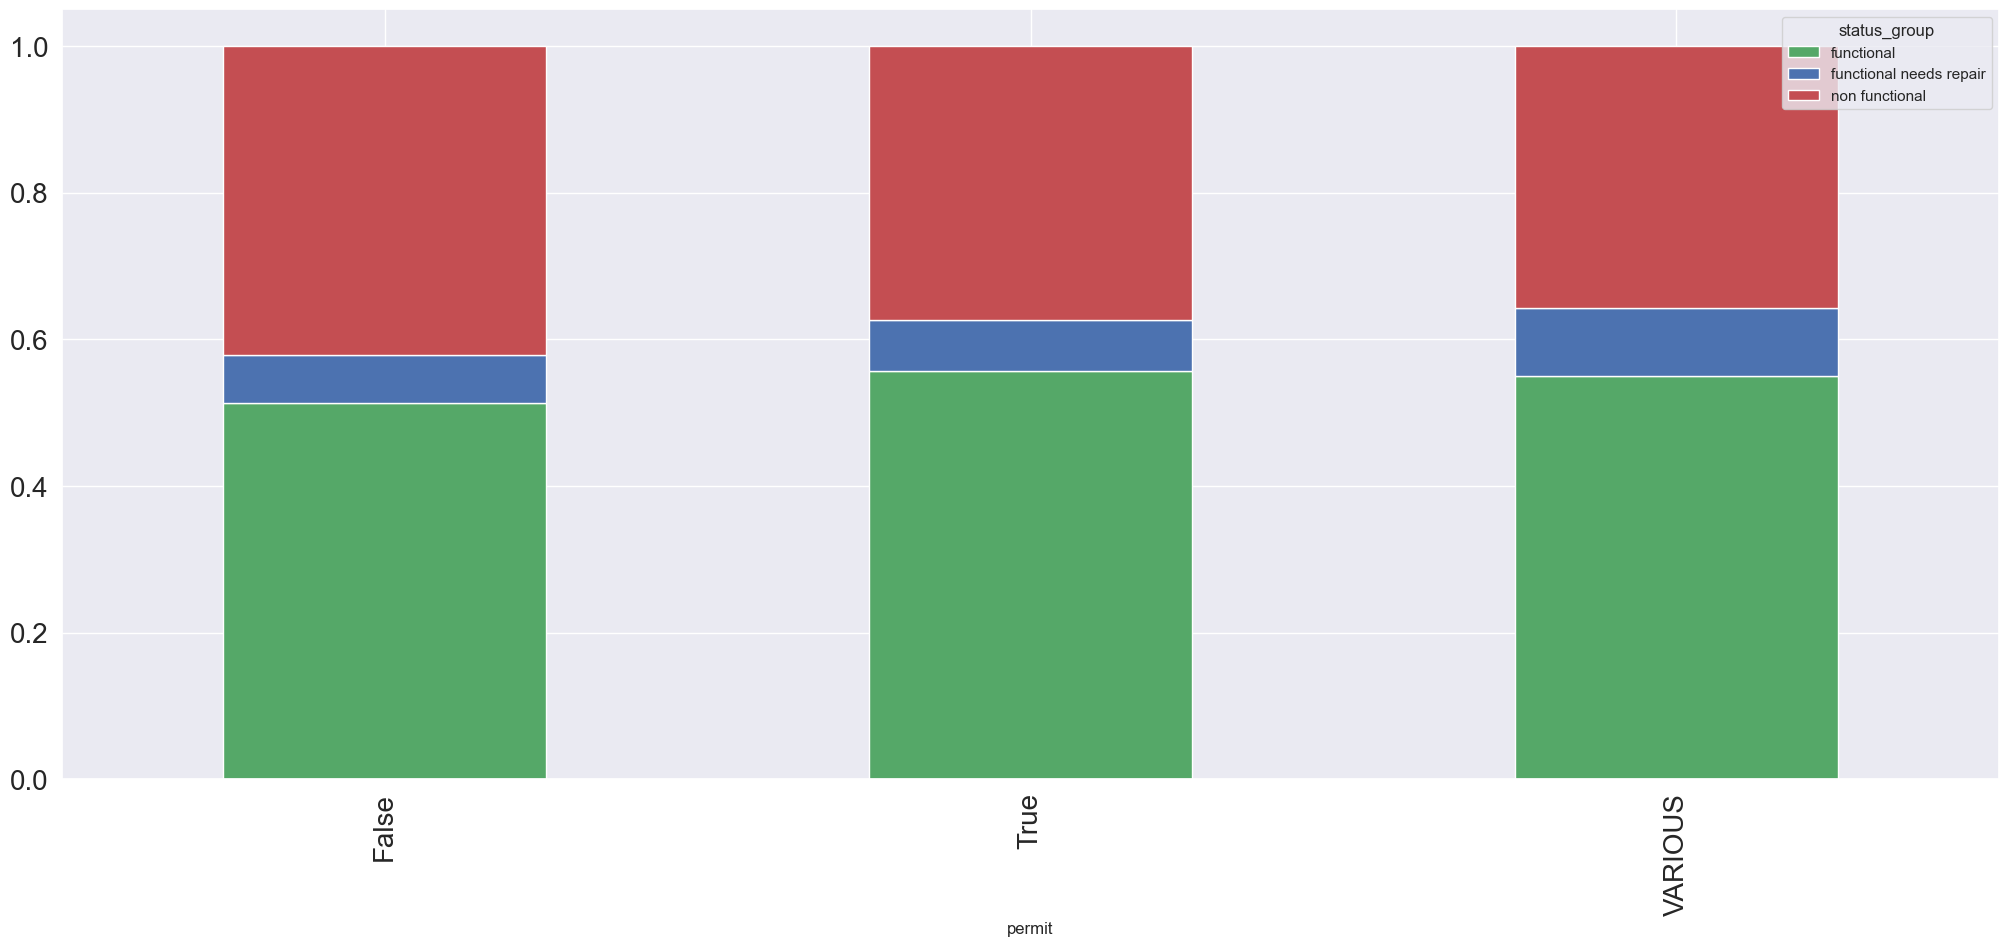

In [606]:
table=pd.crosstab(df.permit, df.status_group)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(25,10), stacked=True,fontsize=20 , color=('g','b','r'))


plt.show()

### Counts of missing and meaningless data

In [607]:
print('#permit VARIOUS COUNT   = {}'.format(len(df[df['permit'] == 'VARIOUS'])))

#permit VARIOUS COUNT   = 2309


In [608]:
print('#public_meeting VARIOUS COUNT   = {}'.format(len(df[df['public_meeting'] == 'VARIOUS'] )))

#public_meeting VARIOUS COUNT   = 2290


In [609]:
print('#scheme_management VARIOUS COUNT   = {}'.format(len(df[df['scheme_management'] == 'VARIOUS'])))

#scheme_management VARIOUS COUNT   = 2889


In [610]:
print('# 0 in construction_year   COUNT   = {}'.format(len(df[df['construction_year'] == 0])))

# 0 in construction_year   COUNT   = 14645


In [611]:
print('# 1 in population   COUNT   = {}'.format(len(df[df['population'] == 1])))

# 1 in population   COUNT   = 5253


In [612]:
print('# 0 in population   COUNT   = {}'.format(len(df[df['population'] == 0])))

# 0 in population   COUNT   = 15149


### Cleaning Data frame from meaningless 

* In this section first we will clean our dataframe from meaninless data. After than using the clean data frame we will handle  meaningless data on main data frame. This art is little bit complicated but i gave the main idea

In [613]:
########################################################################
# Eliminate the values where population is = 0 and population = 1 and created a new data frame
df_pop_nozerone = df[df['population'] >1]

In [614]:
#################################################
#The values where the population is 1 and 0.
df_pop_predict = df[df["population"]<2]

In [615]:
####################################################
#Created a new data frame without where the value of construction year is 0. 
df_nozero_const = df_pop_nozerone[df_pop_nozerone['construction_year'] > 1000]

In [616]:
####################################################
#construction year = 0
df_const_predict = df_pop_nozerone[df_pop_nozerone['construction_year'] < 1000]

In [617]:
#################################################
df_nozero_const['construction_year'].unique()

array([2009, 1985, 1974, 2003, 1989, 2005, 2006, 2011, 1996, 1995, 2000,
       1999, 2002, 1992, 1976, 1979, 1978, 2012, 2004, 2010, 1997, 1988,
       1990, 1980, 1981, 1984, 2007, 1994, 1987, 1972, 1970, 2008, 1973,
       1982, 1975, 2013, 1998, 1983, 1993, 1991, 2001, 1964, 1977, 1967,
       1971, 1968, 1986, 1965, 1961, 1963, 1969, 1960, 1966, 1962])

In [618]:
########################################################################################
df_scheme_manag_novarious = df_nozero_const[df_nozero_const['scheme_management'] != 'VARIOUS']

In [619]:
############################################################################################
df_scheme_manag_predict = df_nozero_const[df_nozero_const['scheme_management'] == 'VARIOUS']

In [620]:

list(df_scheme_manag_novarious['scheme_management'].unique())

['WUG',
 'Parastatal',
 'Water authority',
 'VWC',
 'WUA',
 'Water Board',
 'Private operator',
 'Trust',
 'Company',
 'Other',
 'SWC']

In [621]:
#########################################################
df_pub_meet_novarious = df_scheme_manag_novarious[df_scheme_manag_novarious['public_meeting'] != 'VARIOUS']

In [622]:
df_pub_meet_predict = df_scheme_manag_novarious[df_scheme_manag_novarious['public_meeting'] == 'VARIOUS']

In [623]:
list(df_pub_meet_novarious['public_meeting'].unique())

[True, False]

In [624]:
###############################################################
#To predict the data where permit value is 'VARIOUS' are taken.
df_permit_predict = df_pub_meet_novarious[df_pub_meet_novarious['permit'] == 'VARIOUS']


In [625]:

df_permit_novarious = df_pub_meet_novarious[df_pub_meet_novarious['permit'] != 'VARIOUS']

In [626]:

list(df_permit_novarious['permit'].unique())

[False, True]

In [627]:
#we have created a new df after cleaning
df_clean = df_permit_novarious


###### After clean the data we are looking to data's specs.

In [628]:
df_clean.describe()

,amount_tsh,gps_height,longitude,latitude,population,construction_year
count,19082.000000,19082.000000,19082.000000,19082.000000,19082.000000,19082.000000
mean,514.329211,1010.106069,35.797636,-6.113818,328.688974,1997.375590
std,3543.120687,608.821258,2.736253,2.595021,589.085132,12.380155
min,0.000000,-63.000000,29.607201,-11.566805,2.000000,1960.000000
25%,0.000000,399.250000,34.615750,-8.292602,85.000000,1988.000000
50%,6.000000,1150.000000,36.643701,-5.688846,200.000000,2001.000000
75%,250.000000,1481.000000,37.776053,-3.701062,350.000000,2008.000000
max,250000.000000,2628.000000,40.322625,-1.104943,15300.000000,2013.000000


In [629]:
#cols = ['status_group', 'waterpoint_type', 'source_class', 'source', 'quantity',  'water_quality', 'payment_type','management_group','extraction_type_class','construction_year','permit','scheme_management','public_meeting','population','basin','latitude','longitude','gps_height','amount_tsh']
#sns.pairplot(df_clean[cols], hue = 'status_group', diag_kind = 'kde', 
#plot_kws = {'alpha': 0.7, 's': 80, 'edgecolor': 'k'}, size = 4.5 )
#plt.show()

##### Pair plot is saying already not much. There are skewnesses and not correlated data. Outliers? Normal distribution?

In [630]:
list(df['permit'].unique())

[True, False, 'VARIOUS']

##### We've filled null/meaningless values with mode of clean data

In [631]:
#Fill VARIOUS (NULL) values with mode.
df['permit'] = df['permit'].replace('VARIOUS', df_clean['permit'].mode()[0])


In [632]:
df['permit'].unique()

array([ True, False])

In [633]:
df['public_meeting'] = df['public_meeting'].replace('VARIOUS', df_clean['public_meeting'].mode()[0])


In [634]:
df['public_meeting'].unique()

array([ True, False])

In [635]:
df['scheme_management'] = df['scheme_management'].replace('VARIOUS', df_clean['scheme_management'].mode()[0])


In [636]:
list(df['scheme_management'].unique())

['VWC',
 'WUG',
 'Company',
 'Parastatal',
 'Water authority',
 'Water Board',
 'WUA',
 'Private operator',
 'Trust',
 'Other',
 'SWC']

In [637]:
# Check the missing values again.
display(df.isnull().sum().sort_index()/len(df))

amount_tsh               0.0
basin                    0.0
construction_year        0.0
extraction_type          0.0
extraction_type_class    0.0
gps_height               0.0
latitude                 0.0
longitude                0.0
management_group         0.0
payment_type             0.0
permit                   0.0
population               0.0
public_meeting           0.0
quantity                 0.0
scheme_management        0.0
source                   0.0
source_class             0.0
status_group             0.0
water_quality            0.0
waterpoint_type          0.0
dtype: float64

##### We'll fill 0 values with mean of the clean data frame

<AxesSubplot: xlabel='population', ylabel='Density'>

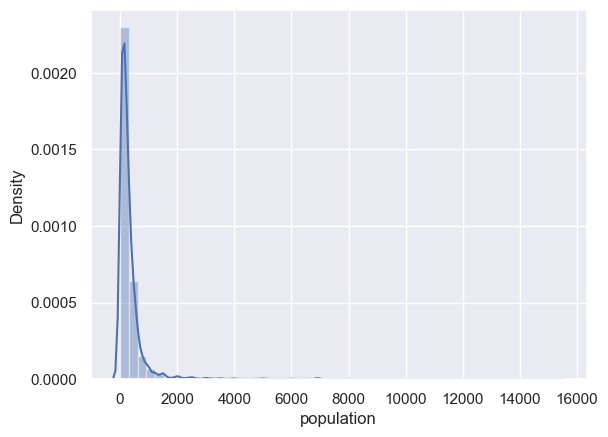

In [638]:
sns.distplot( df_clean["population"])

##### Seems the values 0 and 1 dominate the population.

In [639]:
#######################################################################
df['population'] = df['population'].replace(0, df_clean['population'].mean())


In [640]:
df['population'] = df['population'].replace(1, df_clean['population'].mean())

We had too many 0 and 1 s. We filled with mean() but data still has tail

<AxesSubplot: xlabel='population', ylabel='Density'>

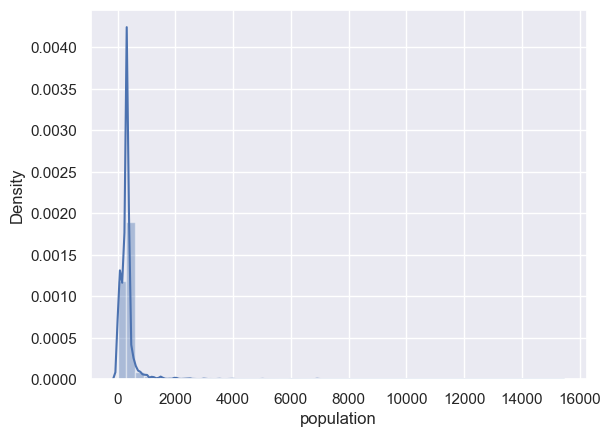

In [641]:
 
sns.distplot( df["population"])


<AxesSubplot: xlabel='construction_year', ylabel='Density'>

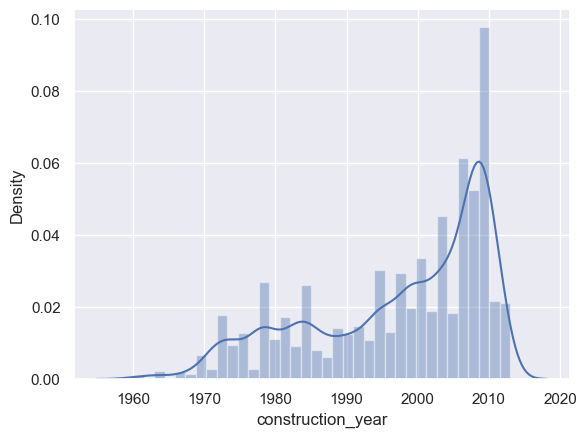

In [642]:
sns.distplot( df_clean["construction_year"])

In [643]:
############################################################################################
df['construction_year'] = df['construction_year'].replace(0, df_clean['construction_year'].median())


In [644]:
df['construction_year'].unique()

array([2002, 2001, 2009, 1985, 2006, 1974, 2003, 1989, 2005, 2011, 1983,
       2010, 1996, 1995, 2000, 1999, 1992, 1976, 1979, 1978, 2012, 2004,
       1997, 1988, 1990, 1980, 1981, 1977, 1984, 2007, 1994, 1987, 1972,
       1970, 1998, 1982, 2008, 1973, 1962, 1975, 2013, 1991, 1993, 1964,
       1967, 1969, 1971, 1960, 1968, 1986, 1965, 1961, 1963, 1966])

In [645]:
df.isnull().any()

amount_tsh               False
gps_height               False
longitude                False
latitude                 False
basin                    False
population               False
public_meeting           False
scheme_management        False
permit                   False
construction_year        False
extraction_type          False
extraction_type_class    False
management_group         False
payment_type             False
water_quality            False
quantity                 False
source                   False
source_class             False
waterpoint_type          False
status_group             False
dtype: bool

In [646]:
list(df.columns)


['amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'basin',
 'population',
 'public_meeting',
 'scheme_management',
 'permit',
 'construction_year',
 'extraction_type',
 'extraction_type_class',
 'management_group',
 'payment_type',
 'water_quality',
 'quantity',
 'source',
 'source_class',
 'waterpoint_type',
 'status_group']

In [647]:
#Selecting categoric columns
categorical = df.select_dtypes(exclude=[np.number])

In [648]:
#selecting numerical columns
numerical = df.select_dtypes(include=[np.number])

In [649]:
list(categorical)

['basin',
 'public_meeting',
 'scheme_management',
 'permit',
 'extraction_type',
 'extraction_type_class',
 'management_group',
 'payment_type',
 'water_quality',
 'quantity',
 'source',
 'source_class',
 'waterpoint_type',
 'status_group']

In [650]:
list(numerical)

['amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'population',
 'construction_year']

In [651]:
df.dtypes

amount_tsh               float64
gps_height                 int64
longitude                float64
latitude                 float64
basin                     object
population               float64
public_meeting              bool
scheme_management         object
permit                      bool
construction_year          int64
extraction_type           object
extraction_type_class     object
management_group          object
payment_type              object
water_quality             object
quantity                  object
source                    object
source_class              object
waterpoint_type           object
status_group              object
dtype: object

In [652]:
#changing bools to str for uniform names
df['public_meeting'] = df['public_meeting'].astype(str)

In [653]:
df['permit'] = df['permit'].astype(str)

Uniforming data names

In [654]:
for c in categorical:
    df[c] = df[c].str.lower().str.replace(' ','_')

In [655]:
for c in categorical:
    df[c] = df[c].str.lower().str.replace('_-_','_')


In [656]:
for c in categorical:
    df[c] = df[c].str.lower().str.replace('_/_','_')

In [657]:
list(df['status_group'].unique())

['non_functional', 'functional', 'functional_needs_repair']

In [658]:
df['status_group'] = df['status_group'].replace('non_functional',0)
df['status_group'] = df['status_group'].replace('functional',1)
df['status_group'] = df['status_group'].replace('functional_needs_repair',2)

df['status_group'].unique()

array([0, 1, 2])

# Feature importance: Mutual information

In [660]:
del categorical['status_group']

In [661]:
list(categorical.columns)

['basin',
 'public_meeting',
 'scheme_management',
 'permit',
 'extraction_type',
 'extraction_type_class',
 'management_group',
 'payment_type',
 'water_quality',
 'quantity',
 'source',
 'source_class',
 'waterpoint_type']

In [662]:
mutual_info_score(df.status_group, df.basin)

0.016394945091484377

In [663]:
mutual_info_score(df.status_group, df.public_meeting)

0.0022117830124347704

In [664]:
mutual_info_score(df.status_group, df.scheme_management)

0.014791815708147249

In [665]:
mutual_info_score(df.status_group, df.permit)

0.0009956184522387501

In [674]:

mutual_info_score(df.status_group, df.extraction_type)

0.06095482972793548

In [667]:
mutual_info_score(df.status_group, df.extraction_type_class)

0.05782996377812866

In [668]:
mutual_info_score(df.status_group, df.management_group)

0.0022017105721671097

In [669]:
mutual_info_score(df.status_group, df.payment_type)

0.03395408504013362

In [670]:
mutual_info_score(df.status_group, df.water_quality)

0.016977505757421713

In [671]:
#Seems Most important feature
mutual_info_score(df.status_group, df.quantity)

0.10495342940451559

In [672]:
mutual_info_score(df.status_group, df.source)

0.023489280248086167

In [673]:
mutual_info_score(df.status_group, df.source_class)

0.005743857431485073

# Feature importance: Correlation

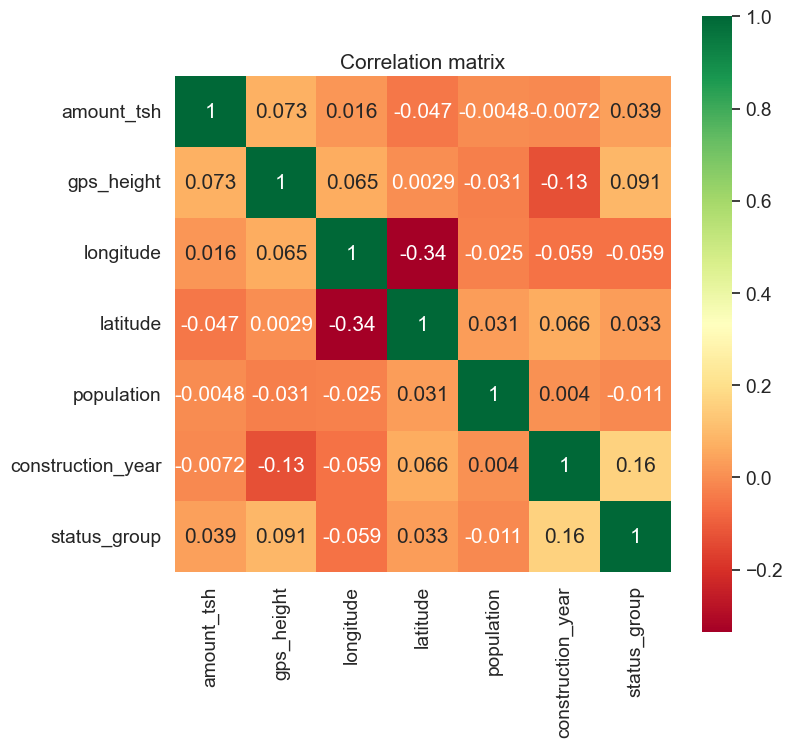

In [676]:
sns.set(font_scale = 1.25)
correlation_matrix = df.corr()
plt.figure(figsize=(8,8))
ax = sns.heatmap(correlation_matrix, vmax=1, square=True,annot=True,cmap='RdYlGn')
plt.title('Correlation matrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

# Training the models

In [137]:
#taking traget values
y = df['status_group'].values
del df[ 'status_group']


In [138]:
categorical = df.select_dtypes(exclude=[np.number])
numerical = df.select_dtypes(include=[np.number])

##### One Hot Encoding

In [139]:
from sklearn.feature_extraction import DictVectorizer

In [140]:
train_dicts = df.to_dict(orient='records')

dv = DictVectorizer(sparse = False)

X = dv.fit_transform(train_dicts)

In [141]:
seed = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)

In [142]:
print('Train data     :', X_train.shape)
print('Test data      :', X_test.shape)


Train data     : (34874, 97)
Test data      : (8719, 97)


In [143]:
type_of_target(y)

'multiclass'

###  We've  scaled the data to avoid feature dominancy and outliers.

In [144]:
scaler = preprocessing.StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)


# Logistic Regression

In [1672]:
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
C_grid = {'C': C_values}

# Set the amount of folds for the cross-validation
kfolds = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

# Do a model fit over a grid of C hyperparameters
Clf = LogisticRegression(penalty='l2', random_state=seed, n_jobs= -1,)
grid_logReg = GridSearchCV(Clf, C_grid, cv=kfolds, refit=True,)
grid_logReg.fit(X_train,y_train)
print('Best parameters:\n', grid_logReg.best_params_,'\n')
print('Average CV accuracy:', np.mean(grid_logReg.cv_results_['mean_test_score']))

/Users/kadkoy/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kadkoy/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Best parameters:
 {'C': 0.1} 

Average CV accuracy: 0.7300402445716375


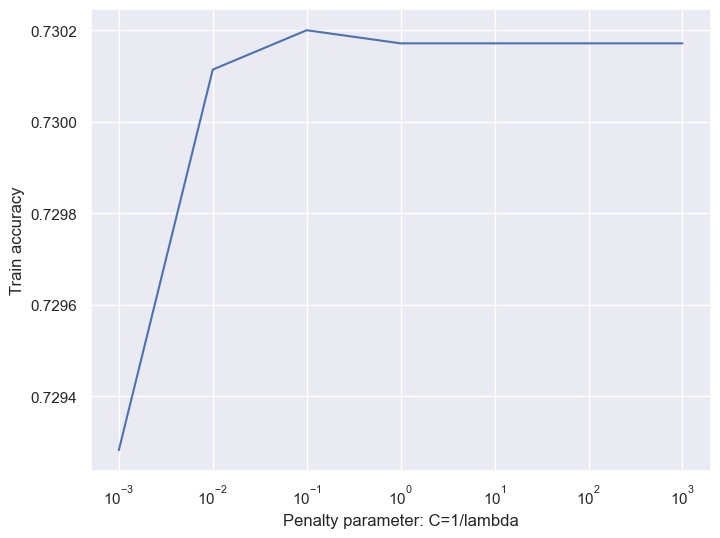

In [1673]:
# Visualize maximum accuracy
plt.figure(figsize=(8,6))
plt.semilogx(C_values, grid_logReg.cv_results_['mean_test_score'])
plt.xlabel('Penalty parameter: C=1/lambda')
plt.ylabel('Train accuracy')
plt.show()

In [1674]:
#Using best parameter C=0.1
Clf = LogisticRegression(penalty='l2', C=0.1, random_state=seed)
Clf.fit(X_train, y_train)
predictions = Clf.predict(X_test)
print( 'Training accuracy       :',(accuracy_score(y_train, Clf.predict(X_train))) )
print( 'Classification accuracy :',(accuracy_score(y_test, predictions)) ,"\n")

Training accuracy       : 0.7323220737512187
Classification accuracy : 0.7310471384333066 



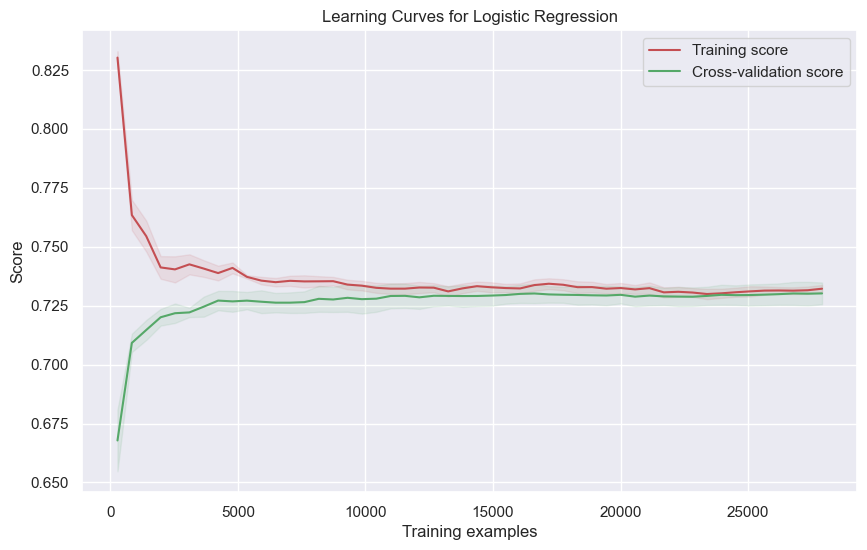

In [1675]:
import matplotlib.cbook
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

from sklearn.model_selection import learning_curve
# Ref: http://scikit-learn.org/stable/modules/learning_curve.html
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(0.01, 1.0, 50)):
    plt.figure(figsize=(10,6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, '-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, '-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.grid("on")
    return plt

title = 'Learning Curves for Logistic Regression'
estimator = LogisticRegression(penalty='l2', C=0.1, random_state=seed)
kfold = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
plot_learning_curve(estimator, title, X_train, y_train, cv=kfold)
plt.show()

### Confusion Matrix 

Let's see the performance of the model in detecting the **True Positives** and **True Negatives** along with its mistakes: **False Positives** and **False Negatives**.

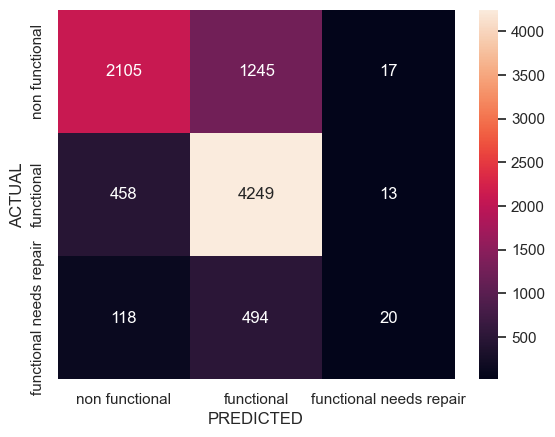

In [1676]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = ['non functional', 'functional', 'functional needs repair'] , 
                yticklabels = ['non functional','functional', 'functional needs repair'] )
    plt.ylabel('ACTUAL')
    plt.xlabel('PREDICTED')
    plt.show()
draw_cm( y_test, predictions )

Comments on confusion matrix

*  **2105** pumps are truly predicted as **non_functional**
*    **1245**  pumps are predicted **functional** but actually they are **non_functional**
*    **17**   pumps are predicted **functionla_needs_repair** but they are **non_functional**

as the same for other targets confusion matrix can be interpreted

# DECISION TREE

## Common hyperparameters to tune in a DT
<font color="green">**criterion**</font> : Function to measure the quality (purity) of a split. Choices are '**gini**' (deafult) for the Gini impurity and '**entropy**' for the information gain. 

<font color="green">**max_features**</font> : Represents the number of features to consider when looking for the best split (default = None = n_features). Choices are **sqrt**(n_features), **Auto**=sqrt(n_features), **log2**(n_features), **None**=n_features.

<font color="green">**max_depth**</font> : The maximum depth of the tree. This indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data. If None (default), then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples 

<font color="green">**min_samples_split**</font> : Minimum number of samples required to split an internal node (default=2). A split will not happen if there are less recordes than min_samples_split. When we increase this parameter, the tree becomes more constrained as it has to consider more samples at each node.

<font color="green">**min_samples_leaf**</font> : The minimum number of samples required to be at a leaf node (default=1). This parameter is similar to min_samples_splits, however, this describes the minimum number of samples at the leafs, the base of the tree.

In [1677]:
param_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 3, 4],
              "max_depth": [ 16,18,20],
              "min_samples_leaf": [1, 2, 3]
              }

kfolds = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
#t_start = time.clock()
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=seed), 
                                                 param_grid=param_grid, cv=kfolds)
grid_search.fit(X_train, y_train)
#t_end = time.clock()

print('Classifier used:\n',grid_search.best_estimator_,'\n')
#print('Time elapsed :', t_end-t_start, 'sec')
print('Best CV score in all folds:\n', grid_search.best_score_, '\n')
print('Average CV score:\n', np.mean(grid_search.cv_results_['mean_test_score']))

Classifier used:
 DecisionTreeClassifier(max_depth=16, min_samples_split=4, random_state=0) 

Best CV score in all folds:
 0.757555561722856 

Average CV score:
 0.751800413978133


In [1678]:
dt = DecisionTreeClassifier(criterion='gini', max_depth = 13, min_samples_split = 3, 
                            min_samples_leaf = 2, random_state=seed)
dt.fit(X_train, y_train)
trn_acc = accuracy_score(y_train, dt.predict(X_train))
tst_acc = accuracy_score(y_test, dt.predict(X_test))

print('CART training accuracy:', trn_acc)
print('CART test accuracy    :', tst_acc)

CART training accuracy: 0.800252336984573
CART test accuracy    : 0.7581144626677371


# RANDOM FOREST
### (Choosed because highest accuracy, data has so many categoric features and RF has low computation cost , easy the tune)

In [281]:
param_grid = {"criterion"        : ['entropy','gini'],
              "min_samples_split": [ 5,9],
              "max_features"     : [ 8,11],
              "max_depth"        : [ 17, 20],
              "min_samples_leaf" : [2,3],
              "n_estimators"     : [60,100]
              }

kfolds = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
#t_start = time.clock()
grid_search = GridSearchCV(estimator = RF(random_state = seed), param_grid = param_grid, 
                           cv = kfolds, n_jobs = -1)
grid_search.fit(X_train, y_train)
#t_end = time.clock()
#print('Time elapsed :', t_end-t_start, 'sec\n')
print('Best parameters:\n', grid_search.best_params_,'\n')
print('Average CV accuracy:', np.mean(grid_search.cv_results_['mean_test_score']))

Best parameters:
 {'criterion': 'entropy', 'max_depth': 20, 'max_features': 11, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100} 

Average CV accuracy: 0.7851379637938354


In [1870]:
RFmodel = RF(criterion = 'gini', n_estimators = 100, max_depth = 17, min_samples_leaf = 2, 
         min_samples_split = 9, max_features = 11, random_state = seed)
RFmodel.fit(X_train, y_train)
predictions = RFmodel.predict(X_test)
print( 'RF Training accuracy       :',(accuracy_score(y_train, RFmodel.predict(X_train))) )
print( 'RF Classification accuracy :',(accuracy_score(y_test, predictions)) ,"\n")

RF Training accuracy       : 0.8297872340425532
RF Classification accuracy : 0.7880490881981879 



In [1892]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.70      0.77      3367
           1       0.76      0.93      0.84      4720
           2       0.71      0.17      0.28       632

    accuracy                           0.79      8719
   macro avg       0.77      0.60      0.63      8719
weighted avg       0.79      0.79      0.77      8719



In [1680]:
predictions

array([1, 1, 1, ..., 1, 1, 1])

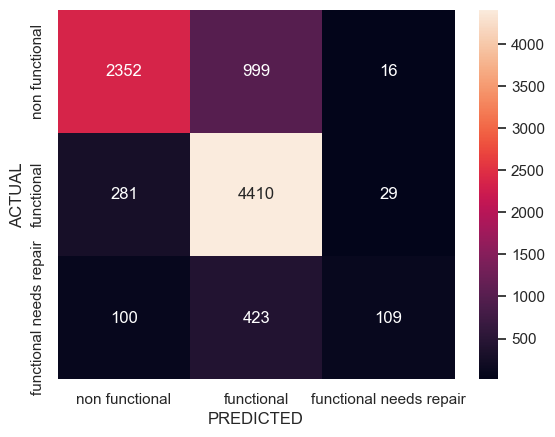

In [1681]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted )
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = ['non functional', 'functional', 'functional needs repair'] , 
                yticklabels = ['non functional', 'functional', 'functional needs repair'] )
    plt.ylabel('ACTUAL')
    plt.xlabel('PREDICTED')
    plt.show()
draw_cm( y_test, predictions )



Comments on confusion matrix

*  **2352** pumps are truly predicted as **non_functional**
*    **999**  pumps are predicted **functional** but actually they are **non_functional**
*    **16**   pumps are predicted **functionla_needs_repair** but they are **non_functional**

as the same for other targets confusion matrix can be interpreted

# Feature Importance with Random Forrest

In [1682]:

features = list(df.columns)
imp_dict = {}

for name, importance in zip(features, RFmodel.feature_importances_):
    #print(name, "=", importance)
    imp_dict.update({name: importance}) 



In [1683]:
# Python3 code to demonstrate working of
# Sort a Dictionary
# Sort by Keys


# using items() to get all items
# lambda function is passed in key to perform sort by key
res = {key: val for key, val in sorted(imp_dict.items(), key = lambda ele: ele[0])}

# printing result
#print("Result dictionary sorted by keys : " + str(res))

# using items() to get all items
# lambda function is passed in key to perform sort by key
# adding "reversed = True" for reversed order
res = {key: val for key, val in sorted(imp_dict.items(), key = lambda ele: ele[0], reverse = True)}

# printing result
#print("Result dictionary sorted by keys ( in reversed order ) : " + str(res))


create and plot a data frame for **feature importance**

In [1684]:

y_axs = list(res.keys())
x_axs = list(res.values())

In [1685]:
f_imp = {}

In [1686]:
f_imp.update({'features':y_axs})

In [1687]:
f_imp.update({'importance':x_axs})

In [1688]:
df_fimportance = pd.DataFrame(f_imp)

In [1689]:
df_fimportance = df_fimportance.sort_values(by='importance', ascending=True).reset_index(drop=True)

In [1891]:
df_fimportance.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
features,payment_type,management_group,source,extraction_type_class,quantity,source_class,waterpoint_type,scheme_management,construction_year,population,public_meeting,longitude,permit,latitude,gps_height,basin,water_quality,amount_tsh,extraction_type
importance,0.000051,0.000128,0.000466,0.001154,0.001323,0.002439,0.003572,0.003831,0.004106,0.004665,0.005083,0.005408,0.005427,0.006179,0.00619,0.006361,0.009288,0.033774,0.064931


Text(0, 0.5, 'features')

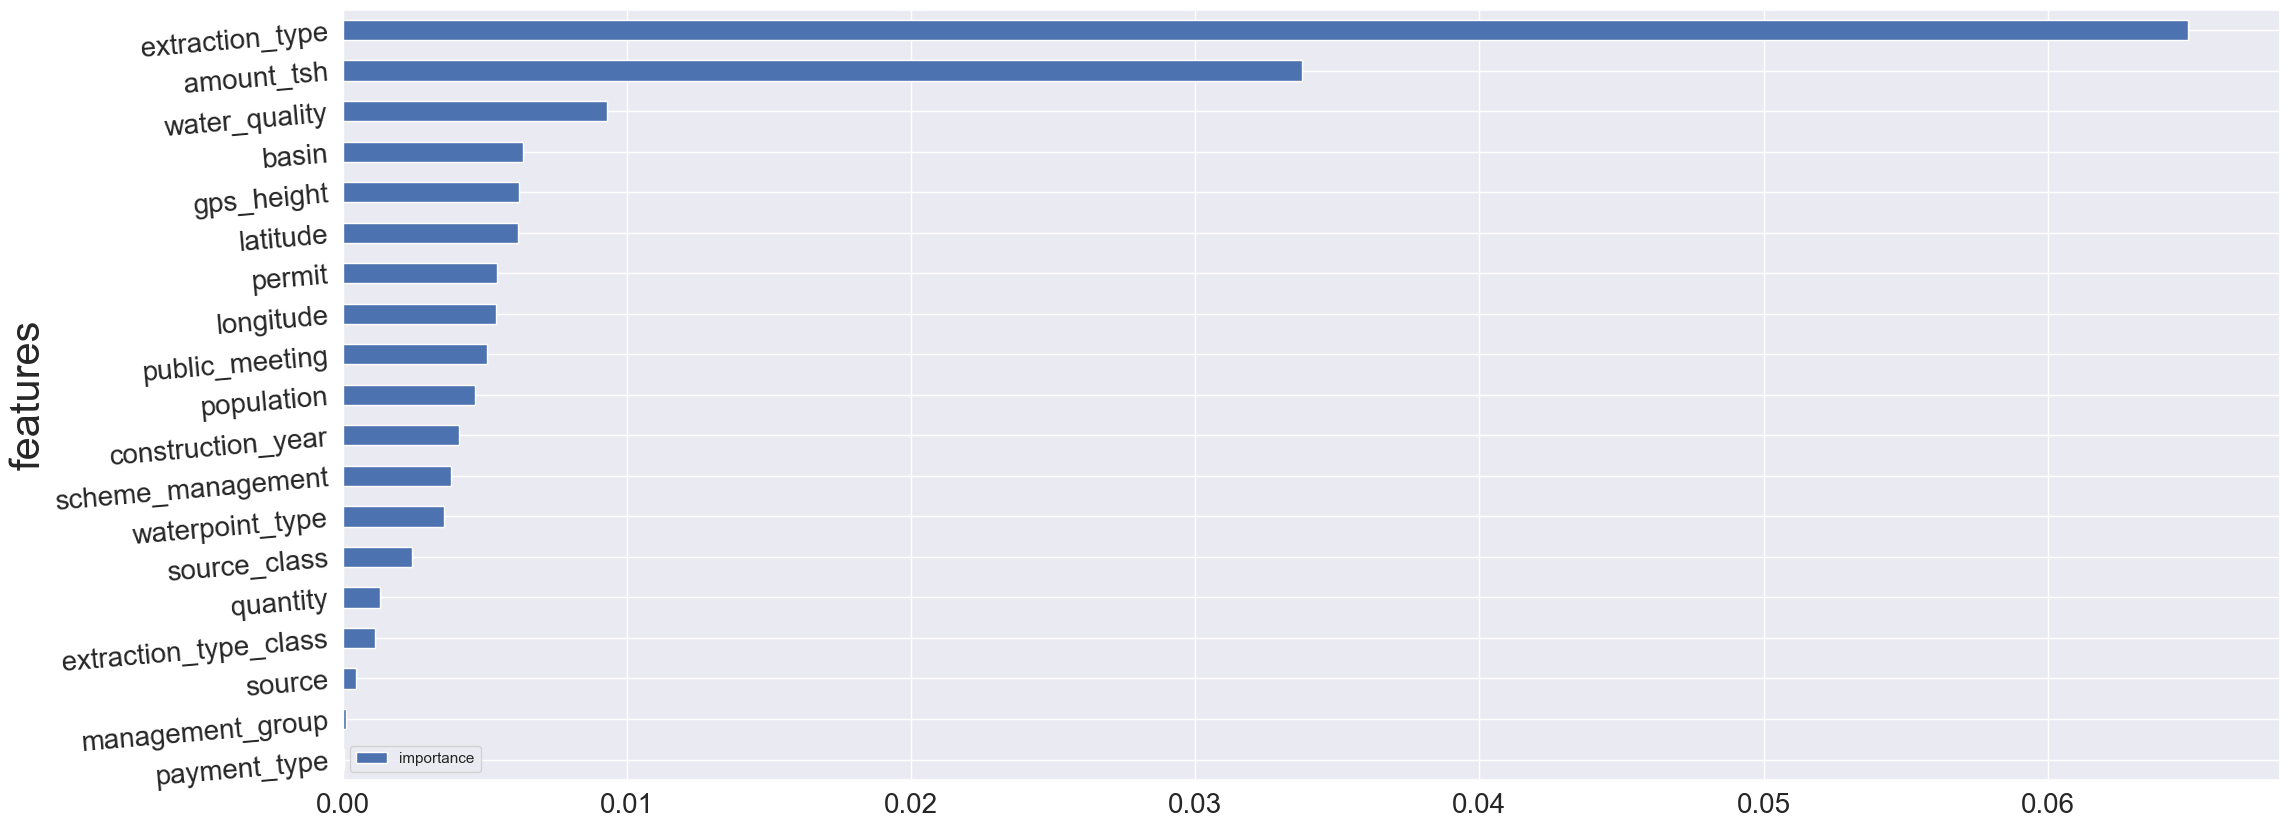

In [1732]:
df_fimportance.plot(x="features", y="importance", kind="barh" ,rot=5, fontsize=20, figsize=(25,10)).set_ylabel('features',fontsize=30)


# XGBOOST 

In [1692]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer #Categoric veriler olduğu için dönştürüyoruz.
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [1693]:
import xgboost as xgb
#from xgboost import XGBClassifier

In [1694]:
features = dv.get_feature_names()

In [1695]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features,enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=features,enable_categorical=True)

In [1696]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
       
    #'objective': 'binary:logistic', binary olursa bunu seçiyoruz
    'objective': 'multi:softmax', # Multi class olursa bu ikisi  
    "num_class": 3, #predict edilecek class sayısı
    
    'eval_metric': 'auc',
    
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

In [1697]:
model = xgb.train(xgb_params, dtest, num_boost_round= 75)

In [1698]:
pred = model.predict(dtest)

In [1699]:
pred

array([1., 1., 2., ..., 1., 0., 1.], dtype=float32)

In [1715]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3367
           1       0.98      0.99      0.98      4720
           2       0.98      0.94      0.96       632

    accuracy                           0.98      8719
   macro avg       0.98      0.97      0.98      8719
weighted avg       0.98      0.98      0.98      8719



In [1701]:
cm = confusion_matrix(y_test,pred)
cm

array([[2778,  580,    9],
       [ 135, 4573,   12],
       [  67,  240,  325]])

In [1702]:
print( 'Training accuracy       :',(accuracy_score(y_train, model.predict(dtrain))) )
print( 'Classification accuracy :',(accuracy_score(y_test, pred)) ,"\n")

Training accuracy       : 0.7606813098583471
Classification accuracy : 0.8803761899300379 



In [1703]:
#XGBOOST with different params

In [1704]:
xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
       
    #'objective': 'binary:logistic', binary olursa bunu seçiyoruz
    'objective': 'multi:softmax', # Multi class olursa bu ikisi  
    "num_class": 3, #predict edilecek class sayısı
    
    'eval_metric': 'auc',
    
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

In [1705]:
model = xgb.train(xgb_params, dtest, num_boost_round= 75)

In [1706]:
pred = model.predict(dtest)

In [1707]:
print( 'Training accuracy       :',(accuracy_score(y_train, model.predict(dtrain))) )
print( 'Classification accuracy :',(accuracy_score(y_test, pred)) ,"\n")

Training accuracy       : 0.7301141251362047
Classification accuracy : 0.7475627938983829 



In [1708]:
xgb_params = {
    'eta': 1, 
    'max_depth': 6,
       
    #'objective': 'binary:logistic', binary olursa bunu seçiyoruz
    'objective': 'multi:softmax', # Multi class olursa bu ikisi  
    "num_class": 3, #predict edilecek class sayısı
    
    'eval_metric': 'auc',
    
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

In [1709]:
model = xgb.train(xgb_params, dtest, num_boost_round= 75)

In [1710]:
pred = model.predict(dtest)

In [1711]:
print( 'Training accuracy       :',(accuracy_score(y_train, model.predict(dtrain))) )
print( 'Classification accuracy :',(accuracy_score(y_test, pred)) ,"\n")

Training accuracy       : 0.7507598784194529
Classification accuracy : 0.9818786558091525 



In [1396]:
xgb_params = {
    'eta': 1, 
    'max_depth': 9,
       
    #'objective': 'binary:logistic', binary olursa bunu seçiyoruz
    'objective': 'multi:softmax', # Multi class olursa bu ikisi  
    "num_class": 3, #predict edilecek class sayısı
    
    'eval_metric': 'auc',
    
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

In [1397]:
model = xgb.train(xgb_params, dtest, num_boost_round= 75)

In [1398]:
pred = model.predict(dtest)

In [1713]:
print( 'Training accuracy       :',(accuracy_score(y_train, model.predict(dtrain))) )
print( 'Classification accuracy :',(accuracy_score(y_test, pred)) ,"\n")

Training accuracy       : 0.7507598784194529
Classification accuracy : 0.9818786558091525 



# Saving Model

In [323]:
import pickle

In [324]:
output_file = f'RFmodel.bin'

In [325]:
output_file

'RFmodel.bin'

In [502]:
f_out = open(output_file, 'wb') 
pickle.dump((RFmodel), f_out)
f_out.close()

In [326]:
with open(output_file, 'wb') as f_out: 
    pickle.dump((RFmodel), f_out)

# Load the model

In [1]:
import pickle

In [2]:
model_file = f'RFmodel.bin'

In [3]:
with open(model_file, 'rb') as f_in: 
    dv, model = pickle.load(f_in)

/Users/kadkoy/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DictVectorizer from version 1.1.1 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/kadkoy/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.1.1 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/kadkoy/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.1.1 w

In [5]:
dv, model

(DictVectorizer(sparse=False),
 RandomForestClassifier(max_depth=17, max_features=11, min_samples_leaf=2,
                        min_samples_split=9, random_state=0))

In [31]:
pump = {'amount_tsh': 500.0,
  'gps_height': 1743,
  'longitude': 38.21381371,
  'latitude': -4.5568768,
  'basin': 'pangani',
  'population': 300,
  'public_meeting': 'true',
  'scheme_management': 'vwc',
  'permit': 'true',
  'construction_year': 2012,
  'extraction_type': 'gravity',
  'extraction_type_class': 'gravity',
  'management_group': 'user-group',
  'payment_type': 'monthly',
  'water_quality': 'soft',
  'quantity': 'enough',
  'source': 'spring',
  'source_class': 'groundwater',
  'waterpoint_type': 'communal_standpipe'}

In [32]:
X_pump = dv.transform([pump])

In [33]:
pump_predictions = model.predict(X_pump)

In [34]:
model.predict_proba(X_pump)

array([[0.20468964, 0.65408206, 0.14122829]])